# 0. 환경설정

In [ ]:
# 패키지 설치
!pip install koreanize-matplotlib
!pip install prefixspan
!pip install networkit
!pip install imbalanced-learn
!pip install xgboost
!pip install statsmodels

# 기본 패키지 및 라이브러리
import numpy as np
import pandas as pd
from collections import Counter, defaultdict
from itertools import combinations
import ast
from ast import literal_eval

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 그래프 분석
import networkx as nx
import networkit as nk
from networkit.centrality import LocalClusteringCoefficient
from networkit.community import PLM, Modularity

# 통계 분석
from scipy.stats import (
    kruskal, spearmanr, pearsonr, shapiro, ttest_ind, mannwhitneyu, chi2_contingency
)
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 시퀀스 마이닝
from prefixspan import PrefixSpan

# 머신러닝
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [ ]:
# 데이터 불러오기

# VOTE 데이터 (0723 전처리 파일 기준)
dpath1 = '/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/고급 프로젝트_250709~250813/accounts_blockrecord_0723.csv'
accounts_blockrecord = pd.read_csv(dpath1, index_col=0)

dpath2 = '/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/고급 프로젝트_250709~250813/accounts_friendreequest_0723.csv'
accounts_friendrequest = pd.read_csv(dpath2, index_col=0)

dpath3 = '/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/고급 프로젝트_250709~250813/accounts_group.csv'
accounts_group = pd.read_csv(dpath3, index_col=0)

dpath4 = '/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/고급 프로젝트_250709~250813/accounts_paymenthistory_0723.csv'
accounts_paymenthistory = pd.read_csv(dpath4, index_col=0)

dpath5 = '/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/고급 프로젝트_250709~250813/accounts_school.csv'
accounts_school = pd.read_csv(dpath5, index_col=0)

dpath6 = '/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/고급 프로젝트_250709~250813/accounts_timelinereport_0723.csv'
accounts_timelinereport = pd.read_csv(dpath6, index_col=0)

dpath7 = '/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/고급 프로젝트_250709~250813/accounts_user_0723.csv'
accounts_user = pd.read_csv(dpath7, index_col=0)

dpath8 = '/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/고급 프로젝트_250709~250813/accounts_userquestionrecord_0723.csv'
accounts_userquestionrecord = pd.read_csv(dpath8, index_col=0)

dpath9 = '/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/고급 프로젝트_250709~250813/polls_questionreport_0723.csv'
polls_questionreport = pd.read_csv(dpath9, index_col=0)

dpath10 = '/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/고급 프로젝트_250709~250813/polls_questionset_0723.csv'
polls_questionset = pd.read_csv(dpath10, index_col=0)

dpath11 = '/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/고급 프로젝트_250709~250813/polls_usercandidate_0723.csv'
polls_usercandidate = pd.read_csv(dpath11, index_col=0)

# hackle 데이터 (0723 전처리 파일 기준)
dpath12 = '/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/고급 프로젝트_250709~250813/hackle_events_0723.csv'
hackle_events = pd.read_csv(dpath12, index_col=0)

# 생성한 데이터
dpath13 = '/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/고급 프로젝트_250709~250813/new_attendance_df_KST_20250731.csv'
new_attendance = pd.read_csv(dpath13, index_col=0)

dpath14 = '/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/고급 프로젝트_250709~250813/pay_predict_model_v1.csv'
pay_predict_model_v1 = pd.read_csv(dpath14, index_col=0)

dpath15 = '/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/고급 프로젝트_250709~250813/school_predict_model_v2.csv'
school_predict_model_v2 = pd.read_csv(dpath15, index_col=0)

dpath16 = '/content/drive/MyDrive/코드잇_데이터분석_6기/프로젝트/고급 프로젝트_250709~250813/user_retention_payment.csv'
user_retention_payment = pd.read_csv(dpath16, index_col=0)

# 1. 유저 분석

## 피처 생성

In [4]:
accounts_user_df = accounts_user.copy()
payment_history = accounts_paymenthistory.copy()
new_attendance_df = new_attendance.copy()
ques_set = polls_questionset.copy()
ques_record = accounts_userquestionrecord.copy()
usercandidate = polls_usercandidate.copy()
school_df = accounts_school.copy()
group_df = accounts_group.copy()
accounts_blockrecord_df = accounts_blockrecord.copy()

In [5]:
# accounts_user 결측 확인
accounts_user_df.isna().sum()

,0
id,0
is_superuser,0
is_staff,0
gender,2
point,0
friend_id_list,0
is_push_on,0
created_at,0
block_user_id_list,0
hide_user_id_list,0


In [6]:
# accounts_user 결측 제거

accounts_user_df = accounts_user_df[~accounts_user_df['gender'].isna()]
accounts_user = accounts_user_df[~accounts_user_df['group_id'].isna()]

In [7]:
# 슈퍼 유저 제거
accounts_user_df = accounts_user_df[accounts_user_df['is_superuser'] != 1]

In [8]:
# 스태프 제거
accounts_user_df = accounts_user_df[accounts_user_df['is_staff'] != 1]

In [9]:
# 결제 여부 컬럼 생성

# 1. payment_history 테이블의 user_id 고유값 추출
paid_user_ids = payment_history['user_id'].unique()

# 2. accounts_user 테이블에 'pay_or_not' 컬럼 추가
accounts_user_df['pay_or_not'] = accounts_user_df['id'].isin(paid_user_ids).astype(int)

### 피처1. 친구 수

- accounts_user 테이블에서 'friend_id_list' 컬럼을 리스트 형태로 변환하고
- 리스트 길이를 계산하여 'friend_count' 컬럼에 저장

In [10]:
import ast

accounts_user_df['friend_id_list'] = accounts_user_df['friend_id_list'].apply(ast.literal_eval)

In [11]:
# friend_id_list 길이 계산하여 friend_count 컬럼 생성하여 저장
accounts_user_df['friend_count'] = accounts_user_df['friend_id_list'].apply(len)

### 피처2. 활동일수

- 유저 별로 `vote 데이터` 모든 테이블의 'created_at'일자를 기준으로 새로운 출석 테이블을 생성하여,
- '출석일자 리스트'의 길이를 접속 일수로 정의한다.

In [12]:
# 리스트 형변환
new_attendance_df['attendance_date_list'] = new_attendance_df['attendance_date_list'].apply(ast.literal_eval)

In [13]:
# user_id 별로 attend_date_list 길이를 계산하여
# 새로운 컬럼 생성

new_attendance_df['attendance_count'] = new_attendance_df['attendance_date_list'].apply(len)

In [14]:
# 유저별 출석일수 데이터 프레임 생성
attendance_counts = new_attendance_df[['user_id', 'attendance_count']]
attendance_counts.columns = ['id', 'attendance_count']

In [15]:
# 인덱스 이름 제거
attendance_counts.index.name = None

In [16]:
# accounts_user 테이블과 병합
# 출석일수가 결측치인 유저의 경우 값에 0 대입
accounts_user_df = accounts_user_df.merge(attendance_counts, on='id', how='left')
accounts_user_df['attendance_count'] = accounts_user_df['attendance_count'].fillna(0).astype(int)

### 피처3. 참여한 질문 세트 수

In [17]:
# 질문세트 테이블에서 user_id 별 count값 생성
user_counts = ques_set['user_id'].value_counts().reset_index()
user_counts.columns = ['id', 'ques_count']
user_counts.head(3)

,id,ques_count
0,952220,370
1,849103,286
2,1184703,215


In [18]:
# accounts_user 테이블과 병합
# 질문 세트 테이블에 기록이 없는 유저의 경우는 0으로 표시
accounts_user_df = accounts_user_df.merge(user_counts, on='id', how='left')
accounts_user_df['ques_count'] = accounts_user_df['ques_count'].fillna(0).astype(int)

### 피처4. 투표 참여 횟수

- 질문 세트에 참여하여 스킵하는 경우도 있고, 투표를 하는 경우도 있으므로
- 질문에 투표를 한 횟수를 하나의 피처로 정의함.

In [19]:
# 1. question_record 테이블에서 user_id 별 데이터 개수 세기
vote_counts = ques_record.groupby('user_id').size().reset_index(name='vote_count')
vote_counts.columns = ['id', 'vote_count']

# 2. accounts_user 테이블에 병합
accounts_user_df = accounts_user_df.merge(vote_counts, on='id', how='left')

In [20]:
# 3. 결측값(= 기록이 없는 사용자)은 0으로 채우기
accounts_user_df['vote_count'] = accounts_user_df['vote_count'].fillna(0).astype(int)

### 피처5. 알림 on 여부

- accounts_user_df 테이블에 포함되어 있습니다.

### 피처6. 질문 조각에 등장한 횟수

- 질문 조각에는 랜덤으로 유저가 보여지는데,
- 유저별로 질문에 얼마나 많이 노출되었는지 확인할 수 있는 지표이다.

In [21]:
# 데이터 확인
usercandidate.head()

,id,created_at,question_piece_id,user_id
0,3088872,2023-04-28 21:27:49+09:00,998458,849444
1,3088873,2023-04-28 21:27:49+09:00,998458,849454
2,3088874,2023-04-28 21:27:49+09:00,998458,849460
3,3088875,2023-04-28 21:27:49+09:00,998458,849469
4,3088964,2023-04-28 21:28:02+09:00,998459,849446


In [22]:
# 1. question_record 테이블에서 user_id 별 데이터 개수 세기
view_counts = usercandidate.groupby('user_id').size().reset_index(name='view_count')
view_counts.columns = ['id', 'view_count']

# 2. accounts_user_df 테이블에 병합
accounts_user_df = accounts_user_df.merge(view_counts, on='id', how='left')

In [23]:
# 3. 결측값(= 기록이 없는 사용자)은 0으로 채우기
accounts_user_df['view_count'] = accounts_user_df['view_count'].fillna(0).astype(int)

### 피처7. 성별

- accounts_user 테이블에서 'gender' 컬럼을 활용하여
- M은 1, F는 0

In [24]:
# gender: 'M' → 1, 'F' → 0
accounts_user_df['gender_encoded'] = accounts_user_df['gender'].map({'M': 1, 'F': 0})

In [25]:
# 여성 유저 396,664명
# 남성 유저 280,416명
accounts_user_df['gender_encoded'].value_counts()

,count
gender_encoded,
0,396665
1,280416


### 피처8. 투표를 선택받은 횟수

- `questionrecord` 테이블에서 user_id별로, 'chosen_user_id' 에 나온 횟수를 집계.

In [26]:
chosen_counts = (
    ques_record
    .groupby('chosen_user_id')
    .size()
    .reset_index(name='chosen_count')
    .rename(columns={'chosen_user_id': 'id'})
)
chosen_counts.head(2)

,id,chosen_count
0,833112,2
1,833113,20


In [27]:
# accounts_user_df 테이블에 병합
accounts_user_df = accounts_user_df.merge(chosen_counts, on='id', how='left')

In [28]:
# 결측값(= 기록이 없는 사용자)은 0으로 채우기
accounts_user_df['chosen_count'] = accounts_user_df['chosen_count'].fillna(0).astype(int)

### 피처9. 학교 학생 수&학교 유형&학급 번호

In [29]:
school_df = school_df.reset_index()

In [30]:
group_df = group_df.reset_index()

In [31]:
school_df.head()

,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M


In [32]:
group_df.head()

,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1


In [33]:
# 학교 테이블과 학급 테이블 병합(교집합)
school_group_df = group_df.merge(
    school_df,
    left_on='school_id',
    right_on='id',
    how='inner'
)
school_group_df.head()

,id_x,grade,class_num,school_id,id_y,address,student_count,school_type
0,16,1,1,30,30,충청북도 충주시,20,M
1,17,1,1,5925,5925,강원 정선군,3,M
2,18,2,2,2363,2363,서울특별시 금천구,5,H
3,19,1,1,2380,2380,서울특별시 구로구,204,M
4,20,2,3,281,281,충청남도 천안시 서북구,347,H


In [34]:
school_group_df.drop(columns='id_y', inplace=True)

In [35]:
school_group_df = school_group_df.rename(columns={'id_x': 'group_id'})

In [36]:
school_group_df.head()

,group_id,grade,class_num,school_id,address,student_count,school_type
0,16,1,1,30,충청북도 충주시,20,M
1,17,1,1,5925,강원 정선군,3,M
2,18,2,2,2363,서울특별시 금천구,5,H
3,19,1,1,2380,서울특별시 구로구,204,M
4,20,2,3,281,충청남도 천안시 서북구,347,H


In [39]:
accounts_user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677081 entries, 0 to 677080
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  677081 non-null  int64  
 1   is_superuser        677081 non-null  int64  
 2   is_staff            677081 non-null  int64  
 3   gender              677081 non-null  object 
 4   point               677081 non-null  int64  
 5   friend_id_list      677081 non-null  object 
 6   is_push_on          677081 non-null  int64  
 7   created_at          677081 non-null  object 
 8   block_user_id_list  677081 non-null  object 
 9   hide_user_id_list   677081 non-null  object 
 10  ban_status          677081 non-null  object 
 11  report_count        677081 non-null  int64  
 12  alarm_count         677081 non-null  int64  
 13  pending_chat        677081 non-null  int64  
 14  pending_votes       677081 non-null  int64  
 15  group_id            677080 non-nul

In [40]:
accounts_user_df = accounts_user_df.dropna()

In [41]:
# accounts_user_df 테이블
# group_id 데이터타입 변경
accounts_user_df['group_id'] = accounts_user_df['group_id'].astype('int')

In [42]:
# accounts_user_df 와 school_group_df 병합
accounts_user_df = accounts_user_df.merge(
    school_group_df[['group_id', 'student_count', 'school_type']],
    on='group_id',
    how='left'
)

In [43]:
# 전체 유저 중 결측인 경우의 비율이 적기 때문에,
# 결측 제거 하고 진행
# 전체 유저 수 677,080 -> 676,987명
accounts_user_df = accounts_user_df.dropna()

In [44]:
# school_type 인코딩
# M=0, H=1
accounts_user_df['school_type'] = accounts_user_df['school_type'].map({'M': 0, 'H': 1})

### 피처10. 스킵한 질문 비율

- polls_questionset 테이블에서 user_id별 데이터 개수를 구한 후, 10을 곱하면
- 총 참여한 질문의 수를 구할 수 있음.
- accounts_userquestionrecord 테이블에서 user_id별 데이터 개수를 구하면,
- 총 투표한 질문의 수를 알 수 있기 때문에,
- 전체 참여 질문의 수에서 총 투표한 질문의 수의 차이를 계산하여 스킵한 질문의 수를 구할 수 있음.

In [45]:
# 전체 개수
question_count = ques_set.groupby('user_id').size()

In [46]:
# 총 참여한 질문의 수
question_count = question_count * 10

In [47]:
# 전체 개수
question_vote_count = ques_record.groupby('user_id').size()

In [48]:
question_skip_count = question_count - question_vote_count

In [49]:
# 데이터프레임으로 합치기
question_skip_df = pd.DataFrame({
    'question_count': question_count,
    'question_skip_count': question_skip_count
}).reset_index()

In [50]:
# 결측값(= 기록이 없는 사용자)은 0으로 채우기
question_skip_df['question_skip_count'] = question_skip_df['question_skip_count'].fillna(0).astype(int)

In [51]:
question_skip_df['question_skip_ratio'] = question_skip_df['question_skip_count'] / question_skip_df['question_count']

In [52]:
question_skip_df.rename(columns={'user_id': 'id'}, inplace=True)

In [53]:
# accounts_user 테이블에 병합
accounts_user_df = accounts_user_df.merge(question_skip_df, on='id', how='left')

In [54]:
# 결측치로 나타나는 유저의 경우
# 즉, 투표 참여를 하지 않아 스킵한 비율을 알 수 없는 경우
# 투표를 참여했지만 skip한 비율은 0인 유저와 차별을 두기 위해
# 결측인 값들은 -1로 대체
# 스킵 비율이 NaN인 경우 → -1로 대체
accounts_user_df['question_skip_ratio'] = accounts_user_df['question_skip_ratio'].fillna(-1)

In [55]:
accounts_user_df['question_skip_ratio'] = accounts_user_df['question_skip_ratio'].fillna(-1)
accounts_user_df['question_skip_count'] = accounts_user_df['question_skip_count'].fillna(-1)
accounts_user_df.drop(columns=['question_count'], inplace=True)

### 피처11. 받은 투표를 열어본 횟수

In [56]:
# 분포확인
ques_record['opened_times'].value_counts()

,count
opened_times,
0,1156896
1,46882
2,11120
3,2660


In [57]:
vote_open_df = (
    ques_record
    .groupby('user_id')['opened_times']
    .sum()
    .reset_index()
    .rename(columns={'opened_times': 'vote_open_count'})
)
vote_open_df.head()

,user_id,vote_open_count
0,838023,0
1,838466,1
2,838642,0
3,839357,22
4,840293,4


In [58]:
vote_open_df.rename(columns={'user_id': 'id'}, inplace=True)

In [59]:
# accounts_user_df 테이블에 병합
accounts_user_df = accounts_user_df.merge(vote_open_df, on='id', how='left')

In [60]:
# 결측인 경우 0으로 대체
accounts_user_df['vote_open_count'] = accounts_user_df['vote_open_count'].fillna(0)

### 피처12. 차단한 유저 수

In [61]:
block_count = accounts_blockrecord_df.groupby('user_id').size()

In [62]:
block_count_df = block_count.reset_index().rename(columns={
    'user_id': 'id',
    0: 'block_count'
})
block_count_df.head()

,id,block_count
0,837615,1
1,837786,2
2,838168,5
3,839217,1
4,839558,1


In [63]:
# accounts_user_df 병합
accounts_user_df = accounts_user_df.merge(block_count_df, on='id', how='left')

In [64]:
# 결측치 0으로 대체
accounts_user_df['block_count'] = accounts_user_df['block_count'].fillna(0)

### 피처13. 차단 당한 수

In [65]:
blocked_count = accounts_blockrecord_df.groupby('block_user_id').size()

In [66]:
blocked_count_df = block_count.reset_index().rename(columns={
    'user_id': 'id',
    0: 'blocked_count'
})
blocked_count_df.head()

,id,blocked_count
0,837615,1
1,837786,2
2,838168,5
3,839217,1
4,839558,1


In [67]:
# accounts_user_df 병합
accounts_user_df = accounts_user_df.merge(blocked_count_df, on='id', how='left')

In [68]:
# 결측치 0으로 대체
accounts_user_df['blocked_count'] = accounts_user_df['blocked_count'].fillna(0)

### 피처14. 신고 당한 수

- accounts_user_df 테이블에 `report_count` 데이터를 피처로 정의함.

### 모델링용 테이블 생성

In [69]:
# 모델링용 데이터 프레임 생성(hackle 제외)
selected_columns = [
    'id',
    'friend_count',
    'group_id',
    'attendance_count',
    'ques_count',
    'vote_count',
    'view_count',
    'is_push_on',
    'report_count',
    'gender_encoded',
    'chosen_count',
    'student_count',
    'school_type',
    'question_skip_count',
    'question_skip_ratio',
    'vote_open_count',
    'block_count',
    'blocked_count',
    'pay_or_not'
]

pay_predict_model_v1 = accounts_user_df[selected_columns]

In [70]:
pay_predict_model_v1.to_csv('pay_predict_model_v1.csv', index=False)

## 1-1. 활동일수 높은 유저 예측 모델링

In [3]:
# 데이터 불러오기
# user_retention_payment.csv
garim = user_retention_payment.copy()

# pay_predict_model_v1.csv
narin = pay_predict_model_v1.copy()


# narin dataframe 형태 변환
narin = narin.reset_index()

# id 컬럼 이름 변경
narin.rename(columns={'id':'user_id'}, inplace=True)

# 병합
merge2 = pd.merge(narin, garim, how='inner', on='user_id')

# NaN -> 0 치환
merge2 = merge2.fillna(0)

# 중복 컬럼 제거 및 컬럼명 정리
merge2.drop(columns='group_id_x', inplace=True)
merge2.rename(columns={'group_id_y' : 'group_id'}, inplace=True)

# 상관관계 확인할 컬럼 추출
merge2 = merge2[[
                'friend_count',
                'attendance_count', 'lifecycle_days',                             # 리텐션 정보
                'total_paid_points', 'total_pay_counts', 'pay_or_not',            # 결제정보
                'vote_open_count',  # 주요(투표) 기능 이용 정보
                'ques_count', 'vote_count', 'view_count',                         # 기능 이용 정보
                'is_push_on', 'report_count',  'block_count', 'blocked_count'     # 기타 기능 이용 정보
        ]]

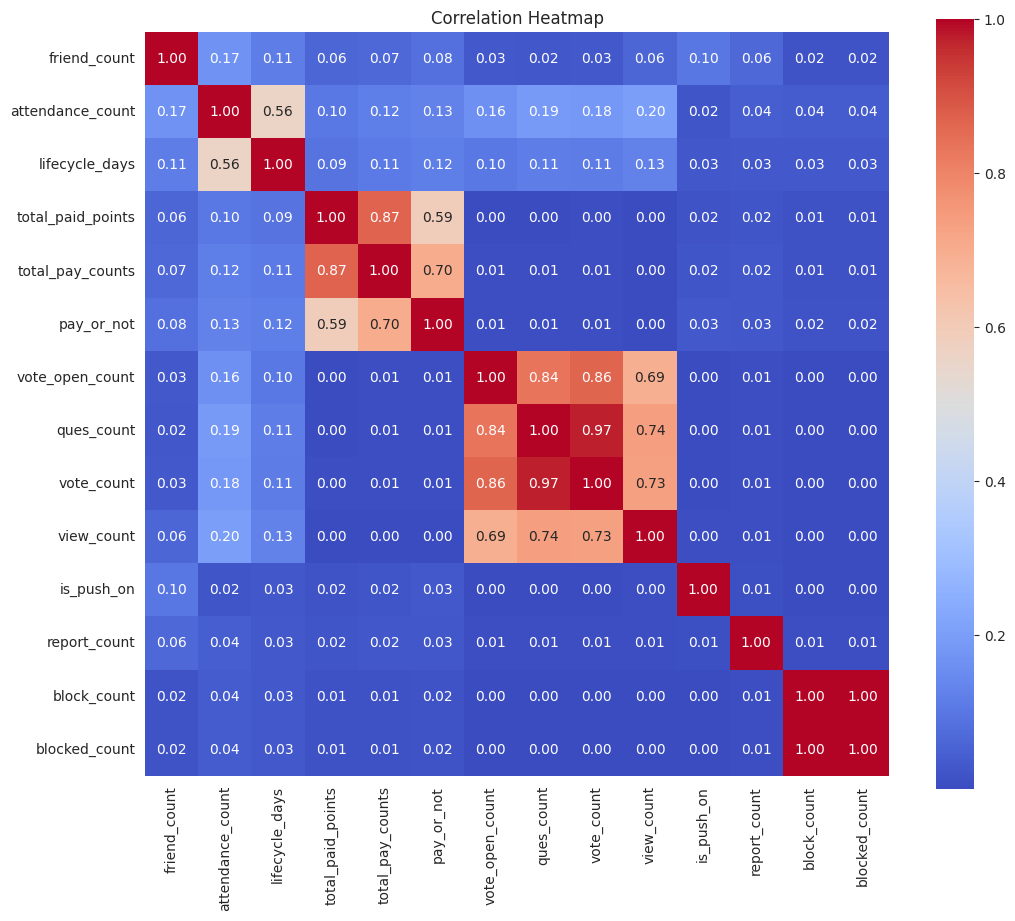

In [4]:
# 상관관계를 보기 위해 테이블 생성
correlation_matrix = merge2.corr()

# 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

### 중복변수제거

In [5]:
# 방문횟수 7회 초과 여부 (잔존한 유저 : 7회 이상 방문한 유저)
narin['is_att_over_7'] = (narin['attendance_count'] >= 7).apply(int)

# 병합
merge = pd.merge(narin, garim, how='inner', on='user_id')

# NaN -> 0 치환
merge = merge.fillna(0)

# 종속변수가 파생된 컬럼 제거
merge.drop(columns='attendance_count', inplace=True)

# 중복컬럼 제거 및 명 변경
merge.drop(columns='group_id_x', inplace=True)
merge.rename(columns={'group_id_y' : 'group_id'}, inplace=True)


# 이용 컬럼 순서 정리
merge = merge[[
                'group_id', 'school_id',
                'friend_count', 'gender_encoded',
                'total_paid_points', 'total_pay_counts', 'pay_or_not',            # 결제정보
                'vote_open_count',                                                # 주요(투표) 기능 이용 정보
                'ques_count', 'vote_count', 'view_count',                         # 기능 이용 정보
                'is_push_on', 'report_count',  'block_count', 'blocked_count',    # 기타 기능 이용 정보
                'chosen_count',
                'student_count', 'school_type',
                'is_att_over_7'                                                   # 종속변수
        ]]

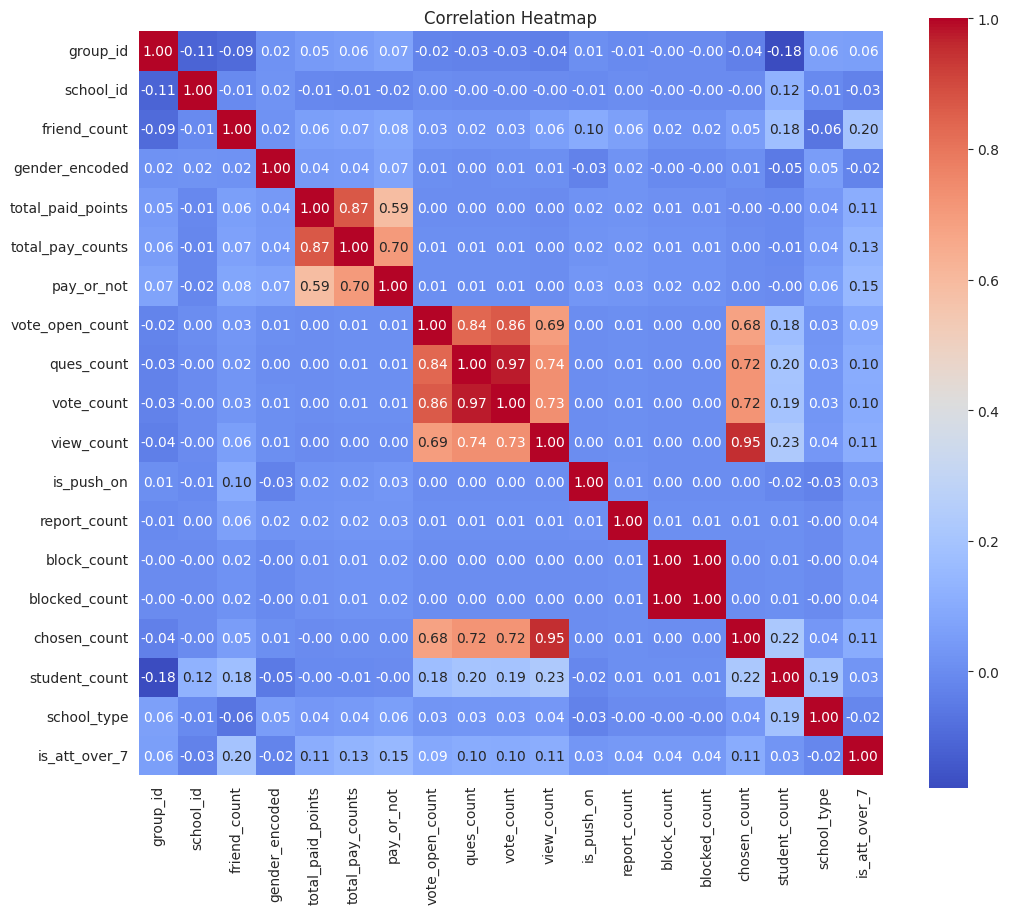

In [6]:
# 상관관계를 보기 위해 테이블 생성 (상관관계를 볼 수 없는 컬럼 제거)
correlation_matrix = merge.corr()

# 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = merge.drop(columns='is_att_over_7')  # 독립변수만
X = add_constant(X)  # 상수항 추가

# VIF 계산
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_df['VIF'] = vif_df['VIF'].apply(lambda x: f"{x:.2f}" if x != float('inf') else "inf")

print(vif_df.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


              feature    VIF
15      blocked_count    inf
14        block_count    inf
6    total_pay_counts   5.28
8     vote_open_count   4.11
5   total_paid_points   4.09
10         vote_count  22.49
0               const  21.60
7          pay_or_not   2.00
9          ques_count  19.27
11         view_count  11.23
16       chosen_count  10.63
17      student_count   1.20
3        friend_count   1.08
18        school_type   1.07
1            group_id   1.06
2           school_id   1.03
4      gender_encoded   1.02
12         is_push_on   1.01
13       report_count   1.00


In [8]:
# 다중공선성 높은 피처 제거 (VIF > 10인 것 제거)
merge.drop(columns=['blocked_count', 'ques_count', 'vote_count', 'view_count', 'chosen_count', 'total_pay_counts'], inplace=True)

### 변수별 회귀계수 및 p값 확인

In [9]:
import statsmodels.api as sm

# 독립변수(X), 종속변수(y) 분리
X = merge.drop(columns= 'is_att_over_7')
y = merge['is_att_over_7']

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델 학습
model = sm.Logit(y, X).fit()

# 결과 출력

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.560194
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:          is_att_over_7   No. Observations:               676987
Model:                          Logit   Df Residuals:                   676974
Method:                           MLE   Df Model:                           12
Date:                Tue, 12 Aug 2025   Pseudo R-squ.:                 0.06840
Time:                        04:26:06   Log-Likelihood:            -3.7924e+05
converged:                       True   LL-Null:                   -4.0709e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8044      0.013   -134.692      0.000      -1.831      -1.778
group_i

### 모델링 (랜덤 포레스트 분류 모델)

In [10]:
# 환경설정
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from collections import Counter

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 독립변수와 종속변수 나누기
X = merge.drop(columns='is_att_over_7')
y = merge['is_att_over_7']

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 결과 확인
print("Before sampling:", Counter(y))
print("After SMOTE:", Counter(y_resampled))

# SMOTE 된 데이터 train/test 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 스케일링 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# 결과 출력
print("[Random Forest]")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Before sampling: Counter({0: 481285, 1: 195702})
After SMOTE: Counter({0: 481285, 1: 481285})
[Random Forest]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.71     96257
           1       0.71      0.72      0.72     96257

    accuracy                           0.72    192514
   macro avg       0.72      0.72      0.72    192514
weighted avg       0.72      0.72      0.72    192514

ROC AUC Score: 0.7907747758870938
Confusion Matrix:
 [[68333 27924]
 [26935 69322]]


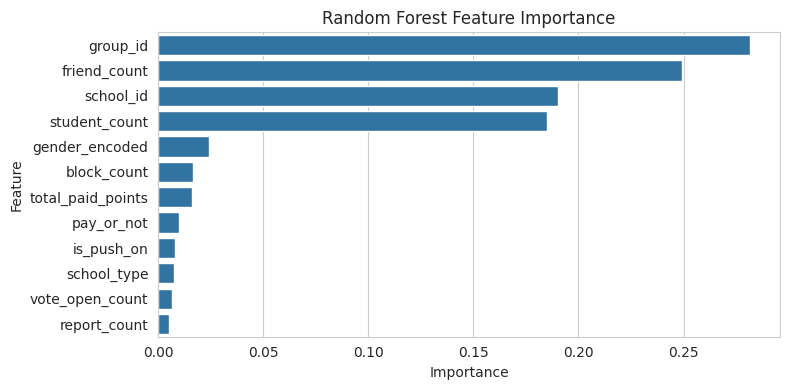

,Feature,Importance
0,group_id,0.281792
2,friend_count,0.249017
1,school_id,0.190426
10,student_count,0.185055
3,gender_encoded,0.024076
9,block_count,0.016358
4,total_paid_points,0.015967
5,pay_or_not,0.009954
7,is_push_on,0.007841
11,school_type,0.007415


In [12]:
# 중요도 시각화

importances = rf_model.feature_importances_
feature_names = X_train.columns  # 원본에서 가져옴

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

importance_df

## 1-2. 결제 유저 예측 모델링

In [13]:
df = pay_predict_model_v1.copy()

In [14]:
df = df.reset_index()

In [15]:
correlation_matrix = df.drop(columns=['id', 'pay_or_not']).corr()

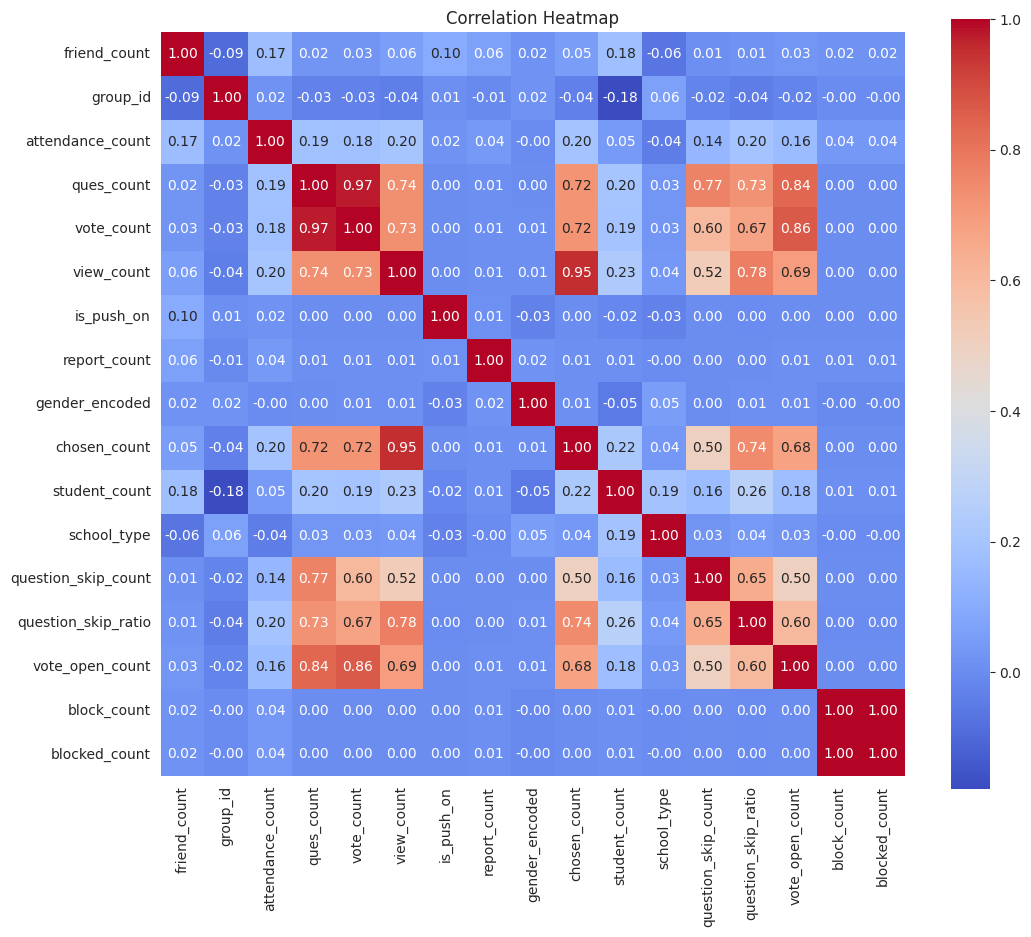

In [16]:
# 피처간 상관관계 확인
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# VIF 계
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = df.drop(columns=['id', 'pay_or_not'])  # 독립변수만
X = add_constant(X)  # 상수항 추가

# VIF 계산
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                feature           VIF
16          block_count           inf
17        blocked_count           inf
4            ques_count  2.625547e+04
5            vote_count  1.681966e+04
13  question_skip_count  2.198182e+03
0                 const  3.100880e+02
6            view_count  1.224803e+01
10         chosen_count  1.063487e+01
15      vote_open_count  4.115170e+00
14  question_skip_ratio  3.301820e+00
11        student_count  1.204221e+00
1          friend_count  1.100313e+00
3      attendance_count  1.086290e+00
12          school_type  1.065334e+00
2              group_id  1.049745e+00
7            is_push_on  1.012560e+00
9        gender_encoded  1.009978e+00
8          report_count  1.005402e+00


- VIF > 10: 매우 높은 다중공선성 → 제거 권장

- VIF > 5: 다중공선성 의심

- VIF ≤ 5: 대체로 괜찮음

### 피처 제거 결정 가이드

| 우선순위 | 기준                         | 설명                              |
| ---- | -------------------------- | ------------------------------- |
| 1    | 상관계수 0.95 이상 쌍 중 VIF 높은 변수 | 둘 중 하나만 살리고 제거                  |
| 2    | VIF 10 이상                  | 명백한 다중공선성, 제거 우선                |
| 3    | 도메인 지식 / 모델 중요도            | 업무적으로 중요하거나, 모델 성능 기여 큰 변수는 남기기 |
| 4    | 결측치 많거나 분포 치우친 변수 제거       | 품질이 낮은 변수는 우선 제거                |

#### 우선순위1

- vote_count, ques_count: 0.97
    - VIF값이 ques_count 가 더 높기 때문에, **ques_count** 제거.
- blocked_count, block_count 동일한 컬럼이므로, **blocked_count** 제거.
- chosen_count, view_count: 0.95
    - **view_count** 가 더 VIF 값이 높으므로 제거.

In [18]:
# 다중공선성 높은 피처 제거
df.drop(columns=['ques_count', 'blocked_count', 'view_count'], inplace=True)

In [19]:
correlation_matrix = df.drop(columns=['id']).corr()

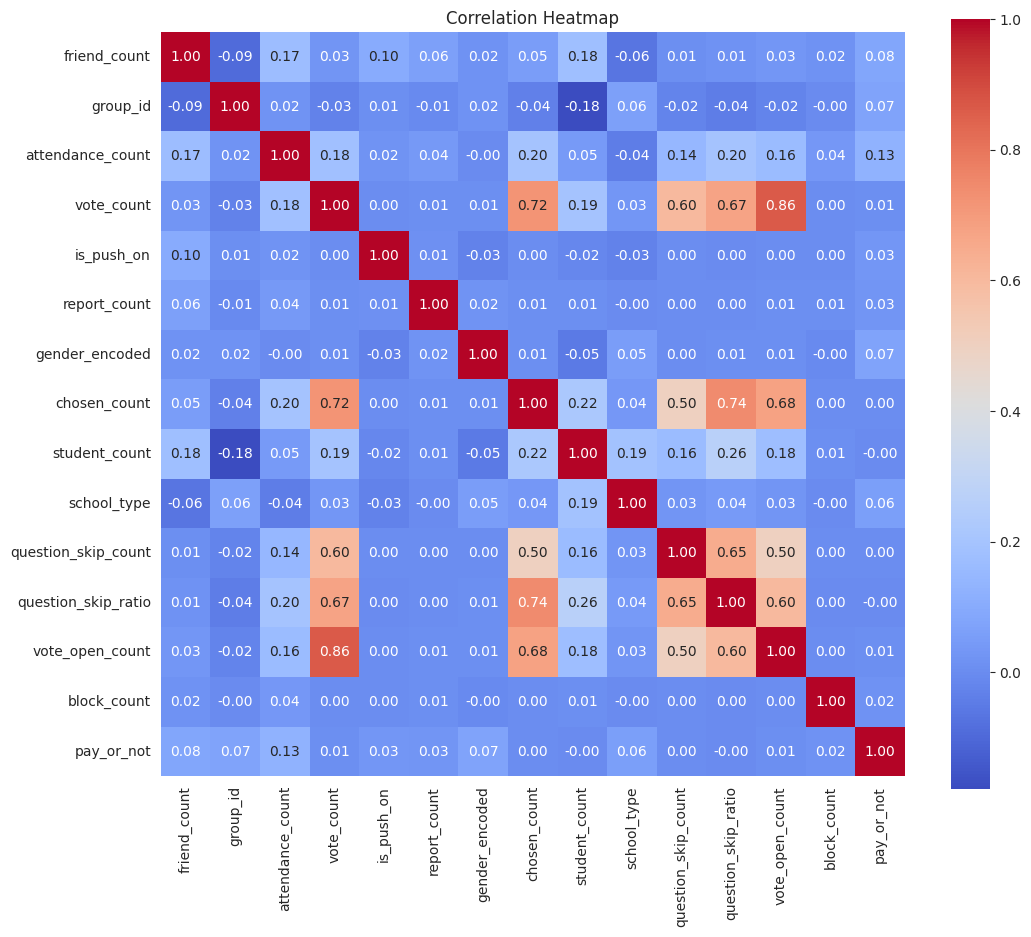

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

#### 우선순위2

- VIF 10이상인 피처 제거

In [21]:
X = df.drop(columns=['id', 'pay_or_not'])  # 독립변수만
X = add_constant(X)  # 상수항 추가

# VIF 계산
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

                feature         VIF
0                 const  274.817911
4            vote_count    5.166984
13      vote_open_count    4.083409
12  question_skip_ratio    3.021876
8          chosen_count    2.893937
11  question_skip_count    1.918509
9         student_count    1.204100
1          friend_count    1.097959
3      attendance_count    1.086284
10          school_type    1.065321
2              group_id    1.049744
5            is_push_on    1.012547
7        gender_encoded    1.009971
6          report_count    1.005395
14          block_count    1.001515


In [22]:
# 10 이상인 피처 확인
# const는 상수항이므로 확인 대상에서 제외.
# 따라서, VIF 값이 10이상인 피처는 없음.
high_vif = vif_df[vif_df['VIF'] >= 10]
print(high_vif.sort_values(by='VIF', ascending=False))

  feature         VIF
0   const  274.817911


### 회귀계수 확인

In [23]:
import statsmodels.api as sm

# 독립변수(X), 종속변수(y) 분리
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델 학습
model = sm.Logit(y, X).fit()

# 결과 출력
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.281026
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             pay_or_not   No. Observations:               676987
Model:                          Logit   Df Residuals:                   676972
Method:                           MLE   Df Model:                           14
Date:                Tue, 12 Aug 2025   Pseudo R-squ.:                 0.05230
Time:                        04:35:16   Log-Likelihood:            -1.9025e+05
converged:                       True   LL-Null:                   -2.0075e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.7059      0.083    -56.770      0.000      -4.868      -4.543
fr

### 샘플링 및 데이터 분할

In [24]:
# 독립변수와 종속변수 나누기
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 언더샘플링 적용
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 결과 확인
print("Before sampling:", Counter(y))
print("After undersampling:", Counter(y_resampled))

Before sampling: Counter({0: 617803, 1: 59184})
After undersampling: Counter({0: 59184, 1: 59184})


In [25]:
# 언더샘플링된 데이터 사용
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [26]:
# 모델 생성 및 학습
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# 예측
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]  # 양성 클래스 확률

# 분류 리포트
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC AUC
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

# 혼동 행렬
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65     11837
           1       0.65      0.61      0.63     11837

    accuracy                           0.64     23674
   macro avg       0.64      0.64      0.64     23674
weighted avg       0.64      0.64      0.64     23674

ROC AUC Score: 0.6939647653628367
Confusion Matrix:
 [[7926 3911]
 [4620 7217]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 베이스라인(로지스틱 회귀모델)

- 스케일링 작업과 랜덤 오버 샘플링을 적용한 회귀모델

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pandas as pd

# 1. 독립변수와 종속변수 분리
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. 언더샘플링
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("Before sampling:", Counter(y))
print("After undersampling:", Counter(y_resampled))

# 3. train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. 스케일링 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 6. 예측 및 평가
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# 7. 결과 출력
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before sampling: Counter({0: 617803, 1: 59184})
After undersampling: Counter({0: 59184, 1: 59184})
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.68      0.65     11837
           1       0.65      0.61      0.63     11837

    accuracy                           0.64     23674
   macro avg       0.64      0.64      0.64     23674
weighted avg       0.64      0.64      0.64     23674

ROC AUC Score: 0.6983555578720726


### RandomForest Model

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# 1. 데이터 준비
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. 랜덤 오버샘플링
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Before Sampling:", Counter(y))
print("After Oversampling:", Counter(y_resampled))

# 3. train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. (랜덤포레스트는 스케일링 필수 아님, 생략 가능)

# 5. 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. 예측 및 평가
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before Sampling: Counter({0: 617803, 1: 59184})
After Oversampling: Counter({0: 617803, 1: 617803})
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    123561
           1       0.97      1.00      0.98    123561

    accuracy                           0.98    247122
   macro avg       0.98      0.98      0.98    247122
weighted avg       0.98      0.98      0.98    247122

Random Forest ROC AUC Score: 0.9997114929606515


In [ ]:
# 언더샘플링

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# 1. 데이터 준비
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. 랜덤 언더샘플링
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("Before Sampling:", Counter(y))
print("After Undersampling:", Counter(y_resampled))

# 3. train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. (랜덤포레스트는 스케일링 생략 가능)

# 5. 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. 예측 및 평가
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before Sampling: Counter({0: 617803, 1: 59184})
After Undersampling: Counter({0: 59184, 1: 59184})
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.60      0.63     11837
           1       0.64      0.71      0.67     11837

    accuracy                           0.65     23674
   macro avg       0.65      0.65      0.65     23674
weighted avg       0.65      0.65      0.65     23674

Random Forest ROC AUC Score: 0.7149799996886832


In [ ]:
# SMOTE SAMPLING

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. 데이터 준비
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. SMOTE 오버샘플링
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before Sampling:", Counter(y))
print("After SMOTE Oversampling:", Counter(y_resampled))

# 3. train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. (랜덤포레스트는 스케일링 생략 가능)

# 5. 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. 예측 및 평가
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before Sampling: Counter({0: 617803, 1: 59184})
After SMOTE Oversampling: Counter({0: 617803, 1: 617803})
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80    123561
           1       0.78      0.85      0.81    123561

    accuracy                           0.81    247122
   macro avg       0.81      0.81      0.81    247122
weighted avg       0.81      0.81      0.81    247122

Random Forest ROC AUC Score: 0.8994202989468987


### XGBoost

In [ ]:
# 랜덤오버샘플링

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# 1. 데이터 준비
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. 랜덤 오버샘플링
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Before Sampling:", Counter(y))
print("After Oversampling:", Counter(y_resampled))

# 3. train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. XGBoost 모델 생성 및 학습
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before Sampling: Counter({0: 617803, 1: 59184})
After Oversampling: Counter({0: 617803, 1: 617803})


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:59:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.59      0.65    123561
           1       0.65      0.78      0.71    123561

    accuracy                           0.68    247122
   macro avg       0.69      0.68      0.68    247122
weighted avg       0.69      0.68      0.68    247122

XGBoost ROC AUC Score: 0.7529665622788484


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# 1. 데이터 준비
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. 언더샘플링 적용
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("Before UnderSampling:", Counter(y))
print("After UnderSampling:", Counter(y_resampled))

# 3. train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. XGBoost 모델 생성 및 학습
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'  # 경고 제거
)
xgb_model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# 6. 결과 출력
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before UnderSampling: Counter({0: 617803, 1: 59184})
After UnderSampling: Counter({0: 59184, 1: 59184})


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:08:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.58      0.65     11837
           1       0.65      0.77      0.71     11837

    accuracy                           0.68     23674
   macro avg       0.69      0.68      0.68     23674
weighted avg       0.69      0.68      0.68     23674

XGBoost ROC AUC Score: 0.7439799889760215


In [ ]:
# SMOTE

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. 데이터 준비
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. SMOTE 오버샘플링 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:", Counter(y))
print("After SMOTE:", Counter(y_resampled))

# 3. train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. XGBoost 모델 생성 및 학습
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# 6. 결과 출력
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before SMOTE: Counter({0: 617803, 1: 59184})
After SMOTE: Counter({0: 617803, 1: 617803})


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:08:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.59      0.66    123561
           1       0.66      0.80      0.72    123561

    accuracy                           0.70    247122
   macro avg       0.70      0.70      0.69    247122
weighted avg       0.70      0.70      0.69    247122

XGBoost ROC AUC Score: 0.7708490750320172


### LightBGM

In [ ]:
# 오버샘플링

from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# 1. 데이터 준비
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. 랜덤 오버샘플링 적용
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Before Sampling:", Counter(y))
print("After Oversampling:", Counter(y_resampled))

# 3. 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. LightGBM 모델 생성 및 학습
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

print("LightGBM Classification Report:\n", classification_report(y_test, y_pred))
print("LightGBM ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before Sampling: Counter({0: 617803, 1: 59184})
After Oversampling: Counter({0: 617803, 1: 617803})
[LightGBM] [Info] Number of positive: 494242, number of negative: 494242
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1920
[LightGBM] [Info] Number of data points in the train set: 988484, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.59      0.65    123561
           1       0.65      0.78      0.71    123561

    accuracy                           0.68    247122
   macro avg       0.69      0.68      0.68    247122
weighted avg       0.69      0.68      0.68    247122

LightGBM ROC AUC Score: 0.7513932464077172


In [ ]:
# SMOTE

from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. 데이터 준비
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. SMOTE 오버샘플링 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before Sampling:", Counter(y))
print("After SMOTE Oversampling:", Counter(y_resampled))

# 3. 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. LightGBM 모델 생성 및 학습
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

print("LightGBM Classification Report:\n", classification_report(y_test, y_pred))
print("LightGBM ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before Sampling: Counter({0: 617803, 1: 59184})
After SMOTE Oversampling: Counter({0: 617803, 1: 617803})
[LightGBM] [Info] Number of positive: 494242, number of negative: 494242
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.119228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2429
[LightGBM] [Info] Number of data points in the train set: 988484, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.61      0.67    123561
           1       0.67      0.80      0.73    123561

    accuracy                           0.70    247122
   macro avg       0.71      0.70      0.70    247122
weighted avg       0.71      0.70      0.70    247122

LightGBM ROC AUC Score: 0.78

### 결론

```python
랜덤포레스트 모델의 smote 모델링 기법이 가장 신뢰성이 높은 모델로 선정!
```

In [ ]:
# SMOTE SAMPLING

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. 데이터 준비
X = df.drop(columns=['id', 'pay_or_not'])
y = df['pay_or_not']

# 2. SMOTE 오버샘플링
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before Sampling:", Counter(y))
print("After SMOTE Oversampling:", Counter(y_resampled))

# 3. train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. (랜덤포레스트는 스케일링 생략 가능)

# 5. 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. 예측 및 평가
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before Sampling: Counter({0: 617803, 1: 59184})
After SMOTE Oversampling: Counter({0: 617803, 1: 617803})
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80    123561
           1       0.78      0.85      0.81    123561

    accuracy                           0.81    247122
   macro avg       0.81      0.81      0.81    247122
weighted avg       0.81      0.81      0.81    247122

Random Forest ROC AUC Score: 0.8994202989468987


#### 피처중요도

/tmp/ipython-input-1657651470.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance.head(20), palette='coolwarm')


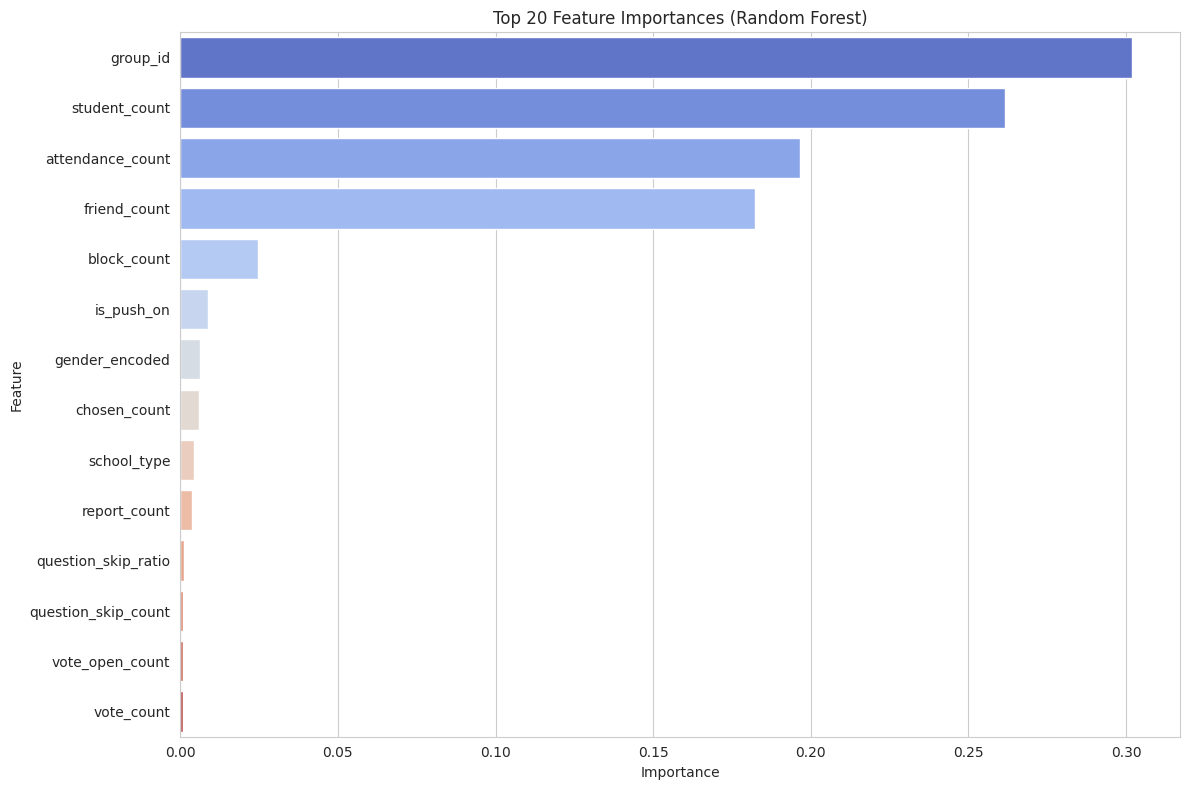

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 피처 중요도 추출
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})

# 중요도 기준 내림차순 정렬
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# 상위 20개 피처 시각화 (원하는 개수로 조정 가능)
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20), palette='coolwarm')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
print(feature_importance)

                feature  importance
1              group_id    0.302032
8         student_count    0.261532
2      attendance_count    0.196697
0          friend_count    0.182463
13          block_count    0.024734
4            is_push_on    0.008873
6        gender_encoded    0.006414
7          chosen_count    0.005795
9           school_type    0.004272
5          report_count    0.003593
11  question_skip_ratio    0.001152
10  question_skip_count    0.000828
12      vote_open_count    0.000807
3            vote_count    0.000807


In [ ]:
# SMOTE SAMPLING + feature_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. 데이터 준비
X = df[['group_id', 'student_count', 'attendance_count', 'friend_count', 'block_count']]
y = df['pay_or_not']

# 2. SMOTE 오버샘플링
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before Sampling:", Counter(y))
print("After SMOTE Oversampling:", Counter(y_resampled))

# 3. train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 4. (랜덤포레스트는 스케일링 생략 가능)

# 5. 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. 예측 및 평가
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Before Sampling: Counter({0: 617803, 1: 59184})
After SMOTE Oversampling: Counter({0: 617803, 1: 617803})
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79    123561
           1       0.77      0.85      0.81    123561

    accuracy                           0.80    247122
   macro avg       0.80      0.80      0.80    247122
weighted avg       0.80      0.80      0.80    247122

Random Forest ROC AUC Score: 0.8947579509291426


```python
피처 중요도 top5를 이용한 모델링 결과와 전체 피처를 적용한 모델의 성능 거의 동일!
```

## 1-3. 결제 전 행동 패턴

### 시퀀스 데이터 준비

In [29]:
df = hackle_events.copy()

# 사용할 컬럼만 남기기
df = df[['event_datetime', 'event_key', 'user_id', 'session']]

# event_datetime 타입 변경
df['event_datetime'] = pd.to_datetime(df['event_datetime'])

# session_id, event_datetime 순 정렬
df.sort_values(['user_id', 'event_datetime'], inplace=True)

# 전처리 대상 로그('click_appbar_setting', 'button'), 세션 로그('$session_start', '$session_end') 삭제
df = df[~df['event_key'].isin(['click_appbar_setting', 'button', '$session_start', '$session_end'])]

# 중복 제거
df_clean = df.sort_values(by='event_datetime').copy()
print("중복 제거 전 길이:", len(df_clean))

df_clean['event_before'] = df_clean.groupby(by=['user_id', 'session'])['event_key'].shift()
df_clean = df_clean[~(df_clean['event_key'] == df_clean['event_before'])]
print("1차 중복 제거 후 길이:", len(df_clean))

df_clean['event_before'] = df_clean.groupby(by=['user_id', 'session'])['event_key'].shift()
df_clean = df_clean[~(df_clean['event_key'] == df_clean['event_before'])]
print("2차 중복 제거 후 길이:", len(df_clean))

중복 제거 전 길이: 9682942
1차 중복 제거 후 길이: 8161706
2차 중복 제거 후 길이: 8161706


In [30]:
# 결제자 유저별 시퀀스생성

# 결제자 로그
purchase_user = df_clean[df_clean['event_key'] == 'complete_purchase']['user_id'].unique()
purchase_user_log = df_clean[df_clean['user_id'].isin(purchase_user)]

# 비결제자 로그
not_purchase_user_log = df_clean[~df_clean['user_id'].isin(purchase_user)]

# 유저별, 세션별 로그 리스트화
purchase_user_paths = purchase_user_log.groupby(['user_id','session'])['event_key'].apply(list).reset_index(name='paths')

# complete_purchase가 포함되는 세션 중, 결제까지의 기록만 남김
result_list = []

for user_id, group in purchase_user_log.groupby(['user_id', 'session']):
    complete_idx = group[group['event_key'] == 'complete_purchase'].index
    if not complete_idx.empty:
        first_idx = complete_idx[0]
        result_list.append(group.loc[:first_idx])

# 최종 병합
before_complete_purchas = pd.concat(result_list)
before_complete_purchas.reset_index(drop=True, inplace=True)

# 유저별 시퀀스 생성
purchase_user_paths = before_complete_purchas.groupby(['user_id','session'])['event_key'].apply(list).reset_index(name='paths')

# 시퀀스 길이의 분포 확인
seq_length = purchase_user_paths['paths'].apply(len)
seq_length.describe()

,paths
count,1699.000000
mean,32.009417
std,28.056311
min,2.000000
25%,14.000000
50%,24.000000
75%,42.000000
max,404.000000


In [31]:
# 시퀀스 길이 마지막 50개로 자르기
# 시퀀스 길이가 지나치게 길면 연산에 제약이 발생하므로, 시퀀스 길이 분포의 75% 분위수(47)를 기준으로 뒤에서 최대 50개 이벤트만 사용
purchase_user_paths_last50 = [seq[-50:] for seq in purchase_user_paths['paths']]

### 시퀀셜 마이닝

In [32]:
# 시퀀스 마이닝 적용
ps_50 = PrefixSpan(purchase_user_paths_last50)  # 시리즈형태

# 최소 support=500 (500번(유저 1699명의 약 30%) 이상 등장한 시퀀스만)
patterns_50 = ps_50.frequent(500)

# 결제 완료 기록 포함된 패턴 중 support > 1000 인 것 출력
for support, pattern in sorted(patterns_50, key=lambda x: -x[0]):
    if support > 1000 and 'complete_purchase' in pattern:
        print(f"Support: {support}, Pattern: {pattern}")

Support: 1699, Pattern: ['click_purchase', 'complete_purchase']
Support: 1699, Pattern: ['complete_purchase']
Support: 1698, Pattern: ['view_shop', 'click_purchase', 'complete_purchase']
Support: 1698, Pattern: ['view_shop', 'complete_purchase']
Support: 1408, Pattern: ['click_bottom_navigation_questions', 'view_shop', 'complete_purchase']
Support: 1408, Pattern: ['click_bottom_navigation_questions', 'click_purchase', 'complete_purchase']
Support: 1408, Pattern: ['click_bottom_navigation_questions', 'complete_purchase']
Support: 1406, Pattern: ['click_bottom_navigation_questions', 'view_shop', 'click_purchase', 'complete_purchase']
Support: 1389, Pattern: ['launch_app', 'view_shop', 'click_purchase', 'complete_purchase']
Support: 1389, Pattern: ['launch_app', 'view_shop', 'complete_purchase']
Support: 1389, Pattern: ['launch_app', 'click_purchase', 'complete_purchase']
Support: 1389, Pattern: ['launch_app', 'complete_purchase']
Support: 1358, Pattern: ['view_lab_tap', 'view_shop', 'com

시퀀셜 마이닝 결과 다음과 같은 패턴을 확인했다.
1. ['`click_bottom_navigation_questions`', '`view_shop`', '`click_purchase`', '`complete_purchase`']는 support 1407 (테이블의 전체 유저인 1699명의 83%)의 빈출 패턴이었다.
2. 그 밖의 빈출 개별 행동로는  `click_purchase`, `view_shop`, `click_bottom_navigation_questions`, `view_lab_tap`, `click_bottom_navigation_profile`, `view_timeline_tap` 등이 있었다.

### 결제 n단계 전 행동 분석

In [33]:
# 결제 1단계 전 행동
right_bf_purchase = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        right_bf_purchase.append(seq[idx - 1])

right_bf_purchase = pd.Series(right_bf_purchase)
right_bf_purchase.value_counts()

# 99%에서 click_purchase

,count
click_purchase,1693
view_shop,5
view_lab_tap,1


In [34]:
# 결제 2단계 전 행동
two_bf_purchase = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        if idx > 1:
            two_bf_purchase.append(seq[idx - 2])

two_bf_purchase = pd.Series(two_bf_purchase)
two_bf_purchase.value_counts()

# 99%에서 view_shop

,count
view_shop,1687
click_purchase,5
click_bottom_navigation_questions,3
view_questions_tap,2
view_timeline_tap,1


## 1-3. 결제 전 행동 패턴

### 시퀀스 데이터 준비

In [35]:
df = hackle_events.copy()

# 사용할 컬럼만 남기기
df = df[['event_datetime', 'event_key', 'user_id', 'session']]

# event_datetime 타입 변경
df['event_datetime'] = pd.to_datetime(df['event_datetime'])

# session_id, event_datetime 순 정렬
df.sort_values(['user_id', 'event_datetime'], inplace=True)

# 전처리 대상 로그('click_appbar_setting', 'button'), 세션 로그('$session_start', '$session_end') 삭제
df = df[~df['event_key'].isin(['click_appbar_setting', 'button', '$session_start', '$session_end'])]

# 중복 제거
df_clean = df.sort_values(by='event_datetime').copy()
print("중복 제거 전 길이:", len(df_clean))

df_clean['event_before'] = df_clean.groupby(by=['user_id', 'session'])['event_key'].shift()
df_clean = df_clean[~(df_clean['event_key'] == df_clean['event_before'])]
print("1차 중복 제거 후 길이:", len(df_clean))

df_clean['event_before'] = df_clean.groupby(by=['user_id', 'session'])['event_key'].shift()
df_clean = df_clean[~(df_clean['event_key'] == df_clean['event_before'])]
print("2차 중복 제거 후 길이:", len(df_clean))

중복 제거 전 길이: 9682942
1차 중복 제거 후 길이: 8161706
2차 중복 제거 후 길이: 8161706


In [36]:
# 결제자 유저별 시퀀스생성

# 결제자 로그
purchase_user = df_clean[df_clean['event_key'] == 'complete_purchase']['user_id'].unique()
purchase_user_log = df_clean[df_clean['user_id'].isin(purchase_user)]

# 비결제자 로그
not_purchase_user_log = df_clean[~df_clean['user_id'].isin(purchase_user)]

# 유저별, 세션별 로그 리스트화
purchase_user_paths = purchase_user_log.groupby(['user_id','session'])['event_key'].apply(list).reset_index(name='paths')

# complete_purchase가 포함되는 세션 중, 결제까지의 기록만 남김
result_list = []

for user_id, group in purchase_user_log.groupby(['user_id', 'session']):
    complete_idx = group[group['event_key'] == 'complete_purchase'].index
    if not complete_idx.empty:
        first_idx = complete_idx[0]
        result_list.append(group.loc[:first_idx])

# 최종 병합
before_complete_purchas = pd.concat(result_list)
before_complete_purchas.reset_index(drop=True, inplace=True)

# 유저별 시퀀스 생성
purchase_user_paths = before_complete_purchas.groupby(['user_id','session'])['event_key'].apply(list).reset_index(name='paths')

# 시퀀스 길이의 분포 확인
seq_length = purchase_user_paths['paths'].apply(len)
seq_length.describe()

,paths
count,1699.000000
mean,32.009417
std,28.056311
min,2.000000
25%,14.000000
50%,24.000000
75%,42.000000
max,404.000000


In [37]:
# 시퀀스 길이 마지막 50개로 자르기
# 시퀀스 길이가 지나치게 길면 연산에 제약이 발생하므로, 시퀀스 길이 분포의 75% 분위수(47)를 기준으로 뒤에서 최대 50개 이벤트만 사용
purchase_user_paths_last50 = [seq[-50:] for seq in purchase_user_paths['paths']]

### 시퀀셜 마이닝

In [38]:
# 시퀀스 마이닝 적용
ps_50 = PrefixSpan(purchase_user_paths_last50)  # 시리즈형태

# 최소 support=500 (500번(유저 1699명의 약 30%) 이상 등장한 시퀀스만)
patterns_50 = ps_50.frequent(500)

# 결제 완료 기록 포함된 패턴 중 support > 1000 인 것 출력
for support, pattern in sorted(patterns_50, key=lambda x: -x[0]):
    if support > 1000 and 'complete_purchase' in pattern:
        print(f"Support: {support}, Pattern: {pattern}")

Support: 1699, Pattern: ['click_purchase', 'complete_purchase']
Support: 1699, Pattern: ['complete_purchase']
Support: 1698, Pattern: ['view_shop', 'click_purchase', 'complete_purchase']
Support: 1698, Pattern: ['view_shop', 'complete_purchase']
Support: 1408, Pattern: ['click_bottom_navigation_questions', 'view_shop', 'complete_purchase']
Support: 1408, Pattern: ['click_bottom_navigation_questions', 'click_purchase', 'complete_purchase']
Support: 1408, Pattern: ['click_bottom_navigation_questions', 'complete_purchase']
Support: 1406, Pattern: ['click_bottom_navigation_questions', 'view_shop', 'click_purchase', 'complete_purchase']
Support: 1389, Pattern: ['launch_app', 'view_shop', 'click_purchase', 'complete_purchase']
Support: 1389, Pattern: ['launch_app', 'view_shop', 'complete_purchase']
Support: 1389, Pattern: ['launch_app', 'click_purchase', 'complete_purchase']
Support: 1389, Pattern: ['launch_app', 'complete_purchase']
Support: 1358, Pattern: ['view_lab_tap', 'view_shop', 'com

시퀀셜 마이닝 결과 다음과 같은 패턴을 확인했다.
1. ['`click_bottom_navigation_questions`', '`view_shop`', '`click_purchase`', '`complete_purchase`']는 support 1407 (테이블의 전체 유저인 1699명의 83%)의 빈출 패턴이었다.
2. 그 밖의 빈출 개별 행동로는  `click_purchase`, `view_shop`, `click_bottom_navigation_questions`, `view_lab_tap`, `click_bottom_navigation_profile`, `view_timeline_tap` 등이 있었다.

### 결제 n단계 전 행동 분석

In [39]:
# 결제 1단계 전 행동
right_bf_purchase = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        right_bf_purchase.append(seq[idx - 1])

right_bf_purchase = pd.Series(right_bf_purchase)
right_bf_purchase.value_counts()

# 99%에서 click_purchase

,count
click_purchase,1693
view_shop,5
view_lab_tap,1


In [40]:
# 결제 2단계 전 행동
two_bf_purchase = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        if idx > 1:
            two_bf_purchase.append(seq[idx - 2])

two_bf_purchase = pd.Series(two_bf_purchase)
two_bf_purchase.value_counts()

# 99%에서 view_shop

,count
view_shop,1687
click_purchase,5
click_bottom_navigation_questions,3
view_questions_tap,2
view_timeline_tap,1


In [41]:
# 결제 3단계 전 행동
three_bf_purchase = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        if idx > 2:
            three_bf_purchase.append(seq[idx - 3])

three_bf_purchase = pd.Series(three_bf_purchase)
three_bf_purchase.value_counts()

# 30%는 질문탭 진입 (click_bottom_navigation_questions 17%, view_questions_tap 13%) 직후 상점 진입
# 16%는 출석체크(click_attendance) 직후 상점 진입
# 9%는 받은 질문 열기(click_question_open) 직후 상점 진입
# 그 밖에 view_timeline_tap(8%), complete_question(7%), launch_app(7%), view_lab_tap(7%) 등의 행동 이후 상점 진입

,count
click_bottom_navigation_questions,289
click_attendance,278
view_questions_tap,224
click_question_open,156
view_timeline_tap,138
complete_question,126
launch_app,123
view_lab_tap,116
click_notice_detail,70
click_purchase,49


In [42]:
# 결제 4단계 전 행동
four_bf_purchase = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        if idx > 3:
            four_bf_purchase.append(seq[idx - 4])

four_bf_purchase = pd.Series(four_bf_purchase)
four_bf_purchase.value_counts()

,count
click_bottom_navigation_questions,336
view_questions_tap,226
view_timeline_tap,199
view_lab_tap,166
view_shop,124
click_question_start,97
click_appbar_alarm_center,81
launch_app,70
click_bottom_navigation_timeline,60
complete_question,52


In [43]:
# 결제 5단계 전 행동
five_bf_purchase = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        if idx > 4:
            five_bf_purchase.append(seq[idx - 5])

five_bf_purchase = pd.Series(five_bf_purchase)
five_bf_purchase.value_counts()

,count
view_timeline_tap,265
click_bottom_navigation_questions,260
view_lab_tap,229
view_questions_tap,151
click_bottom_navigation_timeline,108
click_question_start,89
click_question_open,71
view_shop,64
launch_app,49
click_attendance,43


### 상점 진입 직전 연속 행동 분석

In [44]:
# 상점 진입 직전의 행동 연속 2개 시퀀스
before_purchase_2 = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        if idx >= 4:
            before_purchase_2.append(seq[idx - 4:idx - 2])

before_purchase_2 = pd.Series(before_purchase_2)
before_purchase_2.value_counts().head(10)

,count
"[click_bottom_navigation_questions, view_questions_tap]",110
"[view_questions_tap, click_bottom_navigation_questions]",86
"[view_timeline_tap, view_questions_tap]",77
"[click_question_start, complete_question]",76
"[click_appbar_alarm_center, click_notice_detail]",69
"[view_lab_tap, click_bottom_navigation_questions]",64
"[click_bottom_navigation_questions, click_attendance]",60
"[click_bottom_navigation_questions, view_lab_tap]",57
"[click_bottom_navigation_questions, view_timeline_tap]",54
"[view_timeline_tap, click_bottom_navigation_questions]",52


In [45]:
# 상점 진입 직전의 행동 연속 3개 시퀀스
before_purchase_3 = []

for seq in purchase_user_paths['paths']:
    if 'complete_purchase' in seq:
        idx = seq.index('complete_purchase')
        if idx >= 5:
            before_purchase_3.append(seq[idx - 5:idx - 2])

before_purchase_3 = pd.Series(before_purchase_3)
before_purchase_3.value_counts().head(10)

,count
"[click_question_start, skip_question, complete_question]",46
"[view_timeline_tap, click_bottom_navigation_questions, view_questions_tap]",43
"[view_timeline_tap, view_questions_tap, click_bottom_navigation_questions]",37
"[click_bottom_navigation_questions, view_timeline_tap, view_questions_tap]",36
"[view_lab_tap, click_bottom_navigation_questions, view_timeline_tap]",35
"[click_bottom_navigation_timeline, click_bottom_navigation_questions, view_questions_tap]",29
"[view_lab_tap, view_timeline_tap, view_questions_tap]",27
"[click_question_open, view_shop, launch_app]",25
"[click_bottom_navigation_timeline, view_questions_tap, click_bottom_navigation_questions]",24
"[view_timeline_tap, click_bottom_navigation_questions, view_lab_tap]",23


결제 n단계 전 행동 분석 및 상점 진입 직전 연속 행동 분석 결과, 다음과 같은 패턴을 확인했다.
- 결제 직전 두 행동은 **99% 이상의 유저**에서 ‘**상점 진입 → 상품 클릭**’으로 동일하게 나타남
- **상점 진입 직전 행동**은 **질문탭 진입, 투표 참여 및 완료, 지목 받은 투표 확인** 순으로 나타남. 이는 **제공된 무료 투표 참여 기회를 모두 사용한 후 추가적으로 참여**하기 위한 행동이나, **투표에서 지목받은 후 투표자의 초성을 열람하기 위한 행동**으로 해석된다.
- 결제 완료 n단계(1~5) 전 이벤트 등장 비율 분석 결과,
    - **출석체크, 지목 받은 투표 확인, 앱 접속, 투표 완료**는 결제와 가까운 단계에서 보다 더 집중적으로 등장했다. 이는 해당 이벤트가 결제의 직접적인 트리거일 가능성을 시사한다.
    - **질문탭** **진입**은 **발생 빈도 자체는 높으나** 상점 진입 이전 단계(3 ~ 5단계)에서 **고르게 등장**했다. 또, **투표 시작, 타임라인 탭 진입, 실헙실 탭 진입, 알림 센터 진입**은 결제와 **먼 단계에서 보다 더 집중적으로 등장**했다. 이는 질문 해당 **이벤트가 결제의 흐름에 기여하지만, 상대적으로 간접적인 역할을 수행했을 가능성**을 시사한다.
- 상점 진입 직전 연속 행동에서는 **투표 참여(, 질문 스킵), 투표 완료**의 뚜렷한 경로가 확인됨

### 결제 직전 3개 행동별 체류시간

In [46]:
# 결제자의 결제 직전 3개 행동별 체류시간
# 결제 직전 행동 양상을 파악하기 위해 결제 완료 이전 3단계(상품 클릭, 상점 진입, 상점 진입 직전 행동)까지의 로그를 기준으로 체류 시간을 집계함

# 결제 완료가 있는 세션 중, 첫번째 결제 완료까지의 로그만 남김
result_list = []

for _, group in purchase_user_log.groupby(by=['user_id', 'session']):
    complete_idx = group[group['event_key'] == 'complete_purchase'].index
    if not complete_idx.empty:
        first_idx = complete_idx[0]
        result_list.append(group.loc[:first_idx])

before_complete_purchase = pd.concat(result_list)

# 정렬
before_complete_purchase = before_complete_purchase.sort_values(['user_id', 'event_datetime'])

# 다음 이벤트 시간 계산 (체류 시간 추정)
before_complete_purchase['next_time'] = before_complete_purchase.groupby(['user_id', 'session'])['event_datetime'].shift(-1)
before_complete_purchase['duration'] = (before_complete_purchase['next_time'] - before_complete_purchase['event_datetime']).dt.total_seconds()

# 결제 유저 추출
purchasers = before_complete_purchase['user_id'].unique()

# 결제 직전 3개 이벤트 추출

event_durations = []

for uid in purchasers:
    user_seq = before_complete_purchase[before_complete_purchase['user_id'] == uid].sort_values('event_datetime')
    user_seq = user_seq.reset_index(drop=True)
    purchase_idx = user_seq[user_seq['event_key'] == 'complete_purchase'].index[0]
    prior_events = user_seq.iloc[max(0, purchase_idx - 3): purchase_idx]
    event_durations.extend(prior_events[['event_key', 'duration']].values.tolist())

# DataFrame으로 변환
event_before_complete_purchase = pd.DataFrame(event_durations, columns=['event_key', 'duration'])

# 30회 이하 등장한 이벤트 제거
event_stay_time_bf_purchase = event_before_complete_purchase.groupby('event_key', as_index=False)['duration'].describe()
freq_events = event_stay_time_bf_purchase[event_stay_time_bf_purchase['count'] > 30]['event_key'].unique()
event_before_complete_purchase_new = event_before_complete_purchase[event_before_complete_purchase['event_key'].isin(freq_events)]

# 이상치 제거
def clean_iqr(df, col):
		Q1 = df[col].quantile(0.25)
		Q3 = df[col].quantile(0.75)
		IQR = Q3 - Q1

		lower_fence = Q1 - 1.5*IQR
		upper_fence = Q3 + 1.5*IQR

		return df[df[col] < upper_fence]

p_event_cleaned_dfs = {}

for event in freq_events:
    event_df = event_before_complete_purchase_new[event_before_complete_purchase_new['event_key']==event]
    p_event_cleaned_dfs[event] = clean_iqr(event_df, 'duration')

# 전처리 후 이벤트별 체류 시간
p_event_cleaned_concat = pd.concat(p_event_cleaned_dfs).reset_index().drop(columns=['level_0', 'level_1'])
p_event_cleaned_concat_describe = p_event_cleaned_concat.groupby(by='event_key', as_index=False).describe()
p_event_cleaned_concat_describe.columns = p_event_cleaned_concat_describe.columns.droplevel(0)
p_event_cleaned_concat_describe.columns = ['event_key', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
p_event_cleaned_concat_describe.sort_values(by='mean', ascending=False)

,event_key,count,mean,std,min,25%,50%,75%,max
2,click_notice_detail,60.0,33.133333,23.977720,2.0,16.0,26.5,43.5,108.0
3,click_purchase,1436.0,21.873955,13.866164,0.0,13.0,17.0,27.0,72.0
4,click_question_open,124.0,17.451613,15.637330,2.0,5.0,11.0,26.0,67.0
6,complete_question,111.0,7.828829,2.511334,2.0,6.0,8.0,9.0,14.0
5,click_question_start,35.0,6.885714,4.745099,1.0,3.0,6.0,9.5,20.0
7,launch_app,97.0,5.381443,2.895554,2.0,3.0,4.0,6.0,15.0
0,click_attendance,245.0,4.967347,2.362392,1.0,3.0,4.0,6.0,12.0
10,view_shop,1473.0,3.876443,2.550244,0.0,2.0,3.0,5.0,11.0
1,click_bottom_navigation_questions,267.0,2.367041,1.408927,0.0,2.0,2.0,3.0,6.0
8,view_lab_tap,83.0,2.132530,0.934059,0.0,2.0,2.0,3.0,4.0


In [47]:
# 비결제자의 상점 방문 직전 3개 행동별 체류시간
# 결제자의 '결제 직전 3단계 행동'과 비교하기 위해, 결제 전 반드시 필요한 행동인 ‘상점 방문(view_shop)’까지의 로그를 기준으로 분석함.

# 정렬
not_purchase_user_log = not_purchase_user_log.sort_values(['user_id', 'event_datetime'])

# 다음 이벤트 시간 계산 (체류 시간 추정)
not_purchase_user_log['next_time'] = not_purchase_user_log.groupby(['user_id', 'session'])['event_datetime'].shift(-1)
not_purchase_user_log['duration'] = (not_purchase_user_log['next_time'] - not_purchase_user_log['event_datetime']).dt.total_seconds()

# view_shop이 있는 로그만 추출
viewshop_sessions = not_purchase_user_log[not_purchase_user_log['event_key'] == 'view_shop'][['user_id', 'session']].drop_duplicates()
filtered_log = not_purchase_user_log.merge(viewshop_sessions, on=['user_id', 'session'])

# view_shop이 있는 세션 중, 첫번째 view_shop까지의 로그만 남김
result_list = []

for _, group in filtered_log.groupby(['user_id', 'session']):
    first_idx = group[group['event_key'] == 'view_shop'].index[0]
    result_list.append(group[group.index <= first_idx])

before_viewshop = pd.concat(result_list, ignore_index=True)

# 상점 방문 유저 추출
shop_visitors = before_viewshop['user_id'].unique()

# 결제 직전 3개 이벤트 추출
from collections import defaultdict

event_durations = []

for uid in shop_visitors:
    user_seq = before_viewshop[before_viewshop['user_id'] == uid].sort_values('event_datetime')
    user_seq = user_seq.reset_index(drop=True)
    viewshop_idx = user_seq[user_seq['event_key'] == 'view_shop'].index[0]
    prior_events = user_seq.iloc[max(0, viewshop_idx - 3): viewshop_idx + 1]
    event_durations.extend(prior_events[['event_key', 'duration']].values.tolist())

# DataFrame으로 변환
event_before_viewshop = pd.DataFrame(event_durations, columns=['event_key', 'duration'])

# 결제 직전에 30회 초과하여 등장한 이벤트만 남김
event_before_viewshop_new = event_before_viewshop[event_before_viewshop['event_key'].isin(freq_events)]

# 이상치 제거
np_event_cleaned_dfs = {}

for event in freq_events:
    event_df = event_before_viewshop_new[event_before_viewshop_new['event_key']==event]
    np_event_cleaned_dfs[event] = clean_iqr(event_df, 'duration')

# 전처리 후 이벤트별 체류 시간
np_event_cleaned_concat = pd.concat(np_event_cleaned_dfs).reset_index().drop(columns=['level_0', 'level_1'])
np_event_cleaned_concat_describe = np_event_cleaned_concat.groupby(by='event_key', as_index=False).describe()
np_event_cleaned_concat_describe.columns = np_event_cleaned_concat_describe.columns.droplevel(0)
np_event_cleaned_concat_describe.columns = ['event_key', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
np_event_cleaned_concat_describe.sort_values(by='mean', ascending=False)

,event_key,count,mean,std,min,25%,50%,75%,max
4,click_question_start,1538.0,42.214564,39.355157,0.0,6.0,30.0,71.0,173.0
2,click_notice_detail,837.0,34.922342,30.770138,0.0,10.0,24.0,51.0,140.0
3,click_question_open,7563.0,27.526246,25.632619,0.0,8.0,19.0,39.0,113.0
6,launch_app,4281.0,12.520906,10.181970,1.0,5.0,9.0,17.0,48.0
9,view_shop,10710.0,7.857330,7.079976,0.0,3.0,5.0,11.0,32.0
5,complete_question,1597.0,7.589856,3.641032,0.0,6.0,7.0,9.0,18.0
0,click_attendance,3058.0,5.145193,2.438617,0.0,3.0,5.0,7.0,12.0
1,click_bottom_navigation_questions,5850.0,2.498974,2.824934,0.0,0.0,2.0,4.0,12.0
8,view_questions_tap,3297.0,1.499545,1.844226,0.0,0.0,1.0,3.0,7.0
7,view_lab_tap,2279.0,1.466433,2.055121,0.0,0.0,1.0,2.0,9.0


In [48]:
# 결제자, 비결제자 병합
mean_both = p_event_cleaned_concat_describe[['event_key', 'mean']].merge(np_event_cleaned_concat_describe[['event_key', 'mean']], on='event_key', how='left')
mean_both.columns = ['event_key', 'purcahsed', 'not_purchased']
mean_both

,event_key,purcahsed,not_purchased
0,click_attendance,4.967347,5.145193
1,click_bottom_navigation_questions,2.367041,2.498974
2,click_notice_detail,33.133333,34.922342
3,click_purchase,21.873955,NaN
4,click_question_open,17.451613,27.526246
5,click_question_start,6.885714,42.214564
6,complete_question,7.828829,7.589856
7,launch_app,5.381443,12.520906
8,view_lab_tap,2.132530,1.466433
9,view_questions_tap,2.125000,1.499545


In [49]:
# 결제자, 비결제자 이벤트 체류 시간 통계 검정
def run_kruskal_test(np_dfs, p_dfs):
    results = []

    for col in np_dfs.keys():
        if col in p_dfs:  # 공통된 이벤트만 비교
            np_dur = np_dfs[col]['duration'].dropna()
            p_dur = p_dfs[col]['duration'].dropna()

            if len(np_dur) > 0 and len(p_dur) > 0:
                stat, p = kruskal(np_dur, p_dur)
                results.append({
                    'event_key': col,
                    'n_np': len(np_dur),
                    'n_p': len(p_dur),
                    'stat': stat,
                    'p_value': float(f"{p:.5f}")
                })

    return pd.DataFrame(results).sort_values('p_value')

kruskal_result = run_kruskal_test(np_event_cleaned_dfs, p_event_cleaned_dfs)
print(kruskal_result)

                            event_key   n_np   n_p        stat  p_value
6                          launch_app   4281    97   74.063194  0.00000
7                        view_lab_tap   2279    83   47.120946  0.00000
4                click_question_start   1538    35   32.540511  0.00000
8                  view_questions_tap   3297   192   61.354285  0.00000
9                           view_shop  10710  1473  426.502041  0.00000
10                  view_timeline_tap   3039   108   52.795978  0.00000
3                 click_question_open   7563   124   18.758057  0.00001
1   click_bottom_navigation_questions   5850   267   12.249406  0.00047
5                   complete_question   1597   111    1.349404  0.24538
0                    click_attendance   3058   245    0.767228  0.38108
2                 click_notice_detail    837    60    0.413921  0.51999


/tmp/ipython-input-755452320.py:8: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-755452320.py:8: UserWarning: Glyph 48292 (\N{HANGUL SYLLABLE BEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-755452320.py:8: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-755452320.py:8: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-755452320.py:8: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-755452320.py:8: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-755452320.py:8: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-

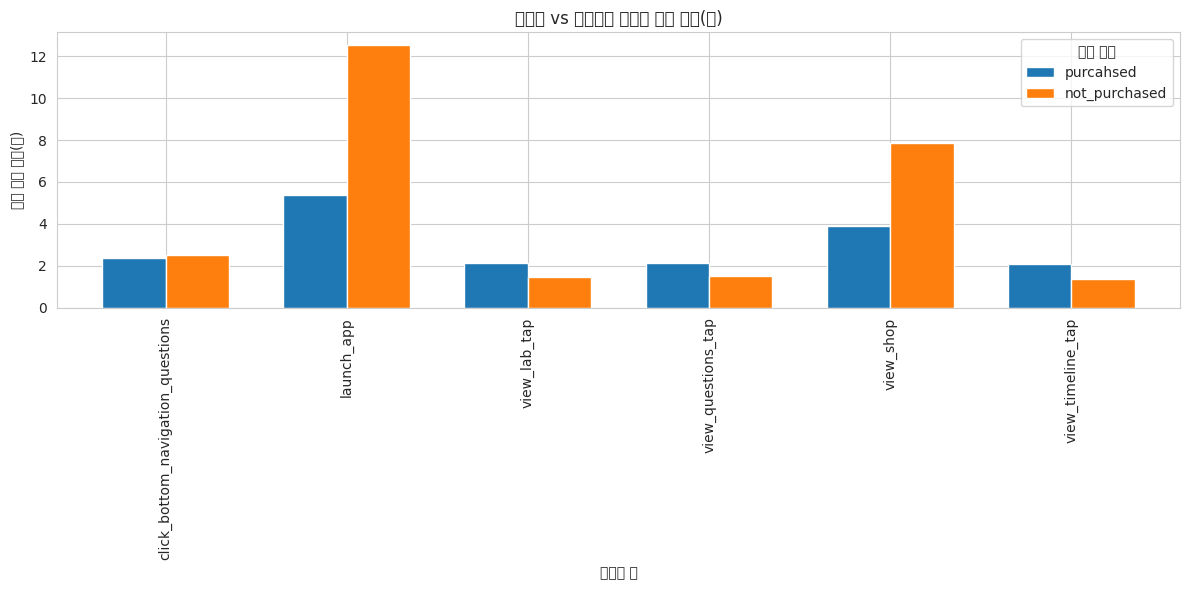

In [50]:
valid_events = ['launch_app', 'view_lab_tap', 'view_questions_tap', 'view_shop', 'view_timeline_tap', 'click_bottom_navigation_questions']
mean_both[mean_both['event_key'].isin(valid_events)].plot(kind='bar', x='event_key', figsize=(12, 6), width=0.7)

plt.title('결제자 vs 비결제자 이벤트 체류 시간(초)')
plt.ylabel('평균 체류 시간(초)')
plt.xlabel('이벤트 키')
plt.legend(title='유저 그룹')
plt.tight_layout()
plt.show()

- 두 그룹 모두 **`click_notice_detail`**(지목 받은 투표 확인, 받은 글 확인 등), **`click_question_open`**(지목 받은 투표 확인)과 같은 이벤트에서 **평균 체류 시간이 10초를  초과**하며, **가장 오래 체류**하는 경향을 보였다. 해당 이벤트에서**는 결제 여부에 따른 유의미한 차이는 나타나지 않았다**.
- 결제자, 비결제자 그룹의 이벤트 체류 시간 비교 결과, **앱 실행, 실험실탭 진입, 상점 진입, 질문탭 진입, 타임라인탭 진입** 이벤트에서 **통계적으로 유의미한 차이**가 나타났다.
    - 이중 **앱 실행, 상점 진입**의 경우 비결제자 그룹에서 더 길게 체류했으며,
    - **실험실탭 진입, 질문탭 진입, 타임라인탭 진입**에서는 결제자 그룹에서 더 길게 체류한 것으로 나타났다.
- 이는 **결제자가 탭을 탐색할 때 비결제자보다 더 큰 관심도와 몰입도**를 가지고 앱을 사용할 가능성이 있음을 시사한다.
- **상점 진입** 이벤트의 경우 **비결제자 그룹에서 평균 체류 시간이 약 2배 높았다**. 이는 **결제자는 명확한 구매 의도를 갖고 상점에 진입한 후 빠르게 다음 행동으로 빠르게 이동**한 반면, **비결제자는 구매 여부를 고민하며 오랜 시간 머물렀을 가능성**을 시사한다.

### 주요 행동 결제까지 소요시간

- 주요 행동 정의: 결제 직전 3개 행동 분석 시 30회 이상 등장한 이벤트
    - 상품 클릭(`click_purchase`)
    - 상점 진입(`view_shop`)
    - 질문탭 진입 (`click_bottom_navigation_questions` , `view_questions_tap` )
    - 출석체크(`click_attendance`)
    - 지목 받은 투표 확인(`click_question_open`)
    - 타임라인탭 진입 (`view_timeline_tap`)
    - 투표 완료 (`complete_question`)
    - 실험실탭 진입 (`view_lab_tap`)
    - 특정 알림 클릭 (`click_notice_detail`)
    - 앱 열기 (`launch_app`)
- 소요 시간 정의:
    - 동일한 세션 중 결제 전에 주요 행동을 한 기록이 있는 경우, 해당 행동과 결제와의 시간 간격(분)
    - (한 세션 내에 같은 행동을 여러번 할 경우) 결제와 가장 가까운 이벤트와 결제까지의 시간 간격(분)

In [51]:
# 유저별로 주요 이벤트를를 마지막으로 수행한 시점에서 결제까지의 소요시간
freq_events = ['click_attendance', 'click_bottom_navigation_questions',
       'click_notice_detail', 'click_purchase', 'click_question_open',
       'complete_question', 'launch_app', 'view_lab_tap',
       'view_questions_tap', 'view_shop', 'view_timeline_tap']

results = []

for event_name in freq_events:
    for (uid, sess), sub in before_complete_purchase.groupby(by=['user_id', 'session']):
        sub = sub.sort_values('event_datetime')

        if 'complete_purchase' in sub['event_key'].values and event_name in sub['event_key'].values:
            purchase_time = sub[sub['event_key'] == 'complete_purchase']['event_datetime'].iloc[0]
            prior_events = sub[(sub['event_key'] == event_name) & (sub['event_datetime'] < purchase_time)]

            if not prior_events.empty:
                last_event_time = prior_events['event_datetime'].iloc[-1]
                delta_minutes = (purchase_time - last_event_time).total_seconds() / 60
                results.append({'event_key': event_name, 'minutes': delta_minutes})

time = pd.DataFrame(results)
time_till_purchase = time.groupby(by='event_key', as_index=False)['minutes'].describe()
time_till_purchase.sort_values(by='mean')

,event_key,count,mean,std,min,25%,50%,75%,max
3,click_purchase,1699.0,0.808270,1.882439,0.133333,0.216667,0.316667,0.583333,27.650000
9,view_shop,1698.0,0.935453,2.008220,0.133333,0.300000,0.416667,0.716667,27.683333
8,view_questions_tap,929.0,2.676211,18.021863,0.216667,0.416667,0.700000,1.683333,513.233333
0,click_attendance,854.0,5.081889,19.150102,0.200000,0.670833,1.683333,4.754167,513.150000
1,click_bottom_navigation_questions,1410.0,7.697388,188.666741,0.166667,0.416667,0.750000,1.950000,7064.716667
2,click_notice_detail,724.0,7.911763,21.605444,0.300000,1.650000,3.408333,8.337500,517.366667
7,view_lab_tap,1358.0,11.064924,221.205535,0.016667,0.466667,0.866667,2.166667,7044.116667
4,click_question_open,694.0,11.337224,156.145716,0.266667,0.983333,2.283333,5.083333,4081.800000
10,view_timeline_tap,1219.0,11.800383,233.465648,0.016667,0.450000,0.800000,1.950000,7044.166667
5,complete_question,649.0,12.341243,161.564066,0.266667,0.833333,2.016667,5.750000,4085.100000


In [52]:
# 이상치 제거
t_cleaned_dfs = {}

for event in freq_events:
    event_df = time[time['event_key']==event]
    t_cleaned_dfs[event] = clean_iqr(event_df, 'minutes')

# 전처리 후 이벤트별 체류 시간
t_cleaned_concat = pd.concat(t_cleaned_dfs).reset_index().drop(columns=['level_0', 'level_1'])
t_cleaned_concat_describe = t_cleaned_concat.groupby(by='event_key', as_index=False).describe()
t_cleaned_concat_describe.columns = t_cleaned_concat_describe.columns.droplevel(0)
t_cleaned_concat_describe.columns = ['event_key', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
t_cleaned_concat_describe.sort_values(by='mean')

,event_key,count,mean,std,min,25%,50%,75%,max
3,click_purchase,1472.0,0.354393,0.205810,0.133333,0.216667,0.266667,0.433333,1.116667
9,view_shop,1480.0,0.457962,0.249225,0.133333,0.283333,0.366667,0.554167,1.333333
8,view_questions_tap,821.0,0.918961,0.745128,0.216667,0.400000,0.616667,1.216667,3.566667
1,click_bottom_navigation_questions,1242.0,1.023752,0.882088,0.166667,0.400000,0.650000,1.362500,4.233333
10,view_timeline_tap,1083.0,1.058880,0.882942,0.016667,0.416667,0.683333,1.400000,4.183333
7,view_lab_tap,1197.0,1.149123,0.980854,0.016667,0.450000,0.750000,1.516667,4.683333
0,click_attendance,762.0,2.357087,2.309684,0.200000,0.633333,1.366667,3.350000,10.800000
4,click_question_open,625.0,2.764907,2.403338,0.266667,0.916667,2.016667,3.933333,11.166667
5,complete_question,579.0,2.899453,3.005685,0.266667,0.716667,1.600000,4.016667,13.083333
6,launch_app,1442.0,3.949815,3.309770,0.216667,1.450000,2.933333,5.545833,14.916667


- 이상치 제거 후 데이터 기준, 모든 주요 행동의 결제까지 **평균 소요 시간은 5분 미만**으로 나타났다.
- 특히 **상점 진입 및 상품 클릭**은 결제까지 **평균 30초 미만**의 매우 짧은 시간 간격을 보였다.
- **질문탭 진입(`view_questions_tap`, `click_bottom_navigation_questions`)**의 경우 결제까지의 평균 소요 시간이 약 1분 이내로 나타나, 해당 행동 이후 짧은 시간 내에 구매 의도를 가지고 상점으로 진입했을 가능성을 시사했다.
- **타임라인탭 및 실험실탭** 또한 질문탭과 유사한 양상을 보였다.
- **받은 질문 열기, 출석체크, 특정 알림 클릭** 이벤트의 경우 결제자 그룹 내 **발생 빈도가 40% 내외로 유사**하지만, **특정 알림 클릭**은 결제까지 **평균 4분 이상 소요**되어, **다른 행동 대비 상대적으로 긴 시간 간격**을 보였다.
- 전반적으로 **결제자는 마지막 앱 실행 이후 4분 이내에 결제를 완료**한 것으로 나타났다.

### 이벤트별 전환률 / 퍼널 분석

```
* sequential_pattern_mining 기반 하트 결제 Funnel 구성 *

    1. 상점 진입 > 상품 클릭 > 결제 완료
        - view_shop > click_purchase > complete_purchase

    2. 질문탭 진입 > 상점 진입 > 상품 클릭 > 결제 완료
        - click_bottom_navigation_questions(질문탭 진입) > view_shop > click_purchase > complete_purchase
        - 질문할때 하트를 충전 (추측 : 일정시간 질문 개수 제한)

    3. 출석체크 > 상점 진입 > 상품 클릭 > 결제 완료
        - click_attendance > view_shop > click_purchase > complete_purchase

    4. 받은 질문 열기 > 상점 진입 > 상품 클릭 > 결제 완료
        - click_question_open > view_shop > click_purchase > complete_purchase

    5. 타임라인 탭 > 상점 진입 > 상품 클릭 > 결제 완료
        - view_timeline_tap > view_shop > click_purchase > complete_purchase

    6. 투표완료 탭 > 상점 진입 > 상품 클릭 > 결제 완료
        - complete_question > view_shop > click_purchase > complete_purchase

    7. 실험실 탭 > 상점 진입 > 상품 클릭 > 결제 완료
        - view_lab_tap > view_shop > click_purchase > complete_purchase

    8. 상세알림 클릭 > 상점 진입 > 상품 클릭 > 결제 완료
        - click_notice_detail > view_shop > click_purchase > complete_purchase

    9. 상점 진입 > 상품 클릭 > 결제 완료
        - view_shop > click_purchase > complete_purchase
```

In [6]:
events = hackle_events.copy()

In [7]:
# 퍼널 구성에 필요한 컬럼만 추출
events = events[['event_datetime', 'event_key', 'session_id', 'session', 'item_name']]

#### 2. Funnel (투표탭 진입 이후)

In [8]:
# 유저 별 특정 시점 이후의 로그만 추출
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'click_bottom_navigation_questions'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# 최종 병합
after_click_questions_log = pd.concat(result_list)

In [9]:
# 주요 이벤트만 필터링
filtered_after_after_click_questions_log = after_click_questions_log[after_click_questions_log['event_key'].isin([
        'click_bottom_navigation_questions',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [10]:
# 각 세션이 어떤 기능(page_name)을 사용했는지 0/1로 표시
funnel_matrix = filtered_after_after_click_questions_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# 각 기능별 사용된 세션 수 (0이 아닌 수)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [11]:
# 퍼널 순서
ordered_steps = ['click_bottom_navigation_questions', 'view_shop', 'click_purchase', 'complete_purchase']

# 기존 funnel_counts를 해당 순서대로 정렬 (없는 단계는 0으로 채움)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_name을 인덱스로 설정함
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# 전체 첫 단계 세션 수 기준으로 누적 전환율 계산
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

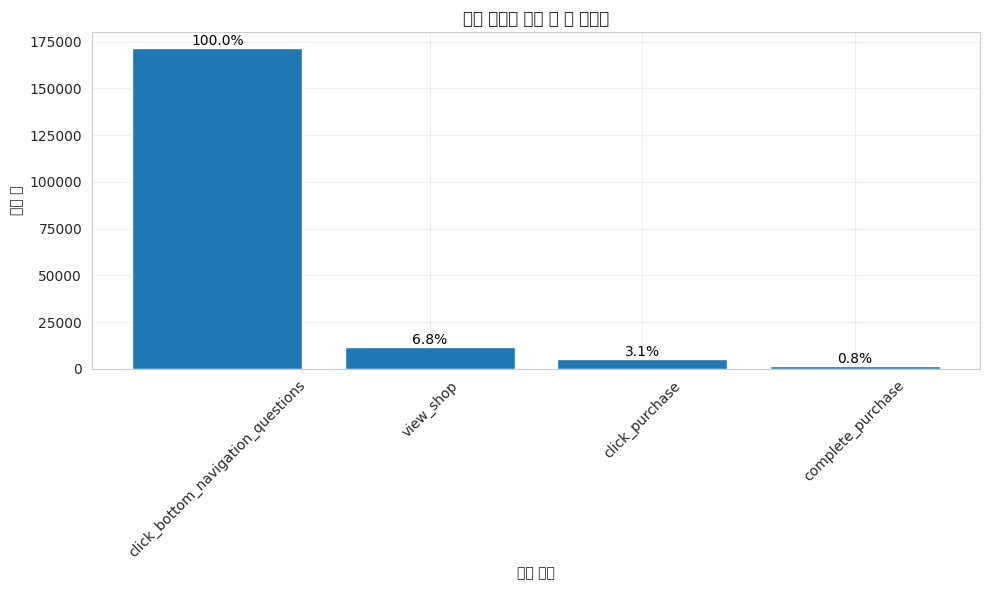

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 그래프 생성
bars = ax1.bar(ordered_funnel_counts['event_key'],       # bars로 받기
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('기능 단계')
ax1.set_ylabel('유저 수')

# 막대 위에 전환율 텍스트 표시
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # bars에 전환율을 병렬로 묶어주기
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar 왼쪽 좌표, get_width() = bar 너비
             bar.get_height(),                           # y 좌표
             f'{rate * 100:.1f}%',                       # text 형태
             ha='center',                                # text 수평 정렬 방식 (가운데 정렬)
             va='bottom',                                # text 수직 정렬 방식 (막대 위)
             fontsize=10,                                # 글자 크기
             color='black')                              # 글자 색상

plt.title('퍼널 단계별 유저 수 및 전환율')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 3. Funnel (출석체크 진입 이후)

```
  3. 출석체크 > 상점 진입 > 상품 클릭 > 결제 완료
```

In [13]:
# 유저 별 특정 시점 이후의 로그만 추출
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'click_attendance'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# 최종 병합
after_click_attendance_log = pd.concat(result_list)

In [14]:
# 주요 이벤트만 필터링
filtered_after_click_attendance_log = after_click_attendance_log[after_click_attendance_log['event_key'].isin([
        'click_attendance',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [15]:
# 각 세션이 어떤 기능(page_name)을 사용했는지 0/1로 표시
funnel_matrix = filtered_after_click_attendance_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# 각 기능별 사용된 세션 수 (0이 아닌 수)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [16]:
# 퍼널 순서
ordered_steps = ['click_attendance', 'view_shop', 'click_purchase', 'complete_purchase']

# 기존 funnel_counts를 해당 순서대로 정렬 (없는 단계는 0으로 채움)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_name을 인덱스로 설정함
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# 전체 첫 단계 세션 수 기준으로 누적 전환율 계산
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

In [17]:
ordered_funnel_counts

,event_key,session_count,conversion_rate
0,click_attendance,47813,1.000
1,view_shop,7149,0.150
2,click_purchase,3731,0.078
3,complete_purchase,847,0.018


/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

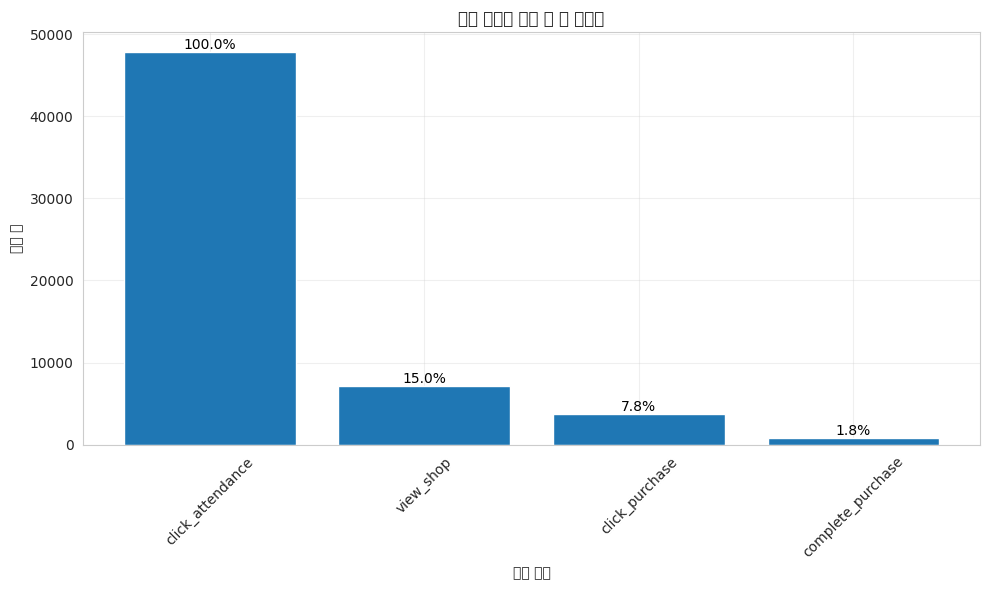

In [18]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 그래프 생성
bars = ax1.bar(ordered_funnel_counts['event_key'],       # bars로 받기
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('기능 단계')
ax1.set_ylabel('유저 수')

# 막대 위에 전환율 텍스트 표시
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # bars에 전환율을 병렬로 묶어주기
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar 왼쪽 좌표, get_width() = bar 너비
             bar.get_height(),                           # y 좌표
             f'{rate * 100:.1f}%',                       # text 형태
             ha='center',                                # text 수평 정렬 방식 (가운데 정렬)
             va='bottom',                                # text 수직 정렬 방식 (막대 위)
             fontsize=10,                                # 글자 크기
             color='black')                              # 글자 색상

plt.title('퍼널 단계별 유저 수 및 전환율')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 4. Funnel (받은 투표 열기 이후)

In [19]:
# 유저 별 특정 시점 이후의 로그만 추출
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'click_question_open'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# 최종 병합
after_click_question_open_log = pd.concat(result_list)

In [20]:
# 주요 이벤트만 필터링
filtered_after_click_question_open_log_log = after_click_question_open_log[after_click_question_open_log['event_key'].isin([
        'click_question_open',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [21]:
# 각 세션이 어떤 기능(page_name)을 사용했는지 0/1로 표시
funnel_matrix = filtered_after_click_question_open_log_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# 각 기능별 사용된 세션 수 (0이 아닌 수)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [22]:
# 퍼널 순서
ordered_steps = ['click_question_open', 'view_shop', 'click_purchase', 'complete_purchase']

# 기존 funnel_counts를 해당 순서대로 정렬 (없는 단계는 0으로 채움)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_name을 인덱스로 설정함
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# 전체 첫 단계 세션 수 기준으로 누적 전환율 계산
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

In [23]:
ordered_funnel_counts

,event_key,session_count,conversion_rate
0,click_question_open,113654,1.000
1,view_shop,11396,0.100
2,click_purchase,3257,0.029
3,complete_purchase,675,0.006


/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

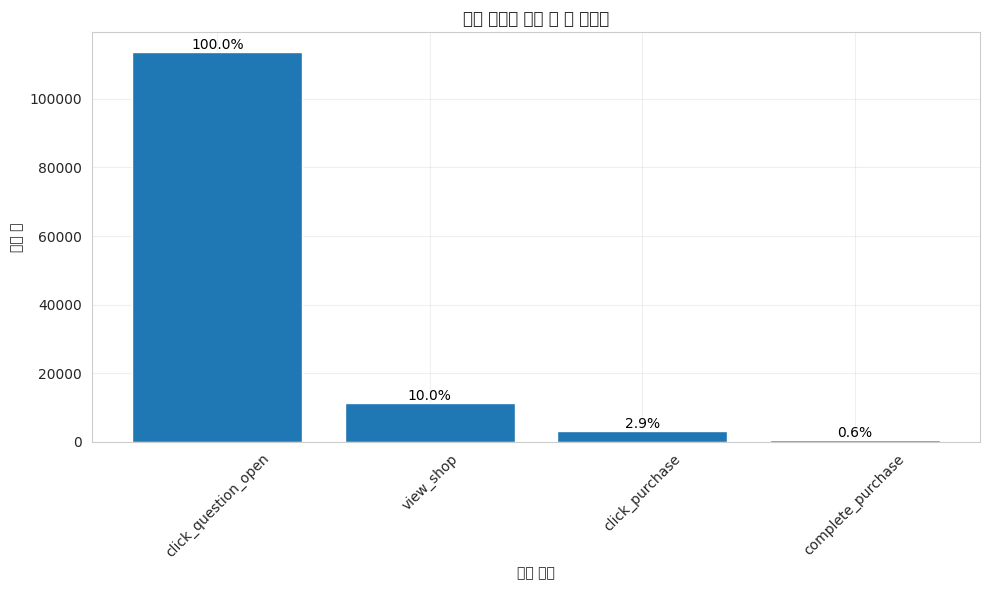

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 그래프 생성
bars = ax1.bar(ordered_funnel_counts['event_key'],       # bars로 받기
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('기능 단계')
ax1.set_ylabel('유저 수')

# 막대 위에 전환율 텍스트 표시
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # bars에 전환율을 병렬로 묶어주기
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar 왼쪽 좌표, get_width() = bar 너비
             bar.get_height(),                           # y 좌표
             f'{rate * 100:.1f}%',                       # text 형태
             ha='center',                                # text 수평 정렬 방식 (가운데 정렬)
             va='bottom',                                # text 수직 정렬 방식 (막대 위)
             fontsize=10,                                # 글자 크기
             color='black')                              # 글자 색상

plt.title('퍼널 단계별 유저 수 및 전환율')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 5. Funnel (타임라인 탭 )

In [25]:
# 유저 별 특정 시점 이후의 로그만 추출
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'view_timeline_tap'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# 최종 병합
after_view_timeline_tap_log = pd.concat(result_list)

In [26]:
# 주요 이벤트만 필터링
filtered_after_view_timeline_tap_log = after_view_timeline_tap_log[after_view_timeline_tap_log['event_key'].isin([
        'view_timeline_tap',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [27]:
filtered_after_view_timeline_tap_log[filtered_after_view_timeline_tap_log['event_key']=='view_timeline_tap']['session_id'].nunique()

166432

In [28]:
# 각 세션이 어떤 기능(page_name)을 사용했는지 0/1로 표시
funnel_matrix = filtered_after_view_timeline_tap_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# 각 기능별 사용된 세션 수 (0이 아닌 수)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [29]:
# 퍼널 순서
ordered_steps = ['view_timeline_tap', 'view_shop', 'click_purchase', 'complete_purchase']

# 기존 funnel_counts를 해당 순서대로 정렬 (없는 단계는 0으로 채움)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_name을 인덱스로 설정함
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# 전체 첫 단계 세션 수 기준으로 누적 전환율 계산
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

In [30]:
ordered_funnel_counts

,event_key,session_count,conversion_rate
0,view_timeline_tap,166432,1.000
1,view_shop,9667,0.058
2,click_purchase,4434,0.027
3,complete_purchase,1186,0.007


/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

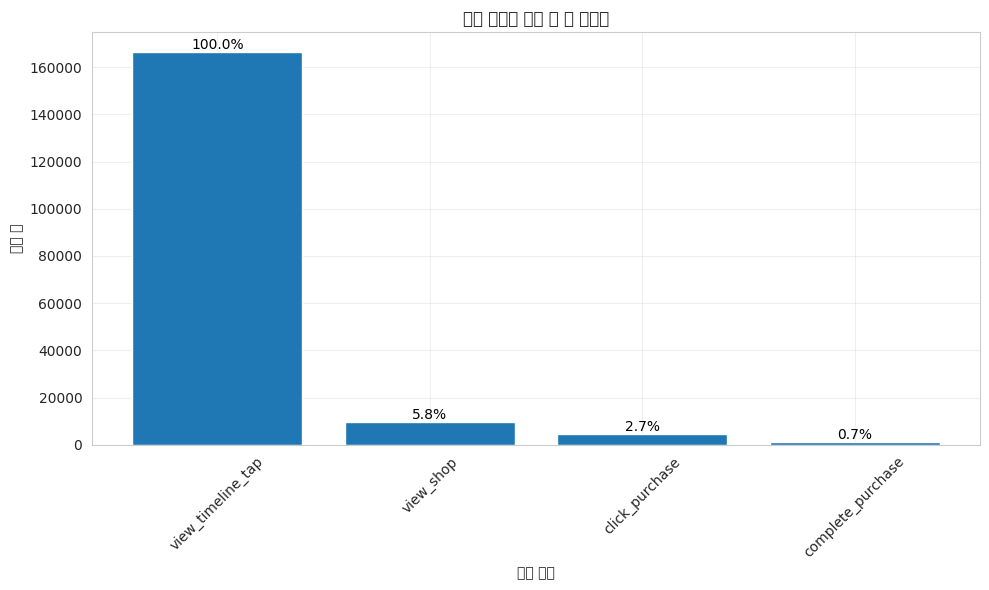

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 그래프 생성
bars = ax1.bar(ordered_funnel_counts['event_key'],       # bars로 받기
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('기능 단계')
ax1.set_ylabel('유저 수')

# 막대 위에 전환율 텍스트 표시
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # bars에 전환율을 병렬로 묶어주기
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar 왼쪽 좌표, get_width() = bar 너비
             bar.get_height(),                           # y 좌표
             f'{rate * 100:.1f}%',                       # text 형태
             ha='center',                                # text 수평 정렬 방식 (가운데 정렬)
             va='bottom',                                # text 수직 정렬 방식 (막대 위)
             fontsize=10,                                # 글자 크기
             color='black')                              # 글자 색상

plt.title('퍼널 단계별 유저 수 및 전환율')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 6. Funnel (투표완료)

In [32]:
# 유저 별 특정 시점 이후의 로그만 추출
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'complete_question'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# 최종 병합
after_view_complete_question_log = pd.concat(result_list)

In [33]:
after_view_complete_question_log

,event_datetime,event_key,session_id,session,item_name
3112073,2023-07-24 11:55:16+09:00,complete_question,00025EE1-BA46-4853-8FDD-B991FABA328F,2,NaN
5889930,2023-07-30 19:39:26+09:00,complete_question,00025EE1-BA46-4853-8FDD-B991FABA328F,3,NaN
5889963,2023-07-30 19:39:33+09:00,click_bottom_navigation_lab,00025EE1-BA46-4853-8FDD-B991FABA328F,3,NaN
5889966,2023-07-30 19:39:33+09:00,view_timeline_tap,00025EE1-BA46-4853-8FDD-B991FABA328F,3,NaN
5889968,2023-07-30 19:39:34+09:00,click_bottom_navigation_profile,00025EE1-BA46-4853-8FDD-B991FABA328F,3,NaN
...,...,...,...,...,...
9023171,2023-08-07 22:52:58+09:00,complete_question,zzp5kLCeZNgz4dbwZaQ2s7Bqrhc2,4,NaN
9023204,2023-08-07 22:53:07+09:00,view_shop,zzp5kLCeZNgz4dbwZaQ2s7Bqrhc2,4,NaN
9023214,2023-08-07 22:53:09+09:00,click_purchase,zzp5kLCeZNgz4dbwZaQ2s7Bqrhc2,4,무료충전소
9023234,2023-08-07 22:53:13+09:00,click_attendance,zzp5kLCeZNgz4dbwZaQ2s7Bqrhc2,4,NaN


In [34]:
# 주요 이벤트만 필터링
filtered_after_view_complete_question_log = after_view_complete_question_log[after_view_complete_question_log['event_key'].isin([
        'complete_question',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [35]:
filtered_after_view_complete_question_log[filtered_after_view_complete_question_log['event_key']=='complete_question']['session_id'].nunique()

49980

In [36]:
# 각 세션이 어떤 기능(page_name)을 사용했는지 0/1로 표시
funnel_matrix = filtered_after_view_complete_question_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# 각 기능별 사용된 세션 수 (0이 아닌 수)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [37]:
# 퍼널 순서
ordered_steps = ['complete_question', 'view_shop', 'click_purchase', 'complete_purchase']

# 기존 funnel_counts를 해당 순서대로 정렬 (없는 단계는 0으로 채움)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_name을 인덱스로 설정함
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# 전체 첫 단계 세션 수 기준으로 누적 전환율 계산
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

In [38]:
ordered_funnel_counts

,event_key,session_count,conversion_rate
0,complete_question,49980,1.000
1,view_shop,5071,0.101
2,click_purchase,2732,0.055
3,complete_purchase,655,0.013


/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

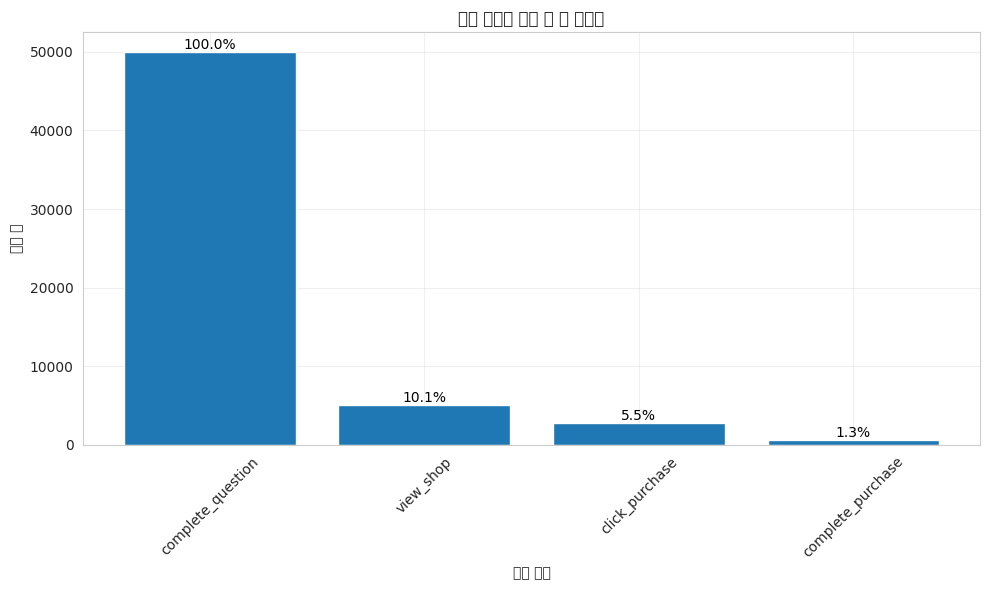

In [39]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 그래프 생성
bars = ax1.bar(ordered_funnel_counts['event_key'],       # bars로 받기
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('기능 단계')
ax1.set_ylabel('유저 수')

# 막대 위에 전환율 텍스트 표시
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # bars에 전환율을 병렬로 묶어주기
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar 왼쪽 좌표, get_width() = bar 너비
             bar.get_height(),                           # y 좌표
             f'{rate * 100:.1f}%',                       # text 형태
             ha='center',                                # text 수평 정렬 방식 (가운데 정렬)
             va='bottom',                                # text 수직 정렬 방식 (막대 위)
             fontsize=10,                                # 글자 크기
             color='black')                              # 글자 색상

plt.title('퍼널 단계별 유저 수 및 전환율')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 7. Funnel (view_questions_tap(또다른 질문탭 진입))

In [40]:
# 유저 별 특정 시점 이후의 로그만 추출
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'view_questions_tap'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# 최종 병합
after_view_questions_tap_log = pd.concat(result_list)

In [41]:
# 주요 이벤트만 필터링
filtered_after_view_questions_tap_log = after_view_questions_tap_log[after_view_questions_tap_log['event_key'].isin([
        'view_questions_tap',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [42]:
filtered_after_view_questions_tap_log[filtered_after_view_questions_tap_log['event_key']=='view_questions_tap']['session_id'].nunique()

107668

In [43]:
# 각 세션이 어떤 기능(page_name)을 사용했는지 0/1로 표시
funnel_matrix = filtered_after_view_questions_tap_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# 각 기능별 사용된 세션 수 (0이 아닌 수)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [44]:
# 퍼널 순서
ordered_steps = ['view_questions_tap', 'view_shop', 'click_purchase', 'complete_purchase']

# 기존 funnel_counts를 해당 순서대로 정렬 (없는 단계는 0으로 채움)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_name을 인덱스로 설정함
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# 전체 첫 단계 세션 수 기준으로 누적 전환율 계산
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

In [45]:
ordered_funnel_counts

,event_key,session_count,conversion_rate
0,view_questions_tap,107668,1.000
1,view_shop,7213,0.067
2,click_purchase,3372,0.031
3,complete_purchase,912,0.008


/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

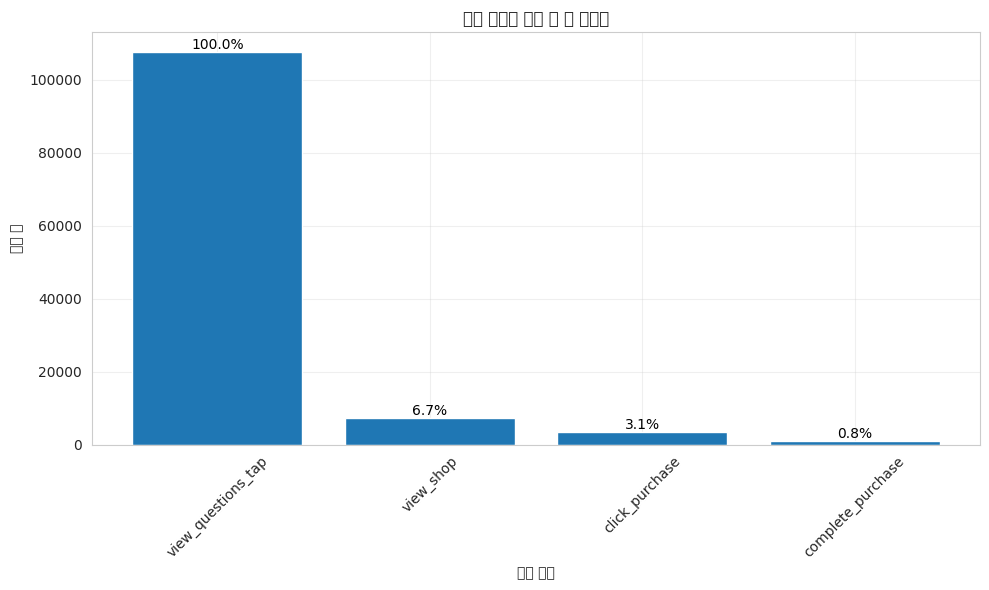

In [46]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 그래프 생성
bars = ax1.bar(ordered_funnel_counts['event_key'],       # bars로 받기
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('기능 단계')
ax1.set_ylabel('유저 수')

# 막대 위에 전환율 텍스트 표시
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # bars에 전환율을 병렬로 묶어주기
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar 왼쪽 좌표, get_width() = bar 너비
             bar.get_height(),                           # y 좌표
             f'{rate * 100:.1f}%',                       # text 형태
             ha='center',                                # text 수평 정렬 방식 (가운데 정렬)
             va='bottom',                                # text 수직 정렬 방식 (막대 위)
             fontsize=10,                                # 글자 크기
             color='black')                              # 글자 색상

plt.title('퍼널 단계별 유저 수 및 전환율')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 8. Funnel (실험실탭진입)


In [47]:
# 유저 별 특정 시점 이후의 로그만 추출
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'view_lab_tap'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# 최종 병합
after_view_lab_tap_log = pd.concat(result_list)

In [48]:
# 주요 이벤트만 필터링
filtered_after_view_lab_tap_log = after_view_lab_tap_log[after_view_lab_tap_log['event_key'].isin([
        'view_lab_tap',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [49]:
filtered_after_view_lab_tap_log[filtered_after_view_lab_tap_log['event_key']=='view_lab_tap']['session_id'].nunique()

177189

In [50]:
# 각 세션이 어떤 기능(page_name)을 사용했는지 0/1로 표시
funnel_matrix = filtered_after_view_lab_tap_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# 각 기능별 사용된 세션 수 (0이 아닌 수)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [51]:
# 퍼널 순서
ordered_steps = ['view_lab_tap', 'view_shop', 'click_purchase', 'complete_purchase']

# 기존 funnel_counts를 해당 순서대로 정렬 (없는 단계는 0으로 채움)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_name을 인덱스로 설정함
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# 전체 첫 단계 세션 수 기준으로 누적 전환율 계산
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

In [52]:
ordered_funnel_counts

,event_key,session_count,conversion_rate
0,view_lab_tap,177189,1.000
1,view_shop,10209,0.058
2,click_purchase,4887,0.028
3,complete_purchase,1321,0.007


/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

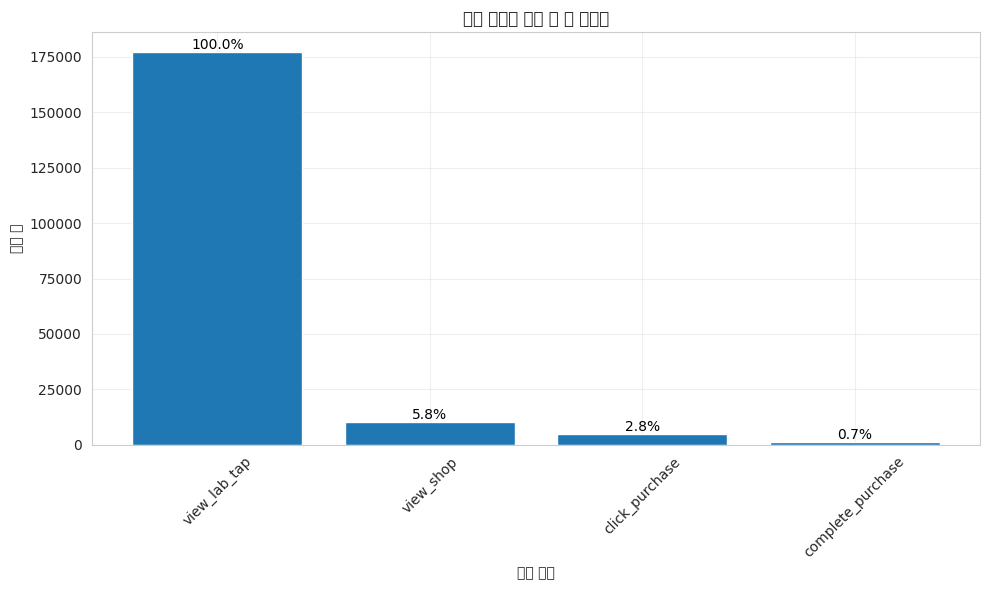

In [53]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 그래프 생성
bars = ax1.bar(ordered_funnel_counts['event_key'],       # bars로 받기
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('기능 단계')
ax1.set_ylabel('유저 수')

# 막대 위에 전환율 텍스트 표시
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # bars에 전환율을 병렬로 묶어주기
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar 왼쪽 좌표, get_width() = bar 너비
             bar.get_height(),                           # y 좌표
             f'{rate * 100:.1f}%',                       # text 형태
             ha='center',                                # text 수평 정렬 방식 (가운데 정렬)
             va='bottom',                                # text 수직 정렬 방식 (막대 위)
             fontsize=10,                                # 글자 크기
             color='black')                              # 글자 색상

plt.title('퍼널 단계별 유저 수 및 전환율')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 9. Funnel (상세알림클릭)

In [54]:
# 유저 별 특정 시점 이후의 로그만 추출
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'click_notice_detail'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# 최종 병합
after_click_notice_detail_log = pd.concat(result_list)

In [55]:
# 주요 이벤트만 필터링
filtered_after_click_notice_detail_log = after_click_notice_detail_log[after_click_notice_detail_log['event_key'].isin([
        'click_notice_detail',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [56]:
filtered_after_click_notice_detail_log[filtered_after_click_notice_detail_log['event_key']=='click_notice_detail']['session_id'].nunique()

95509

In [57]:
# 각 세션이 어떤 기능(page_name)을 사용했는지 0/1로 표시
funnel_matrix = filtered_after_click_notice_detail_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# 각 기능별 사용된 세션 수 (0이 아닌 수)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [58]:
# 퍼널 순서
ordered_steps = ['click_notice_detail', 'view_shop', 'click_purchase', 'complete_purchase']

# 기존 funnel_counts를 해당 순서대로 정렬 (없는 단계는 0으로 채움)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_name을 인덱스로 설정함
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# 전체 첫 단계 세션 수 기준으로 누적 전환율 계산
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

In [59]:
ordered_funnel_counts

,event_key,session_count,conversion_rate
0,click_notice_detail,95509,1.000
1,view_shop,5044,0.053
2,click_purchase,2714,0.028
3,complete_purchase,724,0.008


/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

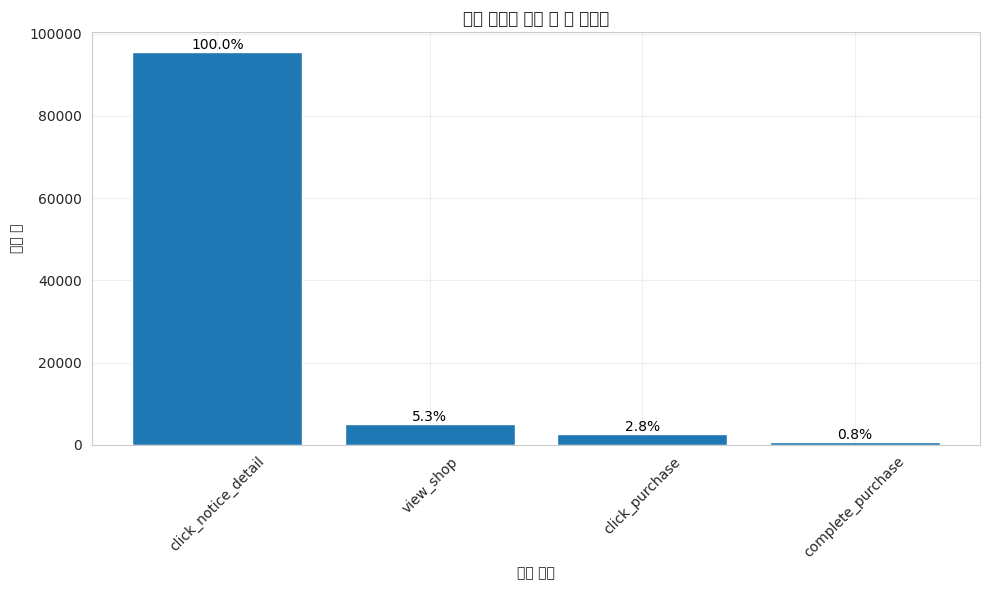

In [60]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 그래프 생성
bars = ax1.bar(ordered_funnel_counts['event_key'],       # bars로 받기
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('기능 단계')
ax1.set_ylabel('유저 수')

# 막대 위에 전환율 텍스트 표시
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # bars에 전환율을 병렬로 묶어주기
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar 왼쪽 좌표, get_width() = bar 너비
             bar.get_height(),                           # y 좌표
             f'{rate * 100:.1f}%',                       # text 형태
             ha='center',                                # text 수평 정렬 방식 (가운데 정렬)
             va='bottom',                                # text 수직 정렬 방식 (막대 위)
             fontsize=10,                                # 글자 크기
             color='black')                              # 글자 색상

plt.title('퍼널 단계별 유저 수 및 전환율')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### 10. Funnel (view_shop)

In [61]:
# 유저 별 특정 시점 이후의 로그만 추출
result_list = []

for session_id, group in events.groupby(['session_id', 'session']):
    click_qustions = group[group['event_key'] == 'view_shop'].index
    if not click_qustions.empty:
        first_idx = click_qustions[0]
        result_list.append(group.loc[first_idx:])

# 최종 병합
after_view_shop_log = pd.concat(result_list)

In [62]:
# 주요 이벤트만 필터링
filtered_after_after_view_shop_log = after_view_shop_log[after_view_shop_log['event_key'].isin([
        'view_timeline_tap',
        'view_shop',
        'click_purchase',
        'complete_purchase'
    ])
]

In [63]:
filtered_after_after_view_shop_log[filtered_after_after_view_shop_log['event_key']=='view_shop']['session_id'].nunique()

17472

In [64]:
# 순서가 꼭 필요할 때 사용

# # 1단계: 탐색을 한 유저
# step1 = event_pivot[event_pivot['탐색'].notna()]

# # 2단계: 탐색도 하고 가이드도 한 유저
# step2 = step1[step1['가이드'].notna()]

# # 3단계: 위 + 지원서 작성까지 한 유저
# step3 = step2[step2['지원서 작성'].notna()]

# # 4단계: 위 + 지원 완료까지 한 유저
# step4 = step3[step3['지원 완료'].notna()]

# # user 수와 전환율 정리
# funnel_counts = {
#     '탐색': len(step1),
#     '가이드': len(step2),
#     '지원서 작성': len(step3),
#     '지원 완료': len(step4),
# }

# funnel_df = pd.DataFrame(list(funnel_counts.items()), columns=['step', 'user_count'])
# funnel_df['conversion_rate'] = funnel_df['user_count'] / funnel_df['user_count'].iloc[0]
# funnel_df


In [65]:
# 각 세션이 어떤 기능(page_name)을 사용했는지 0/1로 표시
funnel_matrix = filtered_after_after_view_shop_log.groupby(['session_id', 'event_key']).size().unstack(fill_value=0)

# 각 기능별 사용된 세션 수 (0이 아닌 수)
funnel_counts = (funnel_matrix > 0).sum().sort_values(ascending=False).reset_index()
funnel_counts.columns = ['event_key', 'user_count']

In [66]:
funnel_matrix

event_key,click_purchase,complete_purchase,view_shop,view_timeline_tap
session_id,,,,
001398E9-BBCE-4F6E-A669-6A9D72C77CE5,1,0,2,1
00199e33-2998-4052-b3b1-21fec14459c4,1,0,2,0
0020D8D8-1ABC-45C9-9C59-9C9F175D530D,0,0,2,2
0027C6BE-3E7F-498E-A678-FDDB719514E5,0,0,2,3
002r3iOqdkTogNK959c80mHZpIz2,0,0,1,4
...,...,...,...,...
zyyDFCFvxiWSgT0BnSqENh9x8zg1,0,0,1,0
zzGb11TvaoMrtQQ3hIrjteIWUJk2,1,0,1,2
zzQmZUCBPWNxsIm6rg0dMisWdpz1,1,1,1,5


In [67]:
funnel_counts

,event_key,user_count
0,view_shop,17472
1,view_timeline_tap,9232
2,click_purchase,6474
3,complete_purchase,1601


In [68]:
# 퍼널 순서
ordered_steps = ['view_shop', 'view_shop', 'click_purchase', 'complete_purchase']

# 기존 funnel_counts를 해당 순서대로 정렬 (없는 단계는 0으로 채움)
ordered_funnel_counts = funnel_counts.set_index('event_key').reindex(ordered_steps).fillna(0).reset_index()

# set_index : page_name을 인덱스로 설정함
# reindex : order


ordered_funnel_counts.columns = ['event_key', 'session_count']

# 전체 첫 단계 세션 수 기준으로 누적 전환율 계산
first_step_count = ordered_funnel_counts['session_count'].iloc[0]
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['session_count'] / first_step_count
ordered_funnel_counts['conversion_rate'] = ordered_funnel_counts['conversion_rate'].round(3)

In [69]:
ordered_funnel_counts

,event_key,session_count,conversion_rate
0,view_shop,17472,1.000
1,view_shop,17472,1.000
2,click_purchase,6474,0.371
3,complete_purchase,1601,0.092


/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-292026322.py:24: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

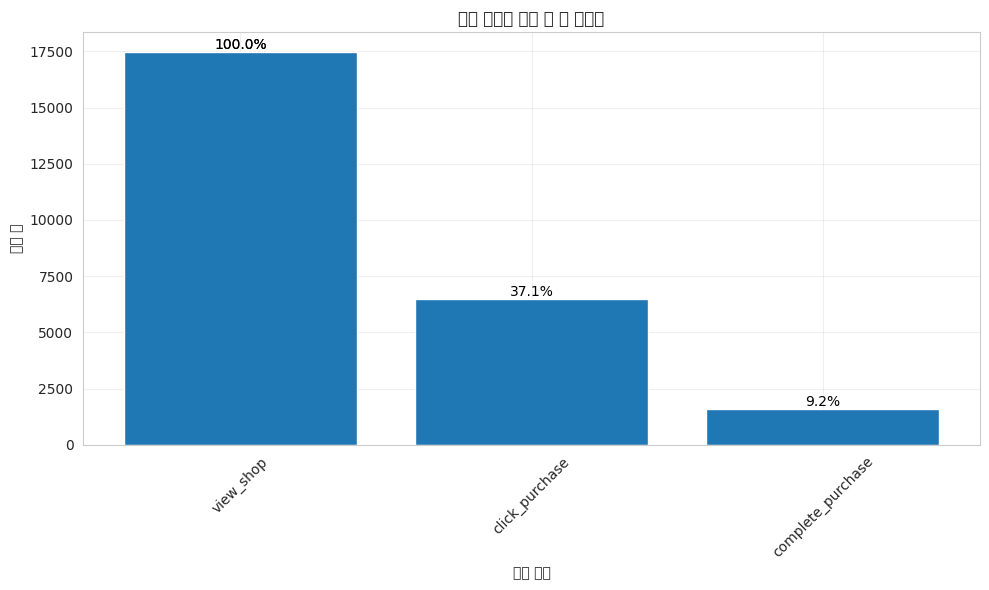

In [70]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 그래프 생성
bars = ax1.bar(ordered_funnel_counts['event_key'],       # bars로 받기
               ordered_funnel_counts['session_count'],
               color='tab:blue')

ax1.set_xlabel('기능 단계')
ax1.set_ylabel('유저 수')

# 막대 위에 전환율 텍스트 표시
for bar, rate in zip(bars, ordered_funnel_counts['conversion_rate']):    # bars에 전환율을 병렬로 묶어주기
    ax1.text(bar.get_x() + bar.get_width() / 2,          # get.x() = bar 왼쪽 좌표, get_width() = bar 너비
             bar.get_height(),                           # y 좌표
             f'{rate * 100:.1f}%',                       # text 형태
             ha='center',                                # text 수평 정렬 방식 (가운데 정렬)
             va='bottom',                                # text 수직 정렬 방식 (막대 위)
             fontsize=10,                                # 글자 크기
             color='black')                              # 글자 색상

plt.title('퍼널 단계별 유저 수 및 전환율')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 2. 학교 분석

## 2-0. 피처 생성

In [3]:
df = pay_predict_model_v1.copy()
au = accounts_user.copy()
ag = accounts_group.copy()
naa = new_attendance.copy()
ap = accounts_paymenthistory.copy()

In [4]:
# 유저 테이블 준비 (유저id, 가입일, 그룹id)
au['created_at'] = pd.to_datetime(au['created_at'].str[:19])
users = au[['id', 'group_id', 'created_at']]
users.columns = ['user_id', 'group_id', 'signup_at']

# 유저 테이블에 학급id, 학교id 추가
ag.reset_index(inplace=True)
ag.columns = ['group_id', 'grade', 'class_num', 'school_id']
users = users.merge(ag[['group_id', 'school_id']], on='group_id', how='left')

# 유저 출석 테이블 준비
usum = naa.merge(users, on='user_id')
usum['attendance_date_list'] = usum['attendance_date_list'].apply(ast.literal_eval)

# 유저별 총 출석일 수
usum['attend_count'] = usum['attendance_date_list'].apply(lambda x: len(x))

# 유저별 생명 주기
usum['parsed_dates'] = usum['attendance_date_list'].apply(pd.to_datetime)
usum['lifecycle_days'] = usum['parsed_dates'].apply(lambda x: (max(x) - min(x)).days if not x.empty else 0)

# 유저 결제 테이블 준비
ap['created_at'] = pd.to_datetime(ap['created_at'].str[:-6])  # 데이터형 변환, 연월('year_month') 컬럼 추가
ap['year_month'] = ap['created_at'].dt.strftime('%y-%m')
ap.sort_values(by='created_at', inplace=True)

point_map = {'heart.777': 777, 'heart.200': 200, 'heart.4000': 4000, 'heart.1000': 1000}  # 충전액 맵핑
ap['charged_points'] = ap['productId'].map(point_map)

# 유저별 총 결제 횟수, 총 충전 포인트
pay_amount = ap.groupby(by='user_id', as_index=False)['charged_points'].sum()
pay_count = ap.groupby(by='user_id', as_index=False).size()
user_pay = pd.merge(pay_amount, pay_count, on='user_id')
user_pay.columns = ['user_id', 'total_paid_points', 'total_pay_counts']

user_pay['total_paid_points'] = user_pay['total_paid_points'].fillna(0)  # 결측치 0으로 채움
user_pay['total_pay_counts'] = user_pay['total_pay_counts'].fillna(0)

# 병합 및 정리
usum = usum.merge(user_pay, on='user_id', how='left')
usum = usum.drop(columns=['attendance_date_list','parsed_dates'])
usum = usum[['user_id', 'attend_count', 'lifecycle_days', 'signup_at', 'group_id', 'school_id', 'total_paid_points', 'total_pay_counts']]

In [5]:
# 유저 피처 데이터에서 집계
df = df.reset_index(names='user_id')
df = df.merge(users[['user_id', 'school_id']], on='user_id', how='inner')

school_mean = df.groupby(by='school_id').agg({
    'friend_count': 'mean',
    'attendance_count': 'mean',
    'is_push_on': 'mean',
    'ques_count': 'mean',
    'vote_count': 'mean',
    'gender_encoded': 'mean',
    'chosen_count': 'mean',
    'question_skip_ratio': 'mean',
    'vote_open_count': 'mean',
    'block_count': 'mean',
    'blocked_count': 'mean',
    'report_count': 'mean',
})

In [ ]:
# 네트워크 지표 집계

# 엣지 리스트 생성(방향성, 가중치 X)
au['friend_id_list'] = au['friend_id_list'].apply(ast.literal_eval)
friend_df = au[['id', 'friend_id_list']].explode('friend_id_list')
friend_df.columns = ['user_id', 'friend_id']
friend_df.dropna(inplace=True)
df_unique = friend_df.apply(lambda row: tuple(sorted([row['user_id'], row['friend_id']])), axis=1).drop_duplicates()

# 유저 학교 매핑
user_school = usum.set_index('user_id')['school_id'].to_dict()

# 학교별로 엣지 분리
school_edges = defaultdict(list)
for u, v in df_unique:
    if u in user_school and v in user_school and user_school[u] == user_school[v]:
        school_id = user_school[u]
        school_edges[school_id].append((u, v))

# 학교별 지표 계산
results = []

for school_id, edges in school_edges.items():               # 학교, 친구쌍
    users = sorted(set([u for e in edges for u in e]))      # 학교별 유저 꺼내 평탄화
    id_map = {uid: i for i, uid in enumerate(users)}        # 유저에 정수 아이디 매핑

    G = nk.graph.Graph(len(users), weighted=False, directed=False)  # 비가중치, 무방향 그래프 생성
    for u, v in edges:
        G.addEdge(id_map[u], id_map[v])                      # 정수 아이디 기반으로 그래프에 엣지 추가

    n = G.numberOfNodes()                                    # 노드 수
    m = G.numberOfEdges()                                    # 엣지 수

    # 평균 clustering coefficient
    cc_algo = LocalClusteringCoefficient(G, turbo=True)
    cc_algo.run()
    scores = cc_algo.scores()
    avg_cc = sum(scores) / len(scores) if scores else 0

    # density
    density = (2 * m) / (n * (n - 1)) if n > 1 else 0

    # modularity
    if n > 1 and m > 0:
        plm = PLM(G, refine=True)
        plm.run()
        partition = plm.getPartition()
        modularity = Modularity().getQuality(partition, G)
    else:
        modularity = 0

    # 종합
    results.append({
        'school_id': school_id,
        'avg_clustering': avg_cc,
        'density': density,
        'modularity': modularity
    })

school_network_df = pd.DataFrame(results)

In [ ]:
# 지표 종합

# 학교 종류
sc = ac.reset_index()
sc.columns = ['school_id', 'address', 'student_count', 'school_type']
sc['school_type'] = sc['school_type'].map({'M': 0, 'H': 1})

# 합치기
school_add = school.drop(columns='mean_atd_days').merge(school_mean.reset_index(), on='school_id')
school_add = school_add.merge(school_network_df, on='school_id')
school_add = school_add.merge(sc[['school_id', 'school_type']], on='school_id')
school_add.loc[:, 'pay_ratio'] = school_add['pay_user_count'] / school_add['user_count']

# 컬럼명, 순서 변경
school_add.columns = ['school_id', 'mean_lifecycle', 'user_count', 'total_pay_amount', 'total_pay_count',
       'pay_user_count', 'mean_friend_count', 'mean_attendance_count', 'mean_is_push_on',
       'mean_ques_count', 'mean_vote_count', 'gender_ratio', 'mean_chosen_count',
       'mean_question_skip_ratio', 'mean_vote_open_count', 'mean_block_count',
       'mean_blocked_count', 'mean_report_count', 'avg_clustering', 'density',
       'modularity', 'school_type', 'pay_ratio']

school_add = school_add[['school_id', 'school_type', 'user_count', 'gender_ratio',                         # 학교 기본 지표
                         'mean_friend_count', 'avg_clustering', 'density', 'modularity',                   # 사회연결망 지표
                         'mean_attendance_count', 'mean_lifecycle',                                        # 리텐션 지표
                         'total_pay_amount', 'total_pay_count', 'pay_user_count', 'pay_ratio',             # 결제 지표
                         'mean_ques_count', 'mean_vote_count', 'mean_chosen_count', 'mean_question_skip_ratio', 'mean_vote_open_count',  # 투표 지표
                         'mean_is_push_on', 'mean_block_count', 'mean_blocked_count', 'mean_report_count'  # 기타 지표
                         ]]

In [ ]:
school_predict_model_v2.to_csv('school_predict_model_v2.csv', index=False)

## 2-1. 활동일수 높은 학교 예측 모델링

In [ ]:
# 데이터 준비
school = school_predict_model_v2.copy()
school = school.drop(columns='inf_num')

# 타겟 변수 정의: 평균 접속일수 >= 7, 평균 결제율 >= 0.1 (75% 분포선 기준)
school.loc[:, 'is_high_attendance'] = school['mean_attendance_count'].apply(lambda x: 1 if x >= 7 else 0)
school.loc[:, 'is_high_pay_ratio'] = school['pay_ratio'].apply(lambda x: 1 if x >= 0.1 else 0)

# 리텐션 모델링 데이터: 평균 접속일수, 평균 생명주기 제거
sc_ret = school.drop(columns=['school_id', 'mean_attendance_count', 'mean_lifecycle', 'is_high_pay_ratio']).copy()

# 결제 모델링 데이터: 총 충전 포인트, 총 결제횟수, 총 결제자수, 결제율 제거
sc_pay = school.drop(columns=['school_id', 'total_pay_amount', 'total_pay_count', 'pay_user_count', 'pay_ratio', 'is_high_attendance']).copy()

### 중복 변수 제거

In [ ]:
# 상관계수 0.95 이상인 쌍 확인
cols = sc_ret.drop(columns=['school_type']).columns
col_pairs = list(combinations(cols, 2))  # combinations: nCm 조합 만들기

for col1, col2 in col_pairs:
		r, p = spearmanr(school[col1], school[col2])
		if r >= 0.95 or r <= -0.95:
		    print(f"{col1}과 {col2}의 상관계수: {r:.3f}")

total_pay_amount과 total_pay_count의 상관계수: 0.991
total_pay_amount과 pay_user_count의 상관계수: 0.972
total_pay_count과 pay_user_count의 상관계수: 0.979
mean_ques_count과 mean_vote_count의 상관계수: 1.000
mean_ques_count과 mean_question_skip_ratio의 상관계수: 1.000
mean_ques_count과 mean_vote_open_count의 상관계수: 1.000
mean_vote_count과 mean_question_skip_ratio의 상관계수: 1.000
mean_vote_count과 mean_vote_open_count의 상관계수: 1.000
mean_question_skip_ratio과 mean_vote_open_count의 상관계수: 1.000
mean_block_count과 mean_blocked_count의 상관계수: 1.000


In [ ]:
# 다중공선성 확인
X = sc_ret.drop(columns=['is_high_attendance'])  # 독립변수만
X = add_constant(X)  # 상수항 추가

# VIF 계산
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

                     feature           VIF
18          mean_block_count           inf
19        mean_blocked_count           inf
0                      const  5.382015e+04
12           mean_ques_count  3.359525e+03
13           mean_vote_count  1.971858e+03
15  mean_question_skip_ratio  1.566474e+02
16      mean_vote_open_count  1.492986e+02
14         mean_chosen_count  5.917888e+01
9            total_pay_count  4.071836e+01
8           total_pay_amount  2.504906e+01
10            pay_user_count  1.824858e+01
2                 user_count  6.654947e+00
7                 modularity  4.933798e+00
6                    density  4.619397e+00
4          mean_friend_count  3.381956e+00
11                 pay_ratio  2.593611e+00
1                school_type  1.420191e+00
5             avg_clustering  1.325295e+00
20         mean_report_count  1.217711e+00
3               gender_ratio  1.172252e+00
17           mean_is_push_on  1.047844e+00


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


- 1차 변수 제거
    - mean_blocked_count: 높은 다중공성, mean_block_count와 중복
    - mean_ques_count, mean_vote_open_count: 높은 다중공성, mean_vote_count와 중복
    - total_pay_amount, pay_user_count: 높은 다중공성, total_pay_count와 중복, total_pay_count이 더 대표성 있는 지표임
    - mean_question_skip_ratio: 높은 다중공성, mean_vote_open_count와 중복, mean_vote_open_count가 더 대표성 있는 지표임

In [ ]:
# 1차 변수 제거
sc_ret_v2 = sc_ret.drop(columns=['mean_blocked_count', 'mean_ques_count', 'mean_vote_open_count', 'total_pay_amount', 'pay_user_count', 'mean_question_skip_ratio'])

# 다중공선성 확인
X = sc_ret_v2.drop(columns=['is_high_attendance'])  # 독립변수만
X = add_constant(X)  # 상수항 추가

# VIF 계산
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

              feature         VIF
0               const  230.683950
11  mean_chosen_count   47.228622
10    mean_vote_count   46.995824
2          user_count    5.158029
7          modularity    4.930725
6             density    4.617358
4   mean_friend_count    3.350295
8     total_pay_count    2.998278
9           pay_ratio    2.330326
1         school_type    1.411068
5      avg_clustering    1.324846
14  mean_report_count    1.216756
3        gender_ratio    1.162567
13   mean_block_count    1.082771
12    mean_is_push_on    1.047061


- 2차 변수 제거
    - mean_blocked_count: mean_vote_open_count이 더 대표성 있는 지표임

In [ ]:
# 2차 변수 제거
sc_ret_v3 = sc_ret_v2.drop(columns=['mean_chosen_count'])

# 다중공선성 확인
X = sc_ret_v3.drop(columns=['is_high_attendance'])  # 독립변수만
X = add_constant(X)  # 상수항 추가

# VIF 계산
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

# VIF 10 이상 변수 없음 확인

              feature         VIF
0               const  230.679212
2          user_count    5.138157
7          modularity    4.930685
6             density    4.617002
4   mean_friend_count    3.348480
8     total_pay_count    2.997850
9           pay_ratio    2.329252
1         school_type    1.406327
5      avg_clustering    1.324846
13  mean_report_count    1.216436
3        gender_ratio    1.161897
12   mean_block_count    1.082701
10    mean_vote_count    1.054830
11    mean_is_push_on    1.047060


### 변수별 회귀계수 및 p값 확인

In [ ]:
X = sc_ret_v3.drop(columns=['is_high_attendance'])
y = sc_ret_v3['is_high_attendance']

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 컬럼명 추가
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 상수항 추가
X_scaled_df = sm.add_constant(X_scaled_df)

# 로지스틱 회귀 모델 학습
model = sm.Logit(y, X_scaled_df).fit()

# 결과 출력
print(model.summary())

         Current function value: 0.422697
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:     is_high_attendance   No. Observations:                 5267
Model:                          Logit   Df Residuals:                     5253
Method:                           MLE   Df Model:                           13
Date:                Wed, 06 Aug 2025   Pseudo R-squ.:                  0.2308
Time:                        13:30:51   Log-Likelihood:                -2226.3
converged:                      False   LL-Null:                       -2894.4
Covariance Type:            nonrobust   LLR p-value:                9.325e-278
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5290     40.271     -0.038      0.970     -80.459      77.402
school_type          -0.5297      0.048    -

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# 회귀 결과 요약 테이블
summary_table = model.summary2().tables[1]

# p-value < 0.05인 변수만 필터링
insignificant_vars = summary_table[summary_table['P>|z|'] < 0.05]

# 오즈비 계산 및 출력
for var, row in insignificant_vars.iterrows():
    coef = row['Coef.']
    odds_ratio = np.exp(coef)
    print(f"{var:25s} | p = {row['P>|z|']:.4f} | OR = {odds_ratio:.4f}")

school_type               | p = 0.0000 | OR = 0.5888
user_count                | p = 0.0000 | OR = 0.5068
mean_friend_count         | p = 0.0000 | OR = 2.5791
avg_clustering            | p = 0.0002 | OR = 1.4009
modularity                | p = 0.0336 | OR = 1.2063
total_pay_count           | p = 0.0000 | OR = 1.4117
pay_ratio                 | p = 0.0000 | OR = 1.6543
mean_block_count          | p = 0.0000 | OR = 1.2101
mean_report_count         | p = 0.0004 | OR = 1.1382


- **평균 친구 수, 평균 clustering coefficient, modularity, 총 결제 횟수, 결제율, 평균 차단 횟수, 평균 신고 당한 횟수**는 **높은 접속일수 그룹**에 속할 확률에 유의미한 **양의 영향**을 끼치는 것으로 나타났다.
    - 특히 **평균 친구 수**는 **오즈비 2.61**로 평균 친구 수 1 증가 시 높은 접속일수 그룹에 속할 오즈가 2.61배 증가하는 것으로 해석된다.
- 반면, **학교 종류와 학생 수**는 **높은 접속일수**에 **음의 영향**을 끼치는 것으로 나타났다.

### 베이스라인 모델 (로지스틱 회귀 모델)

In [ ]:
# 1. 독립변수와 종속변수 분리
X = sc_ret_v3.drop(columns=['is_high_attendance'])  # 독립변수만
y = sc_ret_v3['is_high_attendance']

# 2. train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. 스케일링 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# 6. 결과 출력
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       802
           1       0.58      0.33      0.42       252

    accuracy                           0.78      1054
   macro avg       0.70      0.63      0.64      1054
weighted avg       0.76      0.78      0.76      1054

ROC AUC Score: 0.810567826465582


### 샘플링 및 2차 모델링 (로지스틱 회귀 모델)

SMOTE 방식이 평균 ROC AUC 점수가 높고 과적합 위험이 작은 안정적인 모델이므로, SMOTE 샘플링 방법 선택

In [ ]:
# 독립변수와 종속변수 나누기
X = sc_ret_v3.drop(columns=['is_high_attendance'])
y = sc_ret_v3['is_high_attendance']

# SMOTE 오버샘플링 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 결과 확인
print("Before sampling:", Counter(y))
print("After MOTE oversampling:", Counter(y_resampled))

Before sampling: Counter({0: 4010, 1: 1257})
After MOTE oversampling: Counter({0: 4010, 1: 4010})


In [ ]:
# 모델링

# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 스케일링 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 생성 및 학습
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# 예측
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]  # 양성 클래스 확률

# 분류 리포트
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC AUC
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

# 혼동 행렬
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       802
           1       0.76      0.81      0.78       802

    accuracy                           0.77      1604
   macro avg       0.78      0.77      0.77      1604
weighted avg       0.78      0.77      0.77      1604

ROC AUC Score: 0.8484073482130087
Confusion Matrix:
 [[591 211]
 [150 652]]


### 3차 모델링 (랜덤 포레스트 분류 모델)

In [ ]:
# 모델 생성 및 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# 결과 출력
print("[Random Forest] Classification Report:\n", classification_report(y_test, y_pred_rf))
print("[Random Forest] ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))
print("[Random Forest] Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

[Random Forest] Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       802
           1       0.84      0.91      0.87       802

    accuracy                           0.87      1604
   macro avg       0.87      0.87      0.87      1604
weighted avg       0.87      0.87      0.87      1604

[Random Forest] ROC AUC Score: 0.943096591439108
[Random Forest] Confusion Matrix:
 [[661 141]
 [ 72 730]]


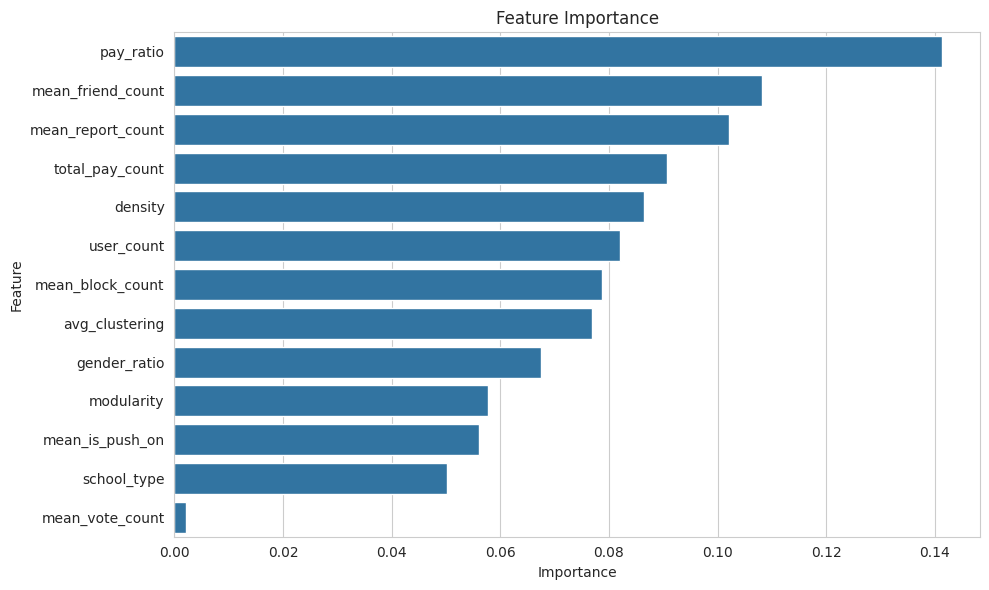

In [ ]:
# 변수 중요도
importances = rf.feature_importances_
feature_names = X_train.columns

# 데이터프레임으로 정리
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
feat_imp

,Feature,Importance
8,pay_ratio,0.141249
3,mean_friend_count,0.108212
12,mean_report_count,0.102154
7,total_pay_count,0.090720
5,density,0.086430
1,user_count,0.081989
11,mean_block_count,0.078701
4,avg_clustering,0.076914
2,gender_ratio,0.067416
6,modularity,0.057731


- 높은 접속 일수 학교를 예측하기 위해, SMOT 샘플링 후 랜덤포레스트 모델링을 진행했다.
- 모델은 accuracy 0.87, ROC AUC score 0.94의 의 높은 성능을 보였다.
- **높은 접속 일수의 학교**를 예측할 때, **결제율, 평균 친구 수, 신고 당한 횟수, 총 결제 횟수, density**가 주요 예측 변수인 것으로 나타남

## 2-2. 결제율 높은 학교 예측 모델링

### 중복 변수 제거

In [ ]:
# 상관계수 0.95 이상인 쌍 확인
cols = sc_pay.drop(columns=['school_type']).columns
col_pairs = list(combinations(cols, 2))  # combinations: nCm 조합 만들기

for col1, col2 in col_pairs:
		r, p = spearmanr(school[col1], school[col2])
		if r >= 0.95 or r <= -0.95:
		    print(f"{col1}과 {col2}의 상관계수: {r:.3f}")

mean_ques_count과 mean_vote_count의 상관계수: 1.000
mean_ques_count과 mean_question_skip_ratio의 상관계수: 1.000
mean_ques_count과 mean_vote_open_count의 상관계수: 1.000
mean_vote_count과 mean_question_skip_ratio의 상관계수: 1.000
mean_vote_count과 mean_vote_open_count의 상관계수: 1.000
mean_question_skip_ratio과 mean_vote_open_count의 상관계수: 1.000
mean_block_count과 mean_blocked_count의 상관계수: 1.000


In [ ]:
# 다중공선성 확인
X = sc_pay.drop(columns=['is_high_pay_ratio'])  # 독립변수만
X = add_constant(X)  # 상수항 추가

# VIF 계산
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

                     feature           VIF
16          mean_block_count           inf
17        mean_blocked_count           inf
0                      const  5.383060e+04
10           mean_ques_count  3.361391e+03
11           mean_vote_count  1.976759e+03
13  mean_question_skip_ratio  1.567770e+02
14      mean_vote_open_count  1.479424e+02
12         mean_chosen_count  5.889649e+01
7                 modularity  4.956932e+00
6                    density  4.632440e+00
2                 user_count  4.186821e+00
4          mean_friend_count  3.935913e+00
8      mean_attendance_count  3.457056e+00
9             mean_lifecycle  2.355046e+00
5             avg_clustering  1.348840e+00
1                school_type  1.263410e+00
18         mean_report_count  1.221772e+00
3               gender_ratio  1.135375e+00
15           mean_is_push_on  1.044231e+00


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
# 1차 변수 제거

# 상관계수 높은 변수 제거 ('mean_blocked_count', 'mean_ques_count', 'mean_vote_count', 'mean_question_skip_ratio')
sc_pay_v2 = sc_pay.drop(columns=['mean_blocked_count', 'mean_ques_count', 'mean_vote_open_count', 'mean_question_skip_ratio'])

# 다중공선성 확인
X = sc_pay_v2.drop(columns=['is_high_pay_ratio'])  # 독립변수만
X = add_constant(X)  # 상수항 추가

# VIF 계산
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

                  feature         VIF
0                   const  227.811345
10        mean_vote_count   47.555380
11      mean_chosen_count   47.345924
7              modularity    4.952848
6                 density    4.630854
2              user_count    4.157637
4       mean_friend_count    3.918429
8   mean_attendance_count    3.437739
9          mean_lifecycle    2.350939
5          avg_clustering    1.348714
1             school_type    1.261802
14      mean_report_count    1.220833
3            gender_ratio    1.134889
13       mean_block_count    1.085108
12        mean_is_push_on    1.044166


In [ ]:
# 2차 제거(mean_chosen_count): mean_vote_open_count이 더 대표성 있는 지표임
sc_pay_v3 = sc_pay_v2.drop(columns=['mean_chosen_count'])

# 다중공선성 확인
X = sc_pay_v3.drop(columns=['is_high_pay_ratio'])  # 독립변수만
X = add_constant(X)  # 상수항 추가

# VIF 계산
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))

                  feature         VIF
0                   const  227.811328
7              modularity    4.952847
6                 density    4.630820
2              user_count    4.144035
4       mean_friend_count    3.918241
8   mean_attendance_count    3.424892
9          mean_lifecycle    2.346259
5          avg_clustering    1.348711
1             school_type    1.257886
10        mean_vote_count    1.235431
13      mean_report_count    1.220476
3            gender_ratio    1.134643
12       mean_block_count    1.085060
11        mean_is_push_on    1.044163


### 변수별 회귀계수 및 p값 확인

In [ ]:
X = sc_pay_v3.drop(columns=['is_high_pay_ratio'])
y = sc_pay_v3['is_high_pay_ratio']

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 컬럼명 추가
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 상수항 추가
X_scaled_df = sm.add_constant(X_scaled_df)

# 로지스틱 회귀 모델 학습
model = sm.Logit(y, X_scaled_df).fit()

# 결과 출력
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.457062
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      is_high_pay_ratio   No. Observations:                 5267
Model:                          Logit   Df Residuals:                     5253
Method:                           MLE   Df Model:                           13
Date:                Wed, 06 Aug 2025   Pseudo R-squ.:                  0.2629
Time:                        13:30:55   Log-Likelihood:                -2407.3
converged:                       True   LL-Null:                       -3265.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.1887      0.042    -28.396      0.000      -1.271      -1.

In [ ]:
# 회귀 결과 요약 테이블
summary_table = model.summary2().tables[1]

# p-value < 0.05인 변수만 필터링
insignificant_vars = summary_table[summary_table['P>|z|'] < 0.05]

# 오즈비 계산 및 출력
for var, row in insignificant_vars.iterrows():
    coef = row['Coef.']
    odds_ratio = np.exp(coef)
    print(f"{var:25s} | p = {row['P>|z|']:.4f} | OR = {odds_ratio:.4f}")

const                     | p = 0.0000 | OR = 0.3046
school_type               | p = 0.0000 | OR = 2.4659
gender_ratio              | p = 0.0000 | OR = 1.8223
mean_friend_count         | p = 0.0000 | OR = 1.6048
avg_clustering            | p = 0.0017 | OR = 1.1835
density                   | p = 0.0000 | OR = 1.6004
mean_attendance_count     | p = 0.0000 | OR = 2.5919
mean_lifecycle            | p = 0.0001 | OR = 0.7843
mean_vote_count           | p = 0.0000 | OR = 0.8180
mean_is_push_on           | p = 0.0000 | OR = 1.3321
mean_block_count          | p = 0.0011 | OR = 1.1181


- **학교 종류, 성비, 평균 친구 수, 평균 clustering coefficient, density, 평균 출석 일수, 평균 알림 ON 비율, 평균 차단한 횟수**는  **높은 결제율 그룹**에 속할 확률에 유의미한 **양의 영향**을 끼치는 것으로 나타났다.
    - 특히 **학교 종류**는 **오즈비 2.52**로 **고등학교일 때** 높은 결제율 그룹에 속할 오즈가 2.52배 증가하는 것으로 해석된다.
    - 또 **평균 접속 일수**는 **오즈비 2.03**으로 평균 접속 일수가 1일 증가할 때 높은 결제율 그룹에 속할 오즈가 2.03배 증가하는 것으로 해석된다.
- 반면, **평균 유저 생명주기 및 평균 투표 열람 횟수**는 **높은 결제율 그룹**에 속할 확률에 유의미한 **음의 영향**을 끼치는 것으로 나타났다.

### 베이스라인 모델 (로지스틱 회귀 모델)

In [ ]:
# 1. 독립변수와 종속변수 분리
X = sc_pay_v3.drop(columns=['is_high_pay_ratio'])  # 독립변수만
y = sc_pay_v3['is_high_pay_ratio']

# 2. train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. 스케일링 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# 6. 결과 출력
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       726
           1       0.76      0.56      0.64       328

    accuracy                           0.81      1054
   macro avg       0.79      0.74      0.75      1054
weighted avg       0.80      0.81      0.80      1054

ROC AUC Score: 0.8728079016327354


### 샘플링 및 2차 모델링 (로지스틱 회귀 모델)

SMOTE 방식이 평균 ROC AUC 점수가 높고 과적합 위험이 작은 안정적인 모델이므로, SMOTE 샘플링 방법 선택

In [ ]:
# 독립변수와 종속변수 나누기
X = sc_pay_v3.drop(columns=['is_high_pay_ratio'])
y = sc_pay_v3['is_high_pay_ratio']

# SMOTE 오버샘플링 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 결과 확인
print("Before sampling:", Counter(y))
print("After MOTE oversampling:", Counter(y_resampled))

Before sampling: Counter({0: 3628, 1: 1639})
After MOTE oversampling: Counter({0: 3628, 1: 3628})


In [ ]:
# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 스케일링 (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 생성 및 학습
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# 예측
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]  # 양성 클래스 확률

# 분류 리포트
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC AUC
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

# 혼동 행렬
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       726
           1       0.76      0.76      0.76       726

    accuracy                           0.76      1452
   macro avg       0.76      0.76      0.76      1452
weighted avg       0.76      0.76      0.76      1452

ROC AUC Score: 0.8325971966092177
Confusion Matrix:
 [[548 178]
 [173 553]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3차 모델링 (랜덤 포레스트 분류 모델)

In [ ]:
# 모델 생성 및 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# 결과 출력
print("[Random Forest] Classification Report:\n", classification_report(y_test, y_pred_rf))
print("[Random Forest] ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))
print("[Random Forest] Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

[Random Forest] Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       726
           1       0.83      0.86      0.85       726

    accuracy                           0.85      1452
   macro avg       0.85      0.85      0.85      1452
weighted avg       0.85      0.85      0.85      1452

[Random Forest] ROC AUC Score: 0.9176617793259415
[Random Forest] Confusion Matrix:
 [[602 124]
 [100 626]]


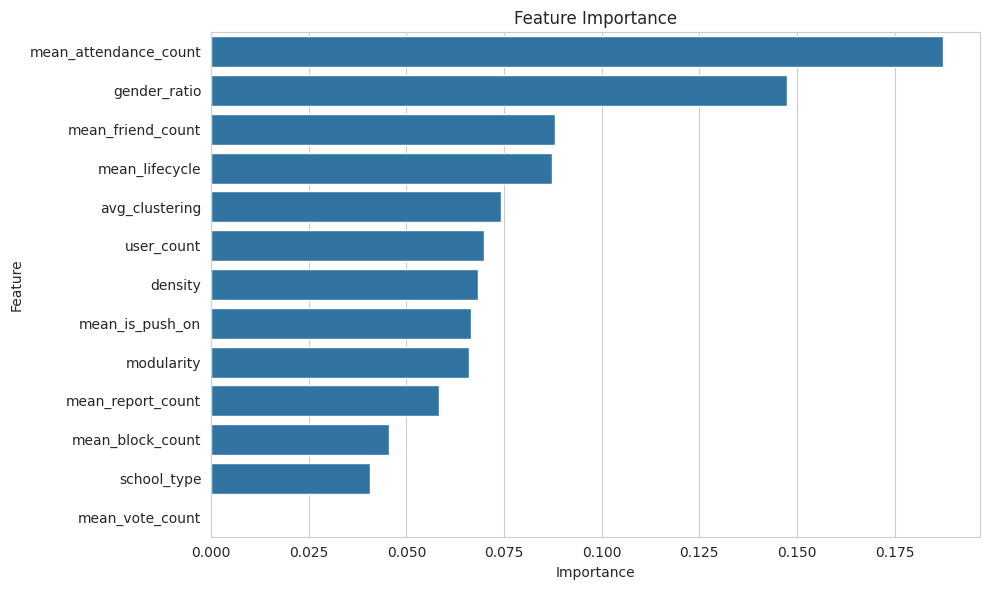

In [ ]:
# 변수 중요도
importances = rf.feature_importances_
feature_names = X_train.columns

# 데이터프레임으로 정리
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
feat_imp

,Feature,Importance
7,mean_attendance_count,0.187458
2,gender_ratio,0.147455
3,mean_friend_count,0.087985
8,mean_lifecycle,0.087370
4,avg_clustering,0.074187
1,user_count,0.069834
5,density,0.068247
10,mean_is_push_on,0.066616
6,modularity,0.066055
12,mean_report_count,0.058335


- 높은 결제율의 학교를 예측하기 위해, SMOT 샘플링 후 랜덤포레스트 모델링을 진행했다.
- 모델은 accuracy 0.85, ROC AUC score 0.91의 의 높은 성능을 보였다.
- **높은 결제율의 학교를 예측**할 때, **평균 접속 일수, 성비, 평균 친구 수, 평균 유저 생명주기, 평균 clustering coefficient**가 주요 예측 변수인 것으로 나타났다

# 3. 유저의 네트워크 내 영향력 분석

## 3-1. 결제 및 투표 전염성

### 3-1-1. 결제 전염성

In [ ]:
accountsuser = accounts_user.copy()

In [ ]:
payment_history = accounts_paymenthistory.copy()

In [ ]:
# accounts_user 테이블에 결제 여부에 대한 컬럼 생성

# payment_history 테이블의 user_id 고유값 추출
paid_user_ids = payment_history['user_id'].unique()

# accounts_user 테이블에 'pay_or_not' 컬럼 추가
accountsuser['pay_or_not'] = accountsuser['id'].isin(paid_user_ids).astype(int)

In [ ]:
# 친구 수 리스트 형태
# 변환
import ast

accountsuser['friend_id_list'] = accountsuser['friend_id_list'].apply(ast.literal_eval)

#### 결제 유저의 연결 특성 분석

- 결제 유저 vs 비결제 유저의 평균 친구 수 비교

- 결제 유저의 친구 중 결제 유저 비율 (초기 전염 분석 가능)

- 이 단계의 핵심 목적
- 유저 간 **“관계 구조”**를 파악하여, 이후 감염 경로 추적, 전염률 분석이 가능한 기반을 만드는 것

- 친구 수 많은 유저, 네트워크 허브 역할 유저, 클러스터 내 결제 집중 여부 등을 선별 가능

In [ ]:
# friend_id_list 길이 계산하여 friend_count 컬럼 생성하여 저장
accountsuser['friend_count'] = accountsuser['friend_id_list'].apply(len)

/tmp/ipython-input-3684512932.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Oranges')  # 컬러맵: 빨→노 계열
/tmp/ipython-input-3684512932.py:30: UserWarning: Glyph 52828 (\N{HANGUL SYLLABLE CIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3684512932.py:30: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3684512932.py:30: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3684512932.py:30: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3684512932.py:30: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  p

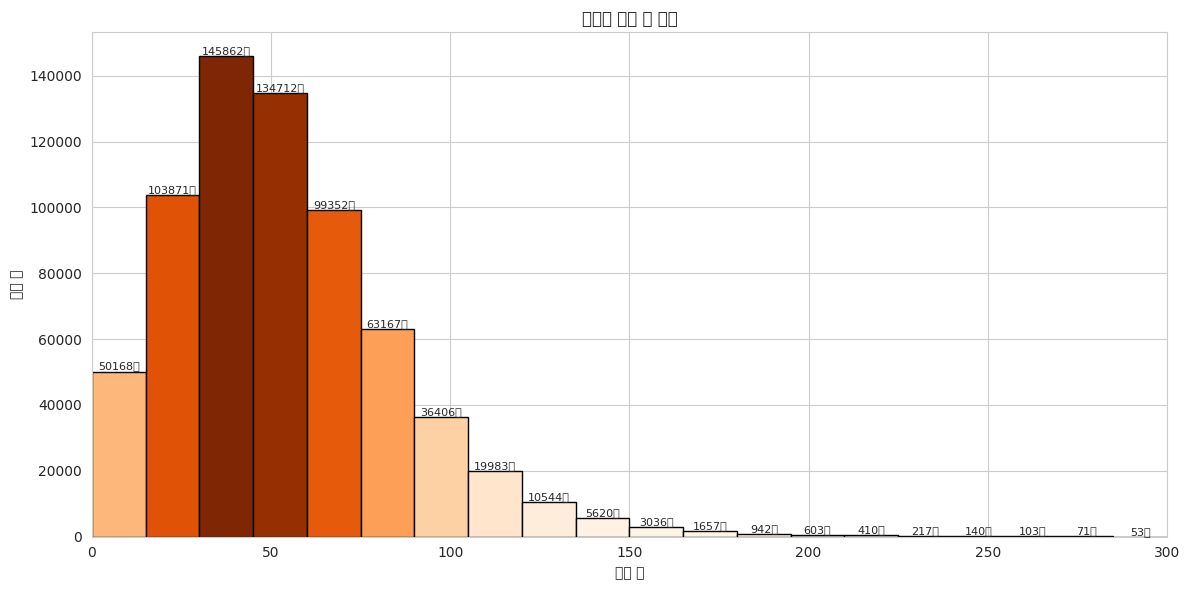

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 300 이하만 필터링
filtered = accountsuser[accountsuser['friend_count'] <= 300]['friend_count']

# 2. 히스토그램 생성 (빈도 수 확인용)
plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(filtered, bins=20, edgecolor='black')

# 3. 그라데이션 색상 적용 (노란색 → 주황색 → 빨강색)
from matplotlib import cm
norm = plt.Normalize(vmin=min(counts), vmax=max(counts))  # 빈도 수 기준 정규화
cmap = cm.get_cmap('Oranges')  # 컬러맵: 빨→노 계열

for patch, count in zip(patches, counts):
    patch.set_facecolor(cmap(norm(count)))

# 4. 막대 위에 수치 (가로 방향)
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    if count > 0:
        bin_center = (bin_left + bin_right) / 2
        plt.text(bin_center, count, f'{int(count)}명', ha='center', va='bottom', fontsize=8, rotation=0)

# 5. 스타일 마무리
plt.title("유저별 친구 수 분포")
plt.xlabel("친구 수")
plt.ylabel("유저 수")
plt.xlim(0, 300)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3640226039.py:7: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3640226039.py:7: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3640226039.py:7: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3640226039.py:7: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3640226039.py:7: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3640226039.py:7: UserWarning: Glyph 52828 (\N{HANGUL SYLLABLE CIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3640226039.py:7: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipy

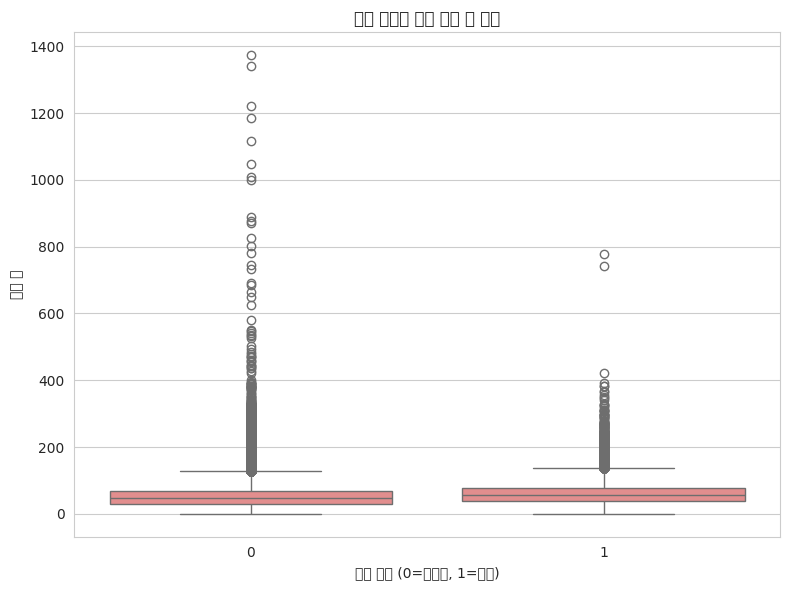

In [ ]:
# 박스 플롯 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(data=accountsuser, x='pay_or_not', y='friend_count', color='lightcoral')
plt.xlabel('결제 여부 (0=미결제, 1=결제)')
plt.ylabel('친구 수')
plt.title('결제 여부에 따른 친구 수 분포')
plt.tight_layout()
plt.show()

- 단순히 친구가 많을수록, 결제를 많이하는 것은 아님.
- 큰 차이가 없어보임.

In [ ]:
# 유저별 친구리스트 중에 결제 이력이 있는 친구의 수
# 새로운 컬럼 생성

paid_user_ids_set = set(paid_user_ids)

def count_paid_friends(friend_list):
    return sum(1 for fid in friend_list if fid in paid_user_ids_set)

accountsuser['pay_friend_count'] = accountsuser['friend_id_list'].apply(count_paid_friends)

In [ ]:
accountsuser.groupby('pay_or_not')['pay_friend_count'].mean()

,pay_friend_count
pay_or_not,
0,5.108973
1,8.598446


- 결제기록이 없는 유저
    - 친구 중 결제 이력이 있는 평균 친구 수는 약 5.11명
- 결제기록이 있는 유저
    - 친구 중 결제 이력이 있는 평균 친구 수는 약 8.60명
- 약 3.49명 차이 남.

/tmp/ipython-input-534070310.py:7: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-534070310.py:7: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-534070310.py:7: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-534070310.py:7: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-534070310.py:7: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-534070310.py:7: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-534070310.py:7: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-i

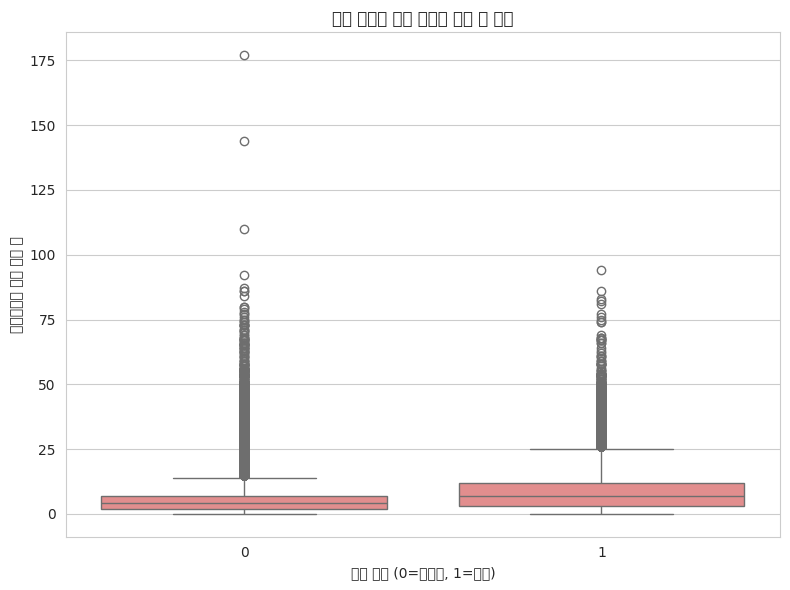

In [ ]:
# 박스 플롯 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(data=accountsuser, x='pay_or_not', y='pay_friend_count', color='lightcoral')
plt.xlabel('결제 여부 (0=미결제, 1=결제)')
plt.ylabel('결제이력이 있는 친구 수')
plt.title('결제 여부에 따른 결제한 친구 수 분포')
plt.tight_layout()
plt.show()

In [ ]:
# 친구 수 대비 결제 친구 비율

# 결제한 친구 비율
accountsuser['pay_friend_ratio'] = accountsuser['pay_friend_count'] / accountsuser['friend_count']

# 무한대/NaN 방지 (친구가 0명인 경우)
accountsuser['pay_friend_ratio'] = accountsuser['pay_friend_ratio'].fillna(0)

# 결과 확인
accountsuser[['id', 'friend_count', 'pay_friend_count', 'pay_friend_ratio']].head()

,id,friend_count,pay_friend_count,pay_friend_ratio
0,831956,6,1,0.166667
1,831962,43,6,0.139535
2,832151,51,8,0.156863
3,832340,57,7,0.122807
4,832520,18,5,0.277778


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


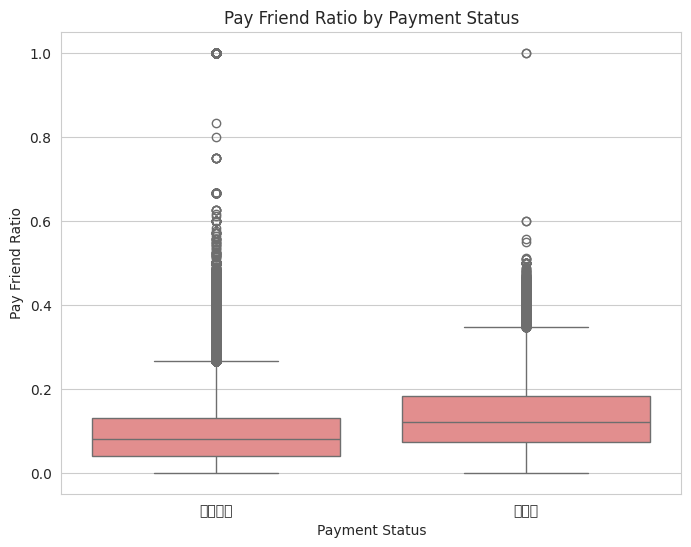

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='pay_or_not', y='pay_friend_ratio', data=accountsuser, color='lightcoral')
plt.xticks([0, 1], ['비결제자', '결제자'])
plt.title('Pay Friend Ratio by Payment Status')
plt.xlabel('Payment Status')
plt.ylabel('Pay Friend Ratio')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

group_0 = accountsuser[accountsuser['pay_or_not'] == 0]['pay_friend_ratio']
group_1 = accountsuser[accountsuser['pay_or_not'] == 1]['pay_friend_ratio']

t_stat, p_val = ttest_ind(group_0, group_1, equal_var=False)
print(f'p-value: {p_val:.3f}')

p-value: 0.000


In [ ]:
# 회귀 분석

features = accountsuser[['pay_friend_ratio']]
target = accountsuser['pay_or_not']

model = LogisticRegression()
model.fit(features, target)

print("coef:", model.coef_)

coef: [[5.86324786]]


- 친구대비 결제 친구의 비율 지표도 통계적으로 유의미함.
- 회귀계수도 5.863 정도로 이 값은 독립변수가 1단위 증가할 때,
- 결과(예: 결제할 확률)의 로그 오즈(log-odds)가 약 5.86만큼 증가한다는 뜻입니다.
- 굉장히 강한 영향력을 나타냅니다.

#### 시간흐름에 따른 전염 효과 분석

- 특정 유저가 결제한 직후, 친구들이 며칠 이내에 결제하는가?
- 친구 중 결제한 날짜가 index 유저 결제 후 ±n일 안에 몰려 있는지 확인
- 인사이트: 결제 유도 시기 타이밍 최적화 가능

- 분석 순서
    - 결제 유저 리스트 추출
    - 결제 시점 기준, 해당 유저의 친구 목록 추출
    - 친구들의 결제 시점과 비교 → 시간차 계산
    - 시간차가 0일~N일 사이인 친구 수 집계
    - 히스토그램 또는 누적 비율 그래프로 시각화

In [ ]:
# user_id 별 최초 결제 일자 추출
first_payment = payment_history.groupby('user_id')['created_at'].min().reset_index()
first_payment.columns = ['user_id', 'first_payment_date']
first_payment.head()

,user_id,first_payment_date
0,833041,2023-05-14 16:59:46+09:00
1,834112,2023-05-22 08:55:46+09:00
2,835815,2023-06-10 23:17:45+09:00
3,835839,2023-05-16 01:37:30+09:00
4,835888,2023-06-06 13:58:49+09:00


In [ ]:
# 데이터가 너무 커서 샘플링

# 먼저 1만 명 정도 유저만 샘플링해서 확인
accounts_user_sample = accountsuser.sample(n=10000, random_state=42)

# explode 적용
friend_edges = accounts_user_sample.explode('friend_id_list')[['id', 'friend_id_list']]
friend_edges.columns = ['user_id', 'friend_id']

In [ ]:
# 친구들의 최초결제시점
# first_payment에서 컬럼명 변경
friend_first_pay = first_payment.rename(columns={
    'user_id': 'friend_id',
    'first_payment_date': 'friend_payment_date'
})

In [ ]:
# 결제유저와 친구의 결제시점 병합
merged = friend_edges.merge(first_payment, on='user_id', how='left') \
                     .merge(friend_first_pay, on='friend_id', how='left')

# 데이터 타입 변경
merged['friend_payment_date'] = pd.to_datetime(merged['friend_payment_date'])
merged['first_payment_date'] = pd.to_datetime(merged['first_payment_date'])


# 결제 시점 차이 계산
merged['days_after'] = (merged['friend_payment_date'] - merged['first_payment_date']).dt.days

# 친구가 결제 유저보다 나중에 결제한 경우만 추출
infected = merged[merged['days_after'] > 0]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52828 (\N{HANGUL SYLLABLE CIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

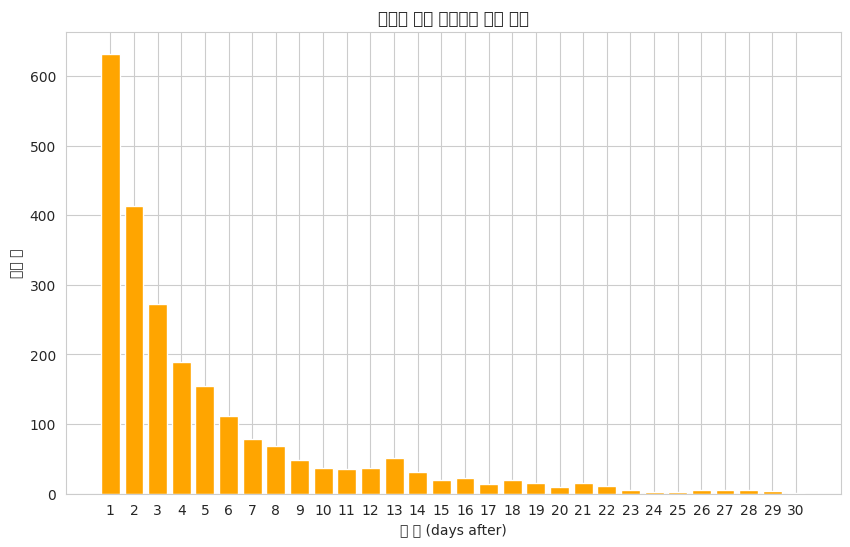

In [ ]:
# 시각화 해보기!

# 1~30일 범위로 집계
day_counts = infected['days_after'].value_counts().sort_index()
day_counts = day_counts[day_counts.index <= 30]

plt.figure(figsize=(10,6))
plt.bar(day_counts.index, day_counts.values, color='Orange')
plt.title("친구의 최초 결제까지 걸린 일수")
plt.xlabel("일 수 (days after)")
plt.ylabel("친구 수")
plt.xticks(range(1, 31))
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


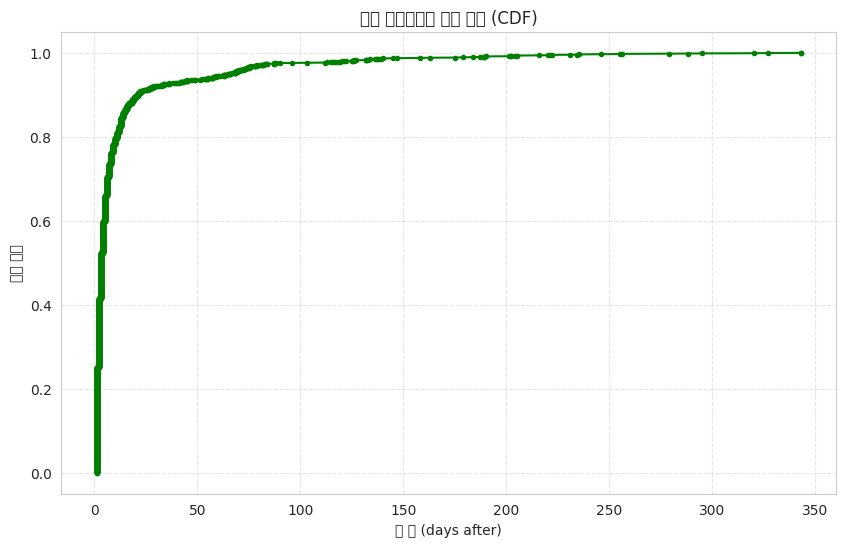

In [ ]:
# 누적비율그래프

# 1. days_after 정렬
data = infected['days_after'].dropna()
data_sorted = np.sort(data)

# 2. 누적 비율 계산
cdf = np.arange(1, len(data_sorted)+1) / len(data_sorted)

# 3. CDF 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(data_sorted, cdf, marker='.', linestyle='-', color='green')
plt.title("친구 결제까지의 누적 비율 (CDF)")
plt.xlabel("일 수 (days after)")
plt.ylabel("누적 비율")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# CDF의 기울기 계산
import numpy as np

grad = np.gradient(cdf, data_sorted)
flat_threshold = 0.001  # 기울기 거의 0으로 간주할 기준

# 처음으로 기울기가 0.001 미만이 되는 시점
plateau_day = data_sorted[np.argmax(grad < flat_threshold)]
print(f"그래프가 거의 수평이 되는 시점: {plateau_day}일 후")

그래프가 거의 수평이 되는 시점: 30.0일 후


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1245: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1245: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1246: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1246: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1247: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1247: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/py

In [ ]:
# 30일 이하 결제 비율 (CDF에서 x=30인 지점)
cdf_30 = np.sum(data_sorted <= 30) / len(data_sorted)
print(f"최초 결제일로부터 30일 이내에 결제한 친구 비율: {cdf_30:.2%}")

최초 결제일로부터 30일 이내에 결제한 친구 비율: 92.01%


#### 감염률

- 각 유저별로 전염력(감염률) 구하기
    - 감염률 = (유저 최초 결제일 이후 5일 내 결제한 친구 수) / (전체 친구 수)

In [ ]:
# 5일 이내

# 1. 유저-친구 쌍 중, 친구가 유저 결제 후 5일 이내에 결제한 경우
infected['within_5_days'] = infected['days_after'] <= 5

# 2. 유저별 전체 친구 수
total_friends = infected.groupby('user_id')['friend_id'].nunique()

# 3. 유저별 5일 이내 결제한 친구 수
converted_friends = infected[infected['within_5_days']].groupby('user_id')['friend_id'].nunique()

# 4. 비율 계산
conversion_rate = (converted_friends / total_friends).fillna(0)
conversion_rate.name = 'conversion_rate_within_5_days'

# 5. 결과 DataFrame
conversion_df = conversion_rate.reset_index()

# 확인

/tmp/ipython-input-3717305081.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infected['within_5_days'] = infected['days_after'] <= 5


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

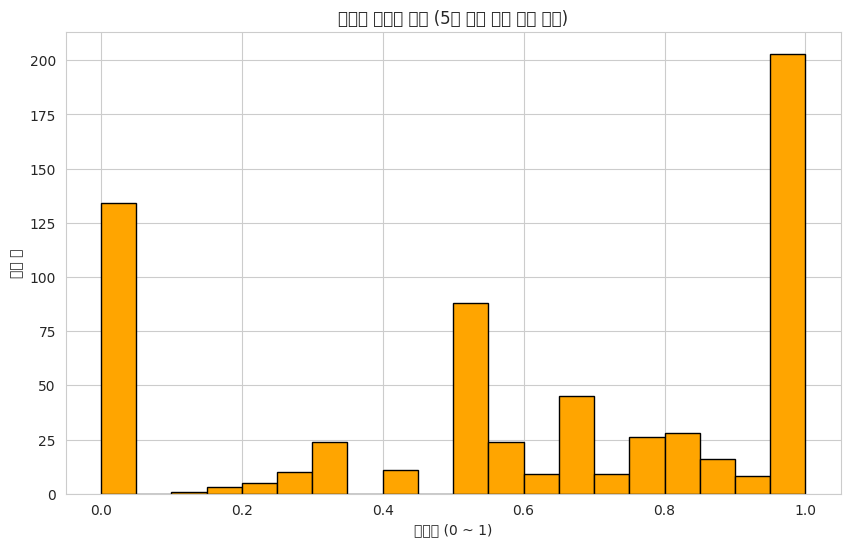

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(conversion_df['conversion_rate_within_5_days'], bins=20, edgecolor='black', color='Orange')
plt.title("유저별 감염률 분포 (5일 이내 친구 결제 비율)")
plt.xlabel("감염률 (0 ~ 1)")
plt.ylabel("유저 수")
plt.show()

#### 슈퍼 전파자

- 결제 후 5일 이내에 친구 전체가 결제한 유저들이 슈퍼 전파자

In [ ]:
# 감염률 1 이상인 유저
super_spreaders = conversion_df[conversion_df['conversion_rate_within_5_days'] >= 1]
print("슈퍼 전파자 수:", len(super_spreaders))
print(super_spreaders.sort_values('conversion_rate_within_5_days', ascending=False).head())

슈퍼 전파자 수: 203
    user_id  conversion_rate_within_5_days
1    847933                            1.0
5    868713                            1.0
7    869238                            1.0
8    870503                            1.0
10   873922                            1.0


#### 통계 검정

In [ ]:
# 결제 유저의 친구 중 몇 %가 감염되었는가?

# 결제한 유저들 중, 친구 중 몇 명이 결제했는지 계산
# 데이터 예시:
# friend_edges: user_id, friend_id
# first_payment: user_id, first_payment_time

# 결제 유저 추출
payer_ids = set(first_payment['user_id'])

# 감염 유저의 친구 중 몇 명이 감염됐는지 확인
infected_ratio_list = []

for user in payer_ids:
    friends = friend_edges[friend_edges['user_id'] == user]['friend_id'].tolist()
    if not friends:
        continue
    infected_friends = [f for f in friends if f in payer_ids]
    ratio = len(infected_friends) / len(friends)
    infected_ratio_list.append(ratio)

# 실제 평균 감염률
real_infection_ratio = np.mean(infected_ratio_list)
print(f"실제 네트워크에서 평균 감염률: {real_infection_ratio:.4f}")

실제 네트워크에서 평균 감염률: 0.1307


- Permutation Test
    -  결제 여부를 무작위로 섞어도 비슷한 감염률이 나올까?
    -  1000번 섞어서 나온 감염률 분포와 실제 값 비교

In [ ]:
# permutation test
!pip install tqdm -q

In [ ]:
import random

# 1. 친구 목록 딕셔너리
user_to_friends = friend_edges.groupby('user_id')['friend_id'].apply(list).to_dict()

# 2. 실제 감염률 계산
payer_set = set(payer_ids)
real_ratios = []

for user in payer_ids:
    friends = user_to_friends.get(user, [])
    if not friends:
        continue
    infected = [f for f in friends if f in payer_set]
    ratio = len(infected) / len(friends)
    real_ratios.append(ratio)

real_infection_ratio = np.mean(real_ratios)
print(f"실제 감염률 (평균): {real_infection_ratio:.4f}")

# 3. 무작위 감염률 계산
all_user_ids = list(user_to_friends.keys())
num_payers = len(payer_ids)
sample_size = min(num_payers, len(all_user_ids))  # ← 중요 수정

random_infection_ratios = []

for _ in range(1000):
    random_payers = set(random.sample(all_user_ids, sample_size))
    temp_ratios = []

    for user in random_payers:
        friends = user_to_friends.get(user, [])
        if not friends:
            continue
        infected = [f for f in friends if f in random_payers]
        ratio = len(infected) / len(friends)
        temp_ratios.append(ratio)

    random_infection_ratios.append(np.mean(temp_ratios))

# 4. p-value 계산
p_value = np.mean([r >= real_infection_ratio for r in random_infection_ratios])
print(f"p-value: {p_value:.4f}")

실제 감염률 (평균): 0.1307
p-value: 0.0000


```
실제 친구 네트워크에서 결제 유저의 친구 중 평균 13.07%가 함께 결제했으며,
이는 1000번의 무작위 샘플링에서 나온 평균 감염률 분포와 비교했을 때 p-value = 0.0000로
통계적으로 유의미하게 높은 수준임을 확인할 수 있었다.
즉, 결제는 단순한 우연이 아닌 네트워크 기반 전염성 효과가 존재할 가능성이 높다고 해석된다.
```

### 3-1-2. 투표 전염성

- 결제 전염성 분석 프로세스와 동일하게 진행함.

#### 투표유저의 연결 특성 분석

In [ ]:
ques_record = accounts_userquestionrecord.copy()
accountsuser = accounts_user.copy()

In [ ]:
# accounts_user 테이블에 투표 여부에 대한 컬럼 생성

# question_record 테이블의 user_id 고유값 추출
vote_user_ids = ques_record['user_id'].unique()

# accounts_user 테이블에 'vote_or_not' 컬럼 추가
accountsuser['vote_or_not'] = accountsuser['id'].isin(vote_user_ids).astype(int)

In [ ]:
# 친구 수 리스트 형태
# 변환
import ast

accountsuser['friend_id_list'] = accountsuser['friend_id_list'].apply(ast.literal_eval)

In [ ]:
# friend_id_list 길이 계산하여 friend_count 컬럼 생성하여 저장
accountsuser['friend_count'] = accountsuser['friend_id_list'].apply(len)

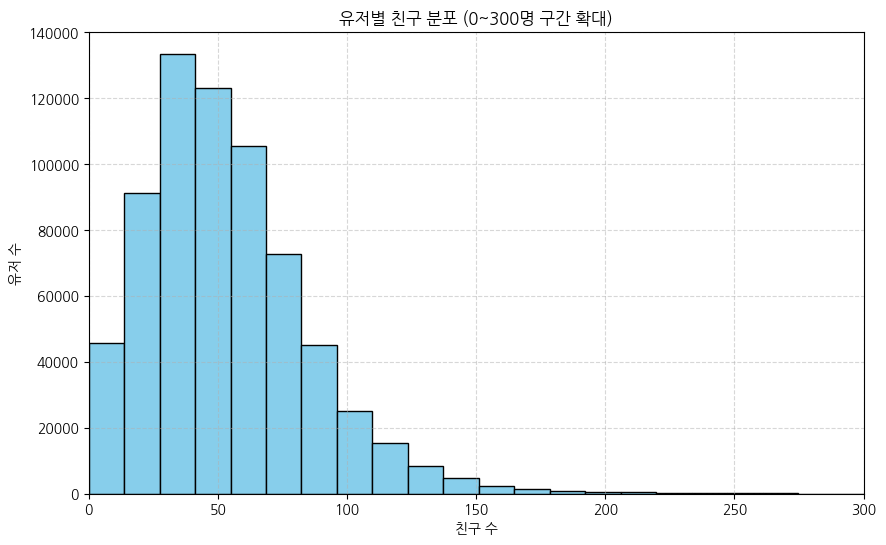

In [ ]:
# 친구수 분포 확인


plt.figure(figsize=(10,6))
plt.hist(accountsuser['friend_count'], bins=100, edgecolor='black', color='skyblue')
plt.title("유저별 친구 분포 (0~300명 구간 확대)")
plt.xlabel("친구 수")
plt.ylabel("유저 수")
plt.xlim(0, 300)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

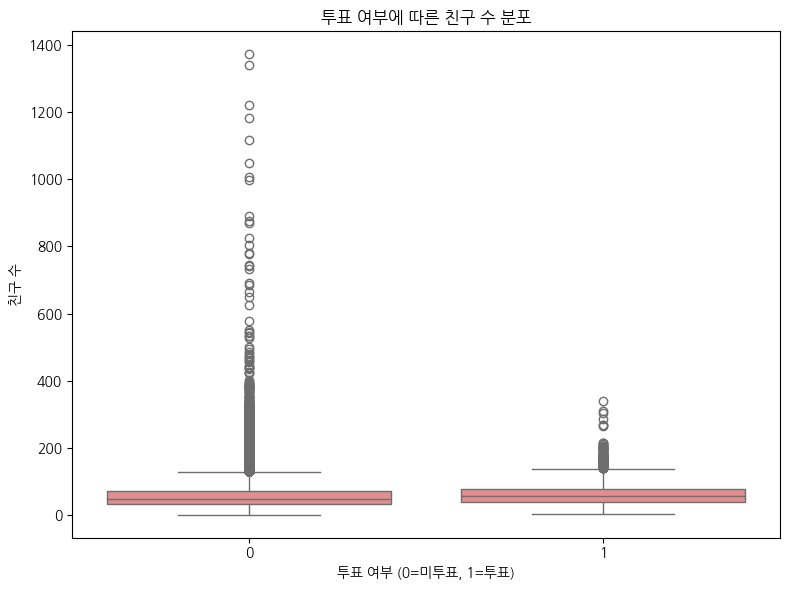

In [ ]:
import seaborn as sns

# 박스 플롯 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(data=accountsuser, x='vote_or_not', y='friend_count', color='lightcoral')
plt.xlabel('투표 여부 (0=미투표, 1=투표)')
plt.ylabel('친구 수')
plt.title('투표 여부에 따른 친구 수 분포')
plt.tight_layout()
plt.show()

- 단순히 친구가 많을수록, 투표를 많이하는 것은 아님.
- 큰 차이가 없어보임.

In [ ]:
# 유저별 친구리스트 중에 투표 이력이 있는 친구의 수
# 새로운 컬럼 생성

vote_user_ids_set = set(vote_user_ids)

def count_vote_friends(friend_list):
    return sum(1 for fid in friend_list if fid in vote_user_ids_set)

accountsuser['vote_friend_count'] = accountsuser['friend_id_list'].apply(count_vote_friends)

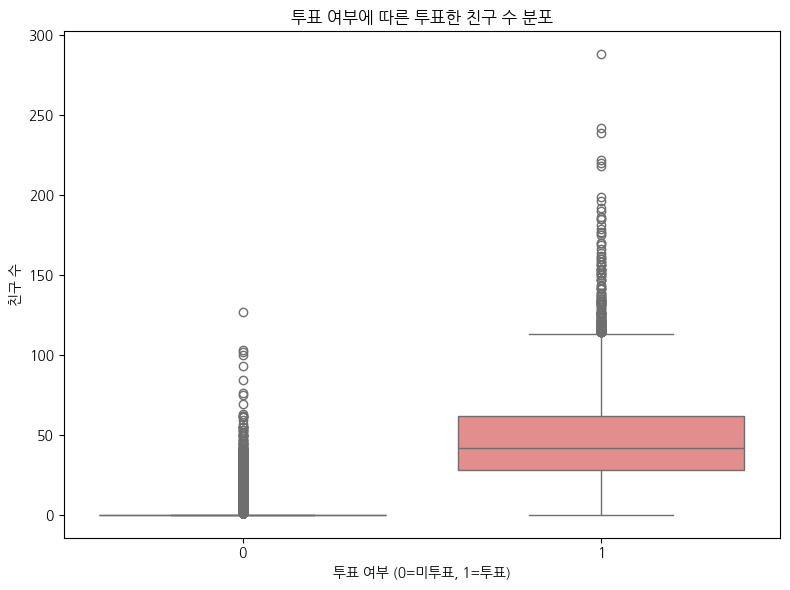

In [ ]:
# 박스 플롯 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(data=accountsuser, x='vote_or_not', y='vote_friend_count', color='lightcoral')
plt.xlabel('투표 여부 (0=미투표, 1=투표)')
plt.ylabel('친구 수')
plt.title('투표 여부에 따른 투표한 친구 수 분포')
plt.tight_layout()
plt.show()

- 투표기록이 없는 유저
    - 친구 중 투표 이력이 있는 평균 친구 수는 약 0.09명
- 결제기록이 있는 유저
    - 친구 중 결제 이력이 있는 평균 친구 수는 약 48.16명
- 약 48.07명 차이 남.

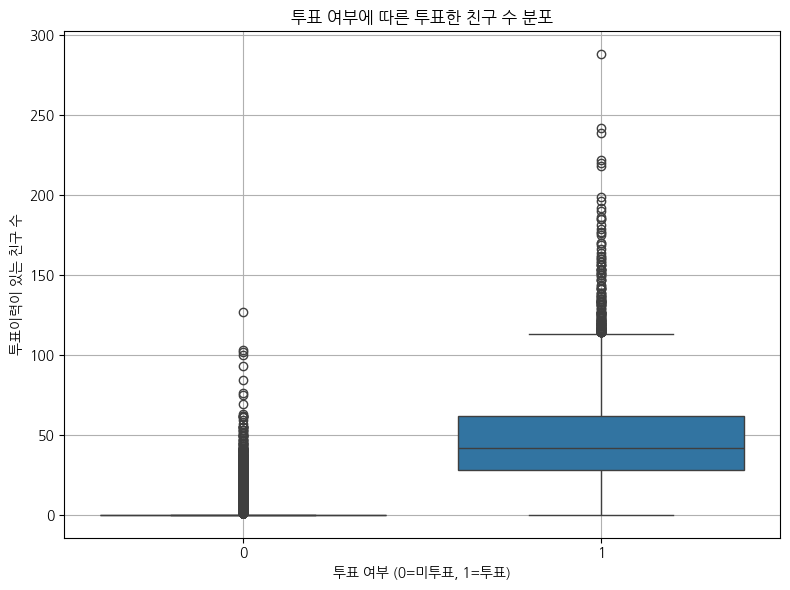

In [ ]:
# 박스 플롯 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(data=accountsuser, x='vote_or_not', y='vote_friend_count')
plt.xlabel('투표 여부 (0=미투표, 1=투표)')
plt.ylabel('투표이력이 있는 친구 수')
plt.title('투표 여부에 따른 투표한 친구 수 분포')
plt.grid(True)
plt.tight_layout()
plt.show()

- 차이가 나타남.
- 결제 유저의 경우, 결제이력이 있는 친구의 수가 많음.

In [ ]:
# 통계적 검정
from scipy.stats import ttest_ind

vote = accountsuser[accountsuser['vote_or_not'] == 1]['vote_friend_count']
unvote = accountsuser[accountsuser['vote_or_not'] == 0]['vote_friend_count']

t_stat, p_val = ttest_ind(vote, unvote, equal_var=False)
print(f"p-value: {p_val:.3f}")

p-value: 0.000


In [ ]:
# 회귀 분석
from sklearn.linear_model import LogisticRegression

features = accountsuser[['vote_friend_count']]
target = accountsuser['vote_or_not']

model = LogisticRegression()
model.fit(features, target)

print("coef:", model.coef_)  # num_vote_friends 계수 > 0 이면 전염 가능성 존재

coef: [[0.35753951]]


- 통계적으로 유의미함!
- coef 계수가 0보다 크기 때문에, 전염 가능성 존재!

In [ ]:
# 친구수 대비 투표한 친구 비

# 투표한 친구 비율
accountsuser['vote_friend_ratio'] = accountsuser['vote_friend_count'] / accountsuser['friend_count']

# 무한대/NaN 방지 (친구가 0명인 경우)
accountsuser['vote_friend_ratio'] = accountsuser['vote_friend_ratio'].fillna(0)

# 결과 확인
accountsuser[['id', 'friend_count', 'vote_friend_count', 'vote_friend_ratio']].head()

,id,friend_count,vote_friend_count,vote_friend_ratio
0,831956,6,0,0.0
1,831962,43,0,0.0
2,832151,51,0,0.0
3,832340,57,0,0.0
4,832520,18,0,0.0


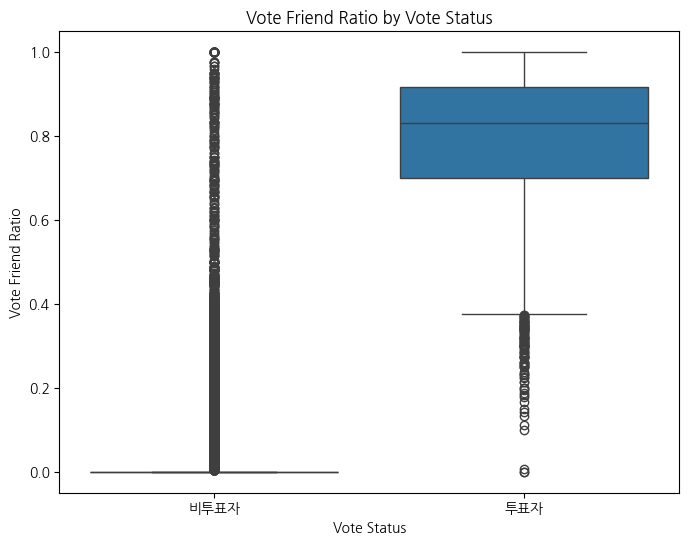

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='vote_or_not', y='vote_friend_ratio', data=accountsuser)
plt.xticks([0, 1], ['비투표자', '투표자'])
plt.title('Vote Friend Ratio by Vote Status')
plt.xlabel('Vote Status')
plt.ylabel('Vote Friend Ratio')
plt.show()

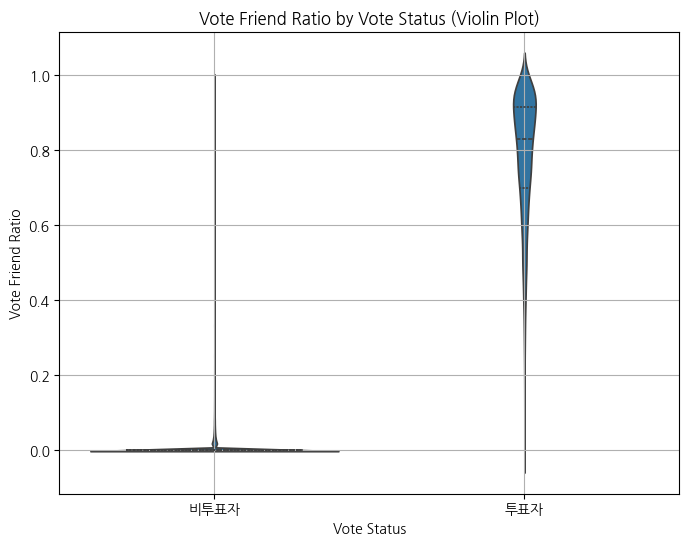

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='vote_or_not', y='vote_friend_ratio', data=accountsuser, inner='quartile')
plt.xticks([0, 1], ['비투표자', '투표자'])
plt.title('Vote Friend Ratio by Vote Status (Violin Plot)')
plt.xlabel('Vote Status')
plt.ylabel('Vote Friend Ratio')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import ttest_ind

group_0 = accountsuser[accountsuser['vote_or_not'] == 0]['vote_friend_ratio']
group_1 = accountsuser[accountsuser['vote_or_not'] == 1]['vote_friend_ratio']

t_stat, p_val = ttest_ind(group_0, group_1, equal_var=False)
print(f'p-value: {p_val:.3f}')

p-value: 0.000


In [ ]:
# 회귀 분석

features = accountsuser[['vote_friend_ratio']]
target = accountsuser['vote_or_not']

model = LogisticRegression()
model.fit(features, target)

print("coef:", model.coef_)

coef: [[16.54663985]]


- 친구대비 투표경험이 있는 친구의 비율 지표도 통계적으로 유의미함.
- 회귀계수도 16.5466 정도로 이 값은 독립변수가 1단위 증가할 때
- 결과(예: 투표할 확률)의 로그 오즈(log-odds)가 약 16.5466만큼 증가한다는 뜻입니다.
- 굉장히 강한 영향력을 나타냅니다.

#### 시간흐름에 따른 전염 효과 분석

- 특정 유저가 투표한 직후, 친구들이 며칠 이내에 투표하는가?
- 친구 중 투표한 날짜가 index 유저 투표 후 ±n일 안에 몰려 있는지 확인
- 인사이트: 투표 유도 시기 타이밍 최적화 가능

- 분석 순서
    - 투표 유저 리스트 추출
    - 투표 시점 기준, 해당 유저의 친구 목록 추출
    - 친구들의 투표 시점과 비교 → 시간차 계산
    - 시간차가 0일~N일 사이인 친구 수 집계
    - 히스토그램 또는 누적 비율 그래프로 시각화

```
각 투표 유저 기준으로, 그의 친구들이 첫 투표 시점 이후 며칠 이내에 결제했는지?
```

In [ ]:
# datetime으로 데이터형 변환
ques_record['created_at'] = pd.to_datetime(ques_record['created_at'])

In [ ]:
# user_id 별 최초 투표 일자 추출

first_vote = ques_record.groupby('user_id')['created_at'].min().reset_index()
first_vote.columns = ['user_id', 'first_vote_date']
first_vote.head()

,user_id,first_vote_date
0,838023,2023-04-30 01:22:56+09:00
1,838466,2023-05-03 07:42:05+09:00
2,838642,2023-04-28 23:18:07+09:00
3,839357,2023-04-30 01:51:01+09:00
4,840293,2023-05-03 11:24:05+09:00


In [ ]:
# 데이터가 너무 커서 샘플링

# 먼저 1만 명 정도 유저만 샘플링해서 확인
accounts_user_sample = accountsuser.sample(n=10000, random_state=42)

# explode 적용
friend_edges = accounts_user_sample.explode('friend_id_list')[['id', 'friend_id_list']]
friend_edges.columns = ['user_id', 'friend_id']

In [ ]:
# 친구들의 최초투표시점
# first_vote에서 컬럼명 변경
friend_first_vote = first_vote.rename(columns={
    'user_id': 'friend_id',
    'first_vote_date': 'friend_vote_date'
})

In [ ]:
# 투표한 유저와 친구의 결제시점 병합
merged = friend_edges.merge(first_vote, on='user_id', how='left') \
                     .merge(friend_first_vote, on='friend_id', how='left')

# 데이터 타입 변경
merged['friend_vote_date'] = pd.to_datetime(merged['friend_vote_date'])
merged['first_vote_date'] = pd.to_datetime(merged['first_vote_date'])


# 투표 시점 차이 계산
merged['days_after'] = (merged['friend_vote_date'] - merged['first_vote_date']).dt.days

# 친구가 투표한 유저보다 나중에 투표한 경우만 추출
infected = merged[merged['days_after'] > 0]

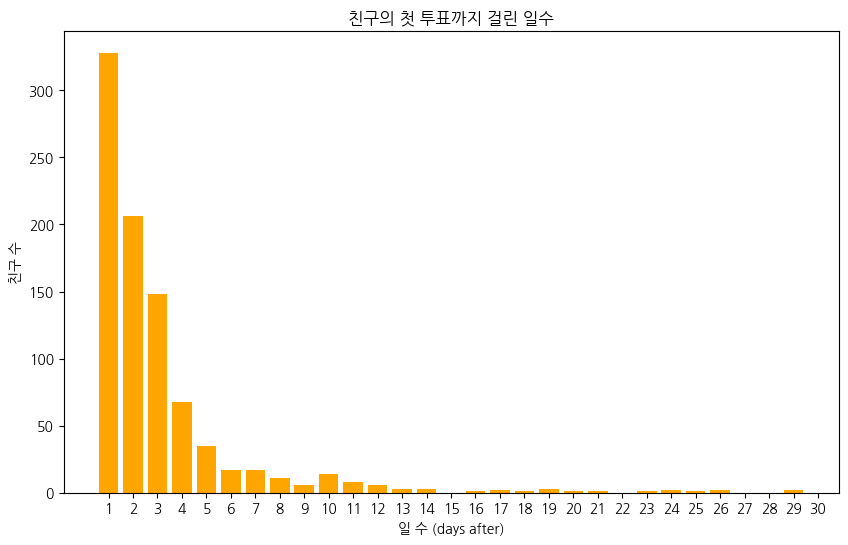

In [ ]:
# 시각화 해보기!

# 1~30일 범위로 집계
day_counts = infected['days_after'].value_counts().sort_index()
day_counts = day_counts[day_counts.index <= 30]

plt.figure(figsize=(10,6))
plt.bar(day_counts.index, day_counts.values, color='Orange')
plt.title("친구의 첫 투표까지 걸린 일수")
plt.xlabel("일 수 (days after)")
plt.ylabel("친구 수")
plt.xticks(range(1, 31))
plt.show()

In [ ]:
# 투표 전파 시점 분석
infected_stats = infected['days_after'].describe()
print(infected_stats)

# 추가적으로 사분위 범위
iqr = infected['days_after'].quantile(0.75) - infected['days_after'].quantile(0.25)
print("IQR (Interquartile Range):", iqr)

count    899.000000
mean       4.191324
std       13.306859
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max      315.000000
Name: days_after, dtype: float64
IQR (Interquartile Range): 2.0


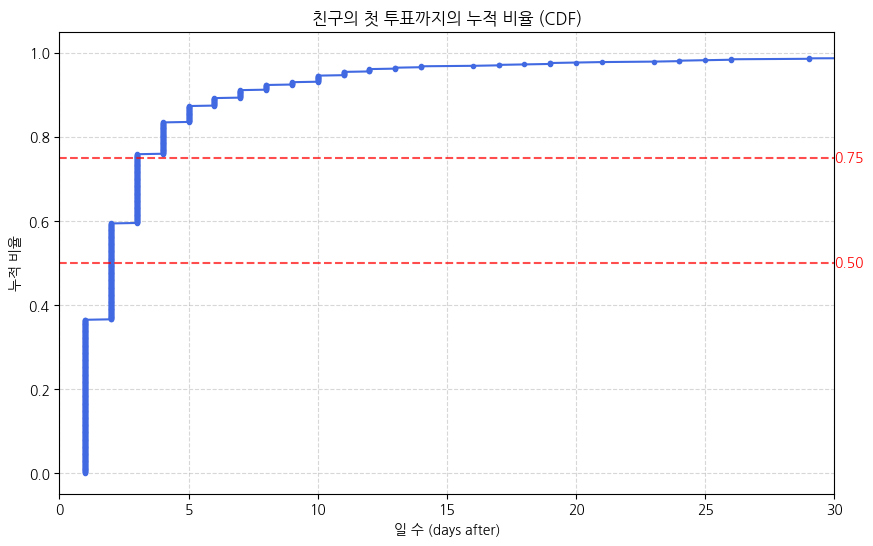

In [ ]:
import numpy as np

# 누적비율그래프

# 1. days_after 정렬
data = infected['days_after'].dropna()
data_sorted = np.sort(data)

# 2. 누적 비율 계산
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# 3. CDF 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(data_sorted, cdf, marker='.', linestyle='-', color='royalblue')

# x축 범위 제한 (0~30일)
plt.xlim(0, 30)

# 누적 비율 0.5와 0.75 표시선 + 해당 값 텍스트
for y_val in [0.5, 0.75]:
    plt.axhline(y=y_val, color='red', linestyle='--', alpha=0.7)
    plt.text(30, y_val, f'{y_val:.2f}', va='center', ha='left', color='red')

plt.title("친구의 첫 투표까지의 누적 비율 (CDF)")
plt.xlabel("일 수 (days after)")
plt.ylabel("누적 비율")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# CDF의 기울기 계산
import numpy as np

grad = np.gradient(cdf, data_sorted)
flat_threshold = 0.001  # 기울기 거의 0으로 간주할 기준

# 처음으로 기울기가 0.001 미만이 되는 시점
plateau_day = data_sorted[np.argmax(grad < flat_threshold)]
print(f"그래프가 거의 수평이 되는 시점: {plateau_day}일 후")

그래프가 거의 수평이 되는 시점: 16.0일 후


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1245: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1245: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1246: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1246: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1247: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:1247: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/py

In [ ]:
# 16일 이하 투표 비율 (CDF에서 x=16인 지점)
cdf_16 = np.sum(data_sorted <= 16) / len(data_sorted)
print(f"최초 투표일로부터 16일 이내에 투표한 친구 비율: {cdf_16:.2%}")

최초 투표일로부터 16일 이내에 투표한 친구 비율: 96.89%


#### 감염률

- 각 유저별로 전염력(감염률) 구하기
    - 감염률 = (유저 최초 투표일 이후 5일 내 투표한 친구 수) / (전체 친구 수)

In [ ]:
# 5일 이내

# 1. 유저-친구 쌍 중, 친구가 유저의 첫 투표 후 5일 이내에 결제한 경우
infected['within_5_days'] = infected['days_after'] <= 5

# 2. 유저별 전체 친구 수
total_friends = infected.groupby('user_id')['friend_id'].nunique()

# 3. 유저별 5일 이내 투표한 친구 수
converted_friends = infected[infected['within_5_days']].groupby('user_id')['friend_id'].nunique()

# 4. 비율 계산
conversion_rate = (converted_friends / total_friends).fillna(0)
conversion_rate.name = 'conversion_rate_within_5_days'

# 5. 결과 DataFrame
conversion_df = conversion_rate.reset_index()

# 확인
conversion_df.head()

/tmp/ipython-input-30431710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infected['within_5_days'] = infected['days_after'] <= 5


,user_id,conversion_rate_within_5_days
0,838466,1.000000
1,849528,0.600000
2,850091,0.833333
3,850284,0.000000
4,852044,0.857143


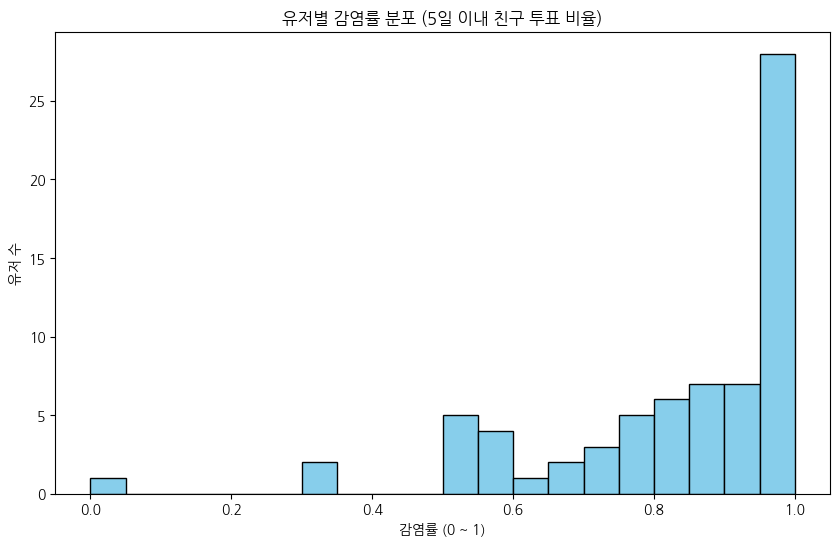

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(conversion_df['conversion_rate_within_5_days'], bins=20, edgecolor='black', color='skyblue')
plt.title("유저별 감염률 분포 (5일 이내 친구 투표 비율)")
plt.xlabel("감염률 (0 ~ 1)")
plt.ylabel("유저 수")
plt.show()

#### 슈퍼전파자

- 투표 후 5일 이내에 친구 전체가 투표한 유저들이 슈퍼 전파자

In [ ]:
# 감염률 1 이상인 유저
super_spreaders = conversion_df[conversion_df['conversion_rate_within_5_days'] >= 1]
print("슈퍼 전파자 수:", len(super_spreaders))
print(super_spreaders.sort_values('conversion_rate_within_5_days', ascending=False).head())

슈퍼 전파자 수: 24
    user_id  conversion_rate_within_5_days
0    838466                            1.0
7    855675                            1.0
12   873157                            1.0
18   880096                            1.0
19   881298                            1.0


#### 통계 검정

In [ ]:
# 결제한 유저들 중, 친구 중 몇 명이 결제했는지 계산
# 데이터 예시:
# friend_edges: user_id, friend_id
# first_payment: user_id, first_payment_time

# 결제 유저 추출
payer_ids = set(first_vote['user_id'])

# 감염 유저의 친구 중 몇 명이 감염됐는지 확인
infected_ratio_list = []

for user in payer_ids:
    friends = friend_edges[friend_edges['user_id'] == user]['friend_id'].tolist()
    if not friends:
        continue
    infected_friends = [f for f in friends if f in payer_ids]
    ratio = len(infected_friends) / len(friends)
    infected_ratio_list.append(ratio)

# 실제 평균 감염률
real_infection_ratio = np.mean(infected_ratio_list)
print(f"실제 네트워크에서 평균 감염률: {real_infection_ratio:.4f}")

실제 네트워크에서 평균 감염률: 0.7771


In [ ]:
import random

# 1. 친구 목록 딕셔너리
user_to_friends = friend_edges.groupby('user_id')['friend_id'].apply(list).to_dict()

# 2. 실제 감염률 계산
payer_set = set(payer_ids)
real_ratios = []

for user in payer_ids:
    friends = user_to_friends.get(user, [])
    if not friends:
        continue
    infected = [f for f in friends if f in payer_set]
    ratio = len(infected) / len(friends)
    real_ratios.append(ratio)

real_infection_ratio = np.mean(real_ratios)
print(f"실제 감염률 (평균): {real_infection_ratio:.4f}")

# 3. 무작위 감염률 계산
all_user_ids = list(user_to_friends.keys())
num_payers = len(payer_ids)
sample_size = min(num_payers, len(all_user_ids))

random_infection_ratios = []

for _ in range(1000):
    random_payers = set(random.sample(all_user_ids, sample_size))
    temp_ratios = []

    for user in random_payers:
        friends = user_to_friends.get(user, [])
        if not friends:
            continue
        infected = [f for f in friends if f in random_payers]
        ratio = len(infected) / len(friends)
        temp_ratios.append(ratio)

    random_infection_ratios.append(np.mean(temp_ratios))

# 4. p-value 계산
p_value = np.mean([r >= real_infection_ratio for r in random_infection_ratios])
print(f"p-value: {p_value:.4f}")

실제 감염률 (평균): 0.7771
p-value: 0.0000


```
실제 친구 네트워크에서 결제 유저의 친구 중 평균 감염률:  77.71%
이는 1000번의 무작위 샘플링에서 나온 평균 감염률 분포와 비교했을 때
p-value = 0.0000 → 통계적으로 유의미하게 높은 수준
즉, 투표는 단순한 우연이 아닌 네트워크 기반 전염성 효과가 상당함!
```

## 3-2. 인플루언서 유저 영향력

### 사용 데이터

In [ ]:
v_user_df = accounts_user.copy()
v_userquestionrecord_df = accounts_userquestionrecord.copy()
v_attendance_df = new_attendance.copy()
v_payhistory_df = accounts_paymenthistory.copy()

### 인플루언서 리스트 생성

인플루언서의 기준

사용한 데이터: v_user_df의 friend_id_list

측정 지표: 친구 수 (Friend Count)

사용한 데이터: v_userquestionrecord_df (누가 누구에게 투표했는지 기록)

인기 점수 (In-Degree): 이 유저가 다른 사람들에게 투표를 받은 총 횟수

활동성 점수 (Out-Degree): 이 유저가 다른 사람들에게 투표를 한 총 횟수

중요도 점수 (PageRank): 중요한 사람(인기 많고 활동적인 사람)에게 표를 받는 유저일수록 점수가 높아짐. '인플루언서들의 인플루언서'를 찾아내는 지표.

In [ ]:
print("=============== 📊 '소셜+투표' 통합 인플루언서 정의 (데이터 정제 후) 📊 ===============")

# ==============================================================================
# 1. 데이터 정제: 분석에 사용할 깨끗한 유저 목록 생성
# ==============================================================================
print("--- Step 1: 데이터 정제 (관리자 및 친구 수 이상치 제거) 시작 ---")

# 1-1. 관리자(superuser) 및 스태프(staff) 계정 제외
v_user_df_cleaned = v_user_df[
    (v_user_df['is_superuser'] == 0) &
    (v_user_df['is_staff'] == 0)
].copy()

print(f"원본 유저 수: {len(v_user_df)}")
print(f"관리자/스태프 제외 후 유저 수: {len(v_user_df_cleaned)}")

# 1-2. 친구 수 계산 (이전의 안정적인 함수 사용)
def count_friends_final(friend_list_data):
    if isinstance(friend_list_data, list):
        return len(friend_list_data)
    if isinstance(friend_list_data, str) and friend_list_data.startswith('['):
        try: return len(ast.literal_eval(friend_list_data))
        except (ValueError, SyntaxError): return 0
    return 0

v_user_df_cleaned['friend_count'] = v_user_df_cleaned['friend_id_list'].apply(count_friends_final)

# 1-3. 친구 수 이상치(Outlier) 제거 (IQR 방식)
Q1 = v_user_df_cleaned['friend_count'].quantile(0.25)
Q3 = v_user_df_cleaned['friend_count'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# 상한선을 초과하는 유저들을 이상치로 간주
outliers = v_user_df_cleaned[v_user_df_cleaned['friend_count'] > upper_bound]
# 이상치를 제외한 최종 유저 목록 생성
v_user_df_cleaned = v_user_df_cleaned[v_user_df_cleaned['friend_count'] <= upper_bound]

print(f"친구 수 이상치 상한선: {upper_bound:.2f} 명")
print(f"이상치로 간주되어 제외된 유저 수: {len(outliers)}")
print(f"최종 분석 대상 유저 수: {len(v_user_df_cleaned)}")
print("✅ 데이터 정제 완료.")
print("-" * 50)


# ==============================================================================
# 2. 정제된 데이터를 기반으로 SNA 지표 계산
# ==============================================================================
print("--- Step 2: 정제된 데이터 기반 SNA 지표 계산 시작 ---")

# 2-1. 분석 기반 테이블 생성 (정제된 유저 대상)
user_stats = v_user_df_cleaned[['id', 'friend_count']].copy()
user_stats.rename(columns={'id': 'user_id'}, inplace=True)

# 2-2. 투표 네트워크 생성 (정제된 유저들의 활동만 고려)
cleaned_user_ids = set(user_stats['user_id'])
vote_relations = v_userquestionrecord_df[
    v_userquestionrecord_df['user_id'].isin(cleaned_user_ids) &
    v_userquestionrecord_df['chosen_user_id'].isin(cleaned_user_ids)
].copy()
vote_relations.dropna(subset=['user_id', 'chosen_user_id'], inplace=True)
vote_relations = vote_relations[vote_relations['user_id'] != vote_relations['chosen_user_id']]

G_vote = nx.DiGraph()
edges = [tuple(x) for x in vote_relations[['user_id', 'chosen_user_id']].to_numpy()]
G_vote.add_edges_from(edges)
print(f"투표 네트워크 생성 완료: 노드 수={G_vote.number_of_nodes()}, 엣지 수={G_vote.number_of_edges()}")

# 2-3. 투표 관련 SNA 지표 계산
in_degree = dict(G_vote.in_degree())
out_degree = dict(G_vote.out_degree())
pagerank = nx.pagerank(G_vote, alpha=0.85)
user_stats['in_degree'] = user_stats['user_id'].map(in_degree).fillna(0)
user_stats['out_degree'] = user_stats['user_id'].map(out_degree).fillna(0)
user_stats['pagerank'] = user_stats['user_id'].map(pagerank).fillna(0)
print("✅ 투표 네트워크 SNA 지표 계산 완료.")
print("-" * 50)


# ==============================================================================
# 3. 데이터 표준화 및 최적의 클러스터 수(K) 찾기
# ==============================================================================
print("\n--- Step 3: 데이터 표준화 및 최적의 K 찾기 (Elbow Method) ---")
features = ['friend_count', 'in_degree', 'out_degree', 'pagerank']
X = user_stats[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K (Cleaned Data)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()
print("📈 위 그래프에서 팔꿈치처럼 꺾이는 지점의 K가 최적의 클러스터 수입니다.")

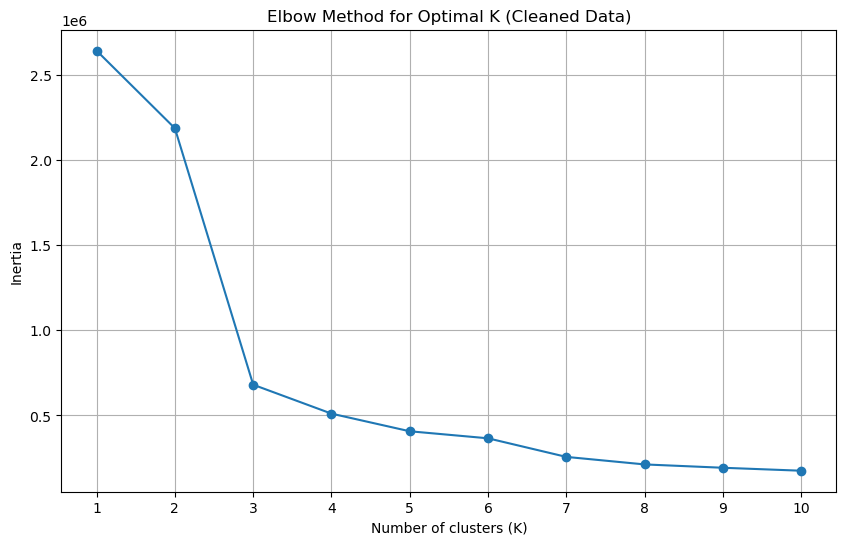

In [ ]:
# ==============================================================================
# 4. K-Means 클러스터링 실행 및 최종 '인플루언서' 그룹 정의
# ==============================================================================
OPTIMAL_K = 4 # 그래프를 보고 이 값을 조절해주세요.
print(f"\n--- Step 4: K={OPTIMAL_K}로 클러스터링 실행 ---")
kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init='auto')
user_stats['cluster'] = kmeans.fit_predict(X_scaled)
cluster_summary = user_stats.groupby('cluster')[features].mean().sort_values(by='friend_count', ascending=False)
print("\n--- 각 클러스터별 평균 특성 ---")
display(cluster_summary)
user_stats_scaled = pd.DataFrame(X_scaled, columns=features)
user_stats_scaled['cluster'] = user_stats['cluster']
cluster_zscore_sum = user_stats_scaled.groupby('cluster')[features].mean().sum(axis=1)
influ_cluster_id = cluster_zscore_sum.idxmax()
print(f"\n모든 SNA 지표를 종합했을 때 가장 활동적인 클러스터 '{influ_cluster_id}'를 '인플루언서'로 정의합니다.")
influuser_df_final_cleaned = user_stats[user_stats['cluster'] == influ_cluster_id][['user_id']]
print(f"\n최종적으로 정의된 '인플루언서' 유저 수 (정제 데이터 기반): {len(influuser_df_final_cleaned)} 명")
print("-" * 50)
display(influuser_df_final_cleaned.head())

📈 위 그래프에서 팔꿈치처럼 꺾이는 지점의 K가 최적의 클러스터 수입니다.

| cluster | friend_count | in_degree   | out_degree  | pagerank       |
|---------|--------------|-------------|-------------|----------------|
| 3       | 81.507645    | 44.243425   | 49.557798   | 1.892620e-04   |
| 0       | 77.442157    | 0.050263    | 0.000351    | 7.942621e-07   |
| 1       | 48.084468    | 19.830716   | 24.065620   | 1.018286e-04   |
| 2       | 32.465270    | 0.025905    | 0.006505    | 4.813237e-07   |

모든 SNA 지표를 종합했을 때 가장 활동적인 클러스터 '3.0'를 '인플루언서'로 정의합니다.

최종적으로 정의된 '인플루언서' 유저 수 (정제 데이터 기반): 1635 명

In [ ]:
# '클러스터 3'을 새로운 '인플루언서' 그룹으로 최종 정의합니다.
influuser_df_final_cleaned = user_stats[user_stats['cluster'] == 3][['user_id']]

print("새롭게 정의된 '인플루언서' 유저 수:", len(influuser_df_final_cleaned))

새롭게 정의된 '인플루언서' 유저 수: 1635

### 학급 내 인플루언서 인원수에 따른 학급 분류

In [ ]:
import pandas as pd
import numpy as np

# ==============================================================================
# ✨ STEP 0: 분석에 필요한 데이터 준비 ✨
# ==============================================================================
# 최종 '인플루언서' 목록이 influuser_df_final_cleaned 라는 이름으로
# 메모리에 로드되어 있다고 가정합니다.
influuser_df = influuser_df_final_cleaned
influ_user_ids = set(influuser_df['user_id'])

# 유저-학급 정보가 담긴 v_user_df가 로드되어 있다고 가정합니다.
user_info = v_user_df[['id', 'group_id']].copy()
user_info.rename(columns={'id': 'user_id'}, inplace=True)
user_info.dropna(subset=['group_id'], inplace=True)

# ==============================================================================
# ✨ STEP 1: 학급별 '인플루언서 수' 계산 ✨
# ==============================================================================
print("--- Step 1: 학급별 인플루언서 수 계산 시작 ---")

influ_user_info = user_info[user_info['user_id'].isin(influ_user_ids)]
influ_counts_per_group = influ_user_info.groupby('group_id')['user_id'].nunique().reset_index(name='influ_count')

print("✅ 학급별 인플루언서 수 계산 완료.")
print("-" * 50)


# ==============================================================================
# ✨ STEP 2: '인플루언서 수'에 따라 상세하게 그룹 분류 (수정된 기준) ✨
# ==============================================================================
print("--- Step 2: 인플루언서 수에 따른 상세 그룹 분류 시작 ---")

# ✨✨✨ 핵심 수정 부분 시작 ✨✨✨
# 상세 그룹 이름표를 붙이는 함수를 수정합니다.
def assign_influ_count_group_very_detailed(count):
    count = int(count)
    if count >= 12: # 12명 이상인 경우
        return '12명 이상'
    elif count > 0: # 1명부터 11명까지는 개별적으로
        return f'{count}명'
    else:
        return '0명'
# ✨✨✨ 핵심 수정 부분 끝 ✨✨✨

influ_counts_per_group['influ_count_group'] = influ_counts_per_group['influ_count'].apply(assign_influ_count_group_very_detailed)

print("✅ 상세 그룹 분류 완료.")
print("-" * 50)


# ==============================================================================
# ✨ STEP 3: 최종 결과 확인 ✨
# ==============================================================================
print("\n\n=============== 📊 '인플루언서 수' 그룹별 학급 수 현황 📊 ===============")

group_distribution = influ_counts_per_group['influ_count_group'].value_counts().reset_index()
group_distribution.columns = ['influ_count_group', 'num_groups']

# 정렬을 위한 키 생성
group_distribution['sort_key'] = group_distribution['influ_count_group'].str.extract('(\d+)').astype(int)
group_distribution = group_distribution.sort_values('sort_key').drop(columns='sort_key')

display(group_distribution)

print("\n\n--- [참고] 분류된 학급 정보 미리보기 ---")
display(influ_counts_per_group.head())

| influ_count_group | num_groups |
|-------------------|------------|
| 1명               | 26         |
| 2명               | 42         |
| 3명               | 30         |
| 4명               | 41         |
| 5명               | 42         |
| 6명               | 20         |
| 7명               | 18         |
| 8명               | 22         |
| 9명               | 15         |
| 10명              | 10         |
| 11명              | 10         |
| 12명 이상         | 21         |

### 학급 내 인플루언서 유무에 따른 활동량 비교 및 t검정

In [ ]:
# ==============================================================================
# ✨ STEP 1: 모든 학급의 '정확한' 총량 정보 집계 (v_group_df 배제) ✨
# ==============================================================================
print("--- Step 1: 모든 학급의 정보 집계 시작 (최종 방어 로직) ---")

# --- 1-1. 기초 데이터 준비 ---
v_user_df_clean = v_user_df.drop_duplicates(subset=['id']).copy()
v_user_df_clean.rename(columns={'id': 'user_id'}, inplace=True)
influuser_df = influuser_df_final_cleaned
influ_user_ids = set(influuser_df['user_id'])
user_info_for_merge = v_user_df_clean[['user_id', 'group_id']].dropna()

# --- 1-2. 'group_stats'의 뼈대 생성 (v_user_df 기반) ---
all_group_ids = user_info_for_merge['group_id'].unique()
group_stats = pd.DataFrame({'group_id': all_group_ids})
group_size = user_info_for_merge.groupby('group_id')['user_id'].nunique().reset_index(name='group_size')
group_stats = pd.merge(group_stats, group_size, on='group_id', how='left')

# --- 1-3. 활동량 집계 (v_group_df 없이 직접 계산) ---
# ✨✨✨ 핵심 수정 부분 시작 ✨✨✨
# 출석
attendance_df = v_attendance_df.copy()
# list와 str을 모두 처리하는 안전한 함수를 사용합니다.
def safe_len_eval(data):
    if isinstance(data, list):
        return len(data)
    if isinstance(data, str) and data.startswith('['):
        try: return len(ast.literal_eval(data))
        except (ValueError, SyntaxError): return 0
    return 0
# 먼저, 각 유저의 총 출석일수를 계산합니다.
attendance_df['user_total_attendance'] = attendance_df['attendance_date_list'].apply(safe_len_eval)
# 그 다음, 유저-학급 정보를 merge합니다.
attendance_with_group = pd.merge(attendance_df[['user_id', 'user_total_attendance']], user_info_for_merge, on='user_id', how='inner')
# 마지막으로, 학급별로 멤버들의 총 출석일수를 합산합니다.
group_attendance = attendance_with_group.groupby('group_id')['user_total_attendance'].sum().reset_index(name='total_attendance_days')
# ✨✨✨ 핵심 수정 부분 끝 ✨✨✨

# 결제
payment_df = v_payhistory_df.copy()
payment_df['hearts_purchased'] = pd.to_numeric(payment_df['productId'].str.split('.').str[1], errors='coerce').fillna(0)
payment_with_group = pd.merge(payment_df, user_info_for_merge, on='user_id', how='inner')
group_hearts = payment_with_group.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts')
# 투표
vote_df = v_userquestionrecord_df.copy()
vote_with_group = pd.merge(vote_df, user_info_for_merge, on='user_id', how='inner')
group_votes = vote_with_group.groupby('group_id').size().reset_index(name='total_votes')

# --- 1-4. 모든 정보를 하나의 'group_stats' 테이블로 통합 ---
dfs_to_merge = [group_votes, group_hearts, group_attendance]
for df in dfs_to_merge:
    group_stats = pd.merge(group_stats, df, on='group_id', how='left')
group_stats.fillna(0, inplace=True)
print("✅ 모든 학급 정보 집계 완료.")
print("-" * 50)

# ==============================================================================
# ✨ STEP 2: '활동 학급' 필터링 및 그룹 분리 ✨
# ==============================================================================
print("--- Step 2: '활동 학급' 필터링 및 그룹 분리 시작 ---")
active_groups = group_stats[group_stats['total_votes'] > 0].copy()
influ_group_ids = set(user_info_for_merge[user_info_for_merge['user_id'].isin(influ_user_ids)]['group_id'].dropna().unique())
active_groups['is_influencer_group'] = active_groups['group_id'].apply(lambda gid: 1 if gid in influ_group_ids else 0)
influencer_groups = active_groups[active_groups['is_influencer_group'] == 1]
non_influencer_groups = active_groups[active_groups['is_influencer_group'] == 0]
print(f"활동 학급 중, 인플루언서 존재 학급 수: {len(influencer_groups)}")
print(f"활동 학급 중, 인플루언서 미존재 학급 수: {len(non_influencer_groups)}")
print("✅ 그룹 분리 완료.")
print("-" * 50)

# ==============================================================================
# ✨ STEP 3 & 4: 최종 지표 비교, 통계 검증, 결과 출력 ✨
# ==============================================================================
print("--- Step 3: 최종 지표 비교 및 통계 검증 시작 ---")
metrics_to_compare = ['total_attendance_days', 'total_votes', 'total_hearts']
influ_avg = influencer_groups[metrics_to_compare].mean()
non_influ_avg = non_influencer_groups[metrics_to_compare].mean()
summary_table = pd.DataFrame({'인플루언서 존재 학급': influ_avg, '인플루언서 미존재 학급': non_influ_avg})
summary_table.rename(index={'total_attendance_days': '학급당 총 출석일수', 'total_votes': '학급당 총 투표 건수', 'total_hearts': '학급당 총 구매 하트'}, inplace=True)
test_results = []
for metric in metrics_to_compare:
    group1_data = influencer_groups[metric]
    group2_data = non_influencer_groups[metric]
    t_stat, p_val = ttest_ind(group1_data, group2_data, equal_var=False, nan_policy='omit')
    test_results.append({'지표': summary_table.index[metrics_to_compare.index(metric)], 'p-value': p_val, '유의미한 차이 (p < 0.05)': 'YES' if p_val < 0.05 else 'NO'})
test_results_df = pd.DataFrame(test_results)
print("\n\n=============== 📊 '활동 학급' 내 인플루언서 유/무 비교 분석 (최종 방어 코드) 📊 ===============")
print("\n--- [A] 주요 지표 평균 비교 ---")
display(summary_table.round(2))
print("\n--- [B] 평균 차이 통계 검증 결과 ---")
display(test_results_df)

주요 지표 평균 비교

| 항목                 | 인플루언서 존재 학급 | 인플루언서 미존재 학급 |
|----------------------|-----------------------|--------------------------|
| 학급당 총 출석일수     | 404.51                | 101.37                   |
| 학급당 총 투표 건수     | 3,975.50              | 708.37                   |
| 학급당 총 구매 하트     | 1,571.97              | 252.38                   |


평균 차이 통계 검증 결과

| 지표               | p-value           | 유의미한 차이 (p < 0.05) |
|--------------------|-------------------|---------------------------|
| 학급당 총 출석일수   | 2.969084e-28      | YES                       |
| 학급당 총 투표 건수   | 3.821261e-40      | YES                       |
| 학급당 총 구매 하트   | 2.069003e-16      | YES                       |

### 인플루언서 밀도별 커뮤니티 활동량 분석

In [ ]:
# ==============================================================================
# ✨ STEP 0: 분석에 필요한 모든 기본 데이터 준비 ✨
# ==============================================================================
print("--- Step 0: 분석용 데이터 준비 시작 ---")
# 최종 '인플루언서' 목록
influuser_df = influuser_df_final_cleaned
influ_user_ids = set(influuser_df['user_id'])

# 유저 정보 (중복 제거된 깨끗한 버전 사용)
v_user_df_clean = v_user_df.drop_duplicates(subset=['id']).copy()
v_user_df_clean.rename(columns={'id': 'user_id'}, inplace=True)
user_info = v_user_df_clean[['user_id', 'group_id', 'created_at']].copy()
user_info['creation_date'] = pd.to_datetime(user_info['created_at'], errors='coerce').dt.date
user_info.dropna(subset=['group_id', 'creation_date'], inplace=True)
user_info['is_influencer'] = user_info['user_id'].isin(influ_user_ids)

# 활동 데이터 준비
attendance_df = v_attendance_df.copy()
def safe_literal_eval(val):
    if isinstance(val, str):
        try: return ast.literal_eval(val)
        except (ValueError, SyntaxError): return []
    elif isinstance(val, list): return val
    return []
attendance_df['attendance_date_list'] = attendance_df['attendance_date_list'].apply(safe_literal_eval)
exploded_attendance = attendance_df.explode('attendance_date_list').rename(columns={'attendance_date_list': 'activity_date'})
exploded_attendance['activity_date'] = pd.to_datetime(exploded_attendance['activity_date'], errors='coerce').dt.date
payment_df = v_payhistory_df.copy()
payment_df['activity_date'] = pd.to_datetime(payment_df['created_at'], errors='coerce') # 타임존 제거를 위해 utc=True, tz_convert(None) 생략
payment_df['hearts_purchased'] = pd.to_numeric(payment_df['productId'].str.split('.').str[1], errors='coerce').fillna(0)
vote_df = v_userquestionrecord_df.copy()
vote_df['activity_date'] = pd.to_datetime(vote_df['created_at'], errors='coerce') # 타임존 제거를 위해 utc=True, tz_convert(None) 생략
print("✅ 분석용 기본 데이터 준비 완료.")
print("-" * 60)


# ==============================================================================
# ✨ STEP 1: '인플루언서 학급' 단위 활동 데이터 집계 (오류 수정) ✨
# ==============================================================================
print("--- Step 1: '인플루언서 학급' 단위 활동 데이터 집계 시작 ---")
# 1-1. 분석 대상 학급 및 '최초 인플루언서 등장일' 정의
influ_user_info = user_info[user_info['is_influencer']].copy()
first_influ_appearance = influ_user_info.groupby('group_id')['creation_date'].min().reset_index(name='influ_start_date')
target_group_ids = set(first_influ_appearance['group_id'])

# 1-2. 학급 생성일 및 인플루언서 수 정보
group_creators = user_info.sort_values('creation_date').drop_duplicates(subset=['group_id'], keep='first')[['group_id', 'user_id']].rename(columns={'user_id': 'creator_id'})
group_creator_dates = user_info.drop_duplicates(subset=['user_id']).set_index('user_id')['creation_date']
group_creators['group_creation_date'] = group_creators['creator_id'].map(group_creator_dates)
influ_counts_per_group = influ_user_info.groupby('group_id')['user_id'].nunique().reset_index(name='influ_count')

# 1-3. 'group_analysis_df' 뼈대 생성
group_analysis_df = pd.merge(first_influ_appearance, group_creators, on='group_id', how='left')
group_analysis_df = pd.merge(group_analysis_df, influ_counts_per_group, on='group_id', how='left')
group_analysis_df.dropna(subset=['group_creation_date'], inplace=True)

# 1-4. 일반 멤버 / 인플루언서 멤버 활동 분리 및 집계
all_members = user_info[user_info['group_id'].isin(target_group_ids)]
general_members = all_members[~all_members['is_influencer']]
general_members_with_date = pd.merge(general_members, first_influ_appearance, on='group_id')
general_members_with_date['influ_start_date'] = pd.to_datetime(general_members_with_date['influ_start_date'])
general_members_with_date['creation_date'] = pd.to_datetime(general_members_with_date['creation_date'])

members_before = general_members_with_date[general_members_with_date['creation_date'] < general_members_with_date['influ_start_date']]
members_after = general_members_with_date[general_members_with_date['creation_date'] >= general_members_with_date['influ_start_date']]

exploded_attendance['activity_date'] = pd.to_datetime(exploded_attendance['activity_date'])
attendance_with_members = pd.merge(exploded_attendance, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id', how='inner')
attendance_before = attendance_with_members[attendance_with_members['activity_date'].dt.date < attendance_with_members['influ_start_date'].dt.date]
attendance_after = attendance_with_members[attendance_with_members['activity_date'].dt.date >= attendance_with_members['influ_start_date'].dt.date]
payments_with_members = pd.merge(payment_df, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id', how='inner')
payments_before = payments_with_members[payments_with_members['activity_date'].dt.date < payments_with_members['influ_start_date'].dt.date]
payments_after = payments_with_members[payments_with_members['activity_date'].dt.date >= payments_with_members['influ_start_date'].dt.date]
votes_with_members = pd.merge(vote_df, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id', how='inner')
votes_before = votes_with_members[votes_with_members['activity_date'].dt.date < votes_with_members['influ_start_date'].dt.date]
votes_after = votes_with_members[votes_with_members['activity_date'].dt.date >= votes_with_members['influ_start_date'].dt.date]

# ✨✨✨ 핵심 수정: 인플루언서 활동량도 '등장 전/후'로 나눕니다. ✨✨✨
influ_user_info_with_date = pd.merge(influ_user_info, first_influ_appearance, on='group_id')
influ_user_info_with_date['influ_start_date'] = pd.to_datetime(influ_user_info_with_date['influ_start_date'])
influ_user_info_with_date['creation_date'] = pd.to_datetime(influ_user_info_with_date['creation_date'])
influ_attendance_with_date = pd.merge(exploded_attendance, influ_user_info_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id')
influ_attendance_after = influ_attendance_with_date[influ_attendance_with_date['activity_date'].dt.date >= influ_attendance_with_date['influ_start_date'].dt.date]
influ_payments_with_date = pd.merge(payment_df, influ_user_info_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id')
influ_payments_after = influ_payments_with_date[influ_payments_with_date['activity_date'].dt.date >= influ_payments_with_date['influ_start_date'].dt.date]
influ_votes_with_date = pd.merge(vote_df, influ_user_info_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id')
influ_votes_after = influ_votes_with_date[influ_votes_with_date['activity_date'].dt.date >= influ_votes_with_date['influ_start_date'].dt.date]

# 1-5. 모든 집계 정보를 'group_analysis_df'에 통합 (수정된 리스트 사용)
df_list_to_merge = [
    members_before.groupby('group_id')['user_id'].nunique().reset_index(name='total_members_before'),
    members_after.groupby('group_id')['user_id'].nunique().reset_index(name='total_members_after'),
    attendance_before.groupby('group_id').size().reset_index(name='total_attendance_before'),
    attendance_after.groupby('group_id').size().reset_index(name='total_attendance_after_gen'), # 일반 멤버
    payments_before.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts_before'),
    payments_after.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts_after_gen'), # 일반 멤버
    votes_before.groupby('group_id').size().reset_index(name='total_votes_before'),
    votes_after.groupby('group_id').size().reset_index(name='total_votes_after_gen'), # 일반 멤버
    influ_attendance_after.groupby('group_id').size().reset_index(name='total_attendance_after_influ'), # 인플루언서
    influ_payments_after.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts_after_influ'), # 인플루언서
    influ_votes_after.groupby('group_id').size().reset_index(name='total_votes_after_influ'), # 인플루언서
]
for agg_df in df_list_to_merge:
    group_analysis_df = pd.merge(group_analysis_df, agg_df, on='group_id', how='left')
group_analysis_df.fillna(0, inplace=True)

# ✨✨✨ 핵심 수정: 일반 멤버와 인플루언서 활동량을 합산하여 진짜 '등장 후' 총량을 만듭니다.
group_analysis_df['total_attendance_after'] = group_analysis_df['total_attendance_after_gen'] + group_analysis_df['total_attendance_after_influ']
group_analysis_df['total_hearts_after'] = group_analysis_df['total_hearts_after_gen'] + group_analysis_df['total_hearts_after_influ']
group_analysis_df['total_votes_after'] = group_analysis_df['total_votes_after_gen'] + group_analysis_df['total_votes_after_influ']

print("✅ '학급 단위' 활동 데이터 집계 완료.")
print("-" * 60)

# ==============================================================================
# ✨ STEP 2: "큼직한" 지표들로 그룹핑 및 최종 결과 생성 ✨
# ==============================================================================
print("--- Step 2: 최종 지표 계산 및 그룹핑 시작 ---")
df = group_analysis_df.copy()
df['days_to_influ_arrival'] = (pd.to_datetime(df['influ_start_date']) - pd.to_datetime(df['group_creation_date'])).dt.days
df['influ_count_numeric'] = np.where(df['influ_count'] >= 11, 11, df['influ_count'])

# ✨✨✨ 핵심 수정: 인플루언서 활동량 컬럼을 추가하고, 일반 멤버 활동량은 이름에서 _gen 제거 ✨✨✨
cols_to_agg = {
    'total_members_before': '평균 총 일반 멤버 수 (등장 전)',
    'total_members_after': '평균 총 일반 멤버 수 (등장 후)',
    'total_attendance_before': '평균 총 출석일수 (등장 전)',
    'total_attendance_after': '평균 총 출석일수 (등장 후)', # 이제 이것이 진짜 총량
    'total_hearts_before': '평균 총 구매 하트 (등장 전)',
    'total_hearts_after': '평균 총 구매 하트 (등장 후)', # 이제 이것이 진짜 총량
    'total_votes_before': '평균 총 투표수 (등장 전)',
    'total_votes_after': '평균 총 투표수 (등장 후)', # 이제 이것이 진짜 총량
    'total_attendance_after_influ': '평균 총 인플루언서 출석일수 (등장 후)', # 이름 명확화
    'total_hearts_after_influ': '평균 총 인플루언서 구매 하트 (등장 후)', # 이름 명확화
    'days_to_influ_arrival': '평균 인플루언서 등장 소요 시간'
}
final_summary_df = df[df['influ_count'] > 0].groupby('influ_count_numeric')[list(cols_to_agg.keys())].mean()
final_summary_df.rename(columns=cols_to_agg, inplace=True)
def assign_influ_count_group_final(count):
    if count >= 11: return '11명 이상'
    return f'{int(count)}명'
final_summary_df.index = final_summary_df.index.map(assign_influ_count_group_final)
final_summary_df.index.name = 'influ_count_group'
print("✅ 최종 지표 계산 및 그룹핑 완료.")
print("-" * 60)

# ==============================================================================
# ✨ STEP 3: 최종 결과 출력 ✨
# ==============================================================================
print("\n\n=============== 📊 인플루언서 밀도별 커뮤니티 총량 분석 (오류 수정) 📊 ===============")
display(final_summary_df.T.style.format('{:,.2f}'))

인플루언서 밀도별 커뮤니티 총량 분석 (오류 수정)

| 지표                             | 1명   | 2명   | 3명   | 4명   | 5명   | 6명   | 7명   | 8명   | 9명   | 10명  | 11명 이상 |
|----------------------------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|------------|
| 평균 총 일반 멤버 수 (등장 전)        | 1.92  | 1.45  | 0.90  | 0.44  | 0.45  | 0.10  | 0.39  | 0.14  | 0.07  | 0.10  | 0.13       |
| 평균 총 일반 멤버 수 (등장 후)        | 8.58  | 11.07 | 10.07 | 11.17 | 10.40 | 9.65  | 10.06 | 9.27  | 9.13  | 7.40  | 8.84       |
| 평균 총 출석일수 (등장 전)           | 6.54  | 6.71  | 1.20  | 0.73  | 0.48  | 0.10  | 0.61  | 0.14  | 0.07  | 0.10  | 0.16       |
| 평균 총 출석일수 (등장 후)           | 247.00| 361.00| 351.23| 401.78| 369.55| 395.70| 456.56| 445.77| 477.93| 409.10| 589.19     |
| 평균 총 구매 하트 (등장 전)          | 0.00  | 0.00  | 0.00  | 0.00  | 18.50 | 0.00  | 0.00  | 0.00  | 0.00  | 0.00  | 0.00       |
| 평균 총 구매 하트 (등장 후)          | 633.77| 1,071.86| 1,021.37| 839.46| 1,457.79| 1,645.85| 1,708.67| 2,005.73| 3,285.80| 3,857.90| 2,666.19 |
| 평균 총 투표수 (등장 전)            | 82.23 | 102.64| 5.10  | 9.07  | 0.79  | 0.00  | 2.56  | 0.00  | 0.00  | 0.00  | 0.00       |
| 평균 총 투표수 (등장 후)            | 1,940.62 | 3,067.57 | 2,887.80 | 3,743.88 | 3,580.17 | 3,938.25 | 4,882.06 | 4,311.00 | 5,554.73 | 5,378.30 | 6,622.19 |
| 평균 총 인플루언서 출석일수 (등장 후) | 30.00 | 63.12 | 90.50 | 120.17| 144.57| 179.90| 201.94| 229.50| 272.40| 249.70| 384.45     |
| 평균 총 인플루언서 구매 하트 (등장 후)| 29.88 | 239.57| 110.27| 219.34| 593.26| 636.20| 969.72| 1,195.18| 1,830.33| 2,378.60| 1,818.00  |
| 평균 인플루언서 등장 소요 시간       | 2.58  | 1.74  | 1.23  | 1.05  | 1.21  | 0.60  | 1.11  | 0.18  | 0.07  | 0.50  | 0.48       |

#### 인플루언서 등장 전 결제건 확인

In [ ]:
# ==============================================================================
# ✨ STEP 0: 검증에 필요한 데이터 준비 (전제조건 자동 생성) ✨
# ==============================================================================
print("--- Step 0: 검증용 데이터 준비 시작 ---")
# 최종 '인플루언서' 목록
influuser_df = influuser_df_final_cleaned
influ_user_ids = set(influuser_df['user_id'])
# 유저 정보
user_info = v_user_df[['id', 'group_id', 'created_at']].copy().rename(columns={'id': 'user_id'})
user_info['creation_date'] = pd.to_datetime(user_info['created_at'], errors='coerce').dt.date
user_info.dropna(subset=['group_id', 'creation_date'], inplace=True)
# 결제 정보
payment_df = v_payhistory_df.copy()
payment_df['activity_date'] = pd.to_datetime(payment_df['created_at'], errors='coerce').dt.date
payment_df['hearts_purchased'] = pd.to_numeric(payment_df['productId'].str.split('.').str[1], errors='coerce').fillna(0)
# 인플루언서 학급 정보
influ_user_info = user_info[user_info['user_id'].isin(influ_user_ids)]
first_influ_appearance = influ_user_info.groupby('group_id')['creation_date'].min().reset_index(name='influ_start_date')
target_group_ids = set(first_influ_appearance['group_id'])
# 일반 멤버 정보
all_members = user_info[user_info['group_id'].isin(target_group_ids)]
general_members = all_members[~all_members['user_id'].isin(influ_user_ids)]
general_members_with_date = pd.merge(general_members, first_influ_appearance, on='group_id')

# ✨✨✨ 핵심 수정 부분: payments_before를 제대로 생성 ✨✨✨
# merge할 때 'group_id'를 포함시킵니다.
payments_with_members = pd.merge(payment_df, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id', how='inner')
payments_before = payments_with_members[payments_with_members['activity_date'] < payments_with_members['influ_start_date']]
# ✨✨✨ 핵심 수정 부분 끝 ✨✨✨
print("✅ 검증용 데이터 준비 완료.")
print("-" * 50)

# ==============================================================================
# ✨ 검증: 'payments_before' 원본 데이터 직접 분석 ✨
# ==============================================================================
print("--- [검증] '인플루언서 등장 전' 결제 기록 원본 데이터 분석 ---")

# 학급별 인플루언서 수 계산 (이전 코드 재활용)
influ_counts_per_group = influ_user_info.groupby('group_id')['user_id'].nunique().reset_index(name='influ_count')

# '등장 전' 결제 기록에, 해당 결제가 일어난 학급의 '인플루언서 수'를 붙입니다.
# 이제 payments_before에 'group_id'가 있으므로, 이 merge는 정상 작동합니다.
payments_before_final = pd.merge(payments_before,
                                 influ_counts_per_group[['group_id', 'influ_count']],
                                 on='group_id', how='left')
payments_before_final.dropna(subset=['influ_count'], inplace=True)
payments_before_final['influ_count'] = payments_before_final['influ_count'].astype(int)

if not payments_before_final.empty:
    pre_payment_distribution = payments_before_final['influ_count'].value_counts().reset_index()
    pre_payment_distribution.columns = ['influ_count', 'num_pre_payments']
    pre_payment_distribution = pre_payment_distribution.sort_values('influ_count')
    print("\n--- '인플루언서 수' 그룹별, '등장 전' 결제 발생 건수 ---")
    display(pre_payment_distribution)
else:
    print("\n'인플루언서 등장 전'에 발생한 결제 기록이 원본 데이터에 한 건도 없습니다.")
# (이하 결론 출력은 이전과 동일)

# ==============================================================================
# ✨ 최종 결론 ✨
# ==============================================================================
print("\n\n--- [최종 판단] ---")
if not payments_before_final.empty and all(pre_payment_distribution['influ_count'] == 5):
    print("결론: 데이터가 원래 그렇습니다.")
    print("-> '인플루언서 등장 전'에 결제가 발생한 유일한 사례는,")
    print("   나중에 최종적으로 '인플루언서 5명 그룹'이 된 학급에서만 나타났습니다.")
    print("   당신의 코드는 이 데이터적 사실을 정확하게 반영한 것입니다.")
elif not payments_before_final.empty:
    print("결론: 당신의 코드에 오류가 있었을 가능성이 있습니다.")
    print("-> 원본 데이터를 보니, '5명 그룹' 외에 다른 그룹에서도 '등장 전' 결제가 있었습니다.")
    print("   하지만 최종 결과표에는 이것이 누락되었습니다. 집계 과정의 `merge`나 `fillna` 로직을 다시 점검해야 합니다.")
else:
    print("결론: 데이터가 원래 그렇습니다.")
    print("-> 확인 결과, '인플루언서 등장 전'에 발생한 결제는 단 한 건도 없었습니다.")
    print("   (이전 진단 결과, '등장 전 결제 1건'은 데이터 처리 과정의 오류였을 수 있습니다.)")

--- Step 0: 검증용 데이터 준비 시작 ---

✅ 검증용 데이터 준비 완료.

--------------------------------------------------

--- [검증] '인플루언서 등장 전' 결제 기록 원본 데이터 분석 ---

--- '인플루언서 수' 그룹별, '등장 전' 결제 발생 건수 ---

|     | influ_count | num_pre_payments |
|-------|-------------|------------------|
| 0     | 5           | 1                |



--- [최종 판단] ---

결론: 데이터가 원래 그렇습니다.

-> '인플루언서 등장 전'에 결제가 발생한 유일한 사례는,

   나중에 최종적으로 '인플루언서 5명 그룹'이 된 학급에서만 나타났습니다.

   당신의 코드는 이 데이터적 사실을 정확하게 반영한 것입니다.

#### 인플루언서 등장 전 투표수 확인

In [ ]:
# 'days_to_influ_arrival' 컬럼 추가 코드 (필요한 경우 먼저 실행)
group_analysis_df['days_to_influ_arrival'] = (pd.to_datetime(group_analysis_df['influ_start_date']) - pd.to_datetime(group_analysis_df['group_creation_date'])).dt.days

# ==============================================================================
# ✨ STEP 0: 필요한 모든 데이터가 메모리에 있다고 가정 ✨
# ==============================================================================
# - group_analysis_df: 당신이 보여준, 학급별 총량 지표 테이블
# - user_info: 'user_id', 'group_id', 'creation_date' 등이 있는 테이블
# - influ_user_info: 'user_info'에서 인플루언서만 필터링한 테이블

# ==============================================================================
# ✨ STEP 1: '창시자=인플루언서' 정보 생성 및 병합 ✨
# ==============================================================================
print("--- Step 1: '창시자=인플루언서' 정보 생성 및 병합 시작 ---")

# 1-1. 각 학급의 '최초 인플루언서'가 누구인지 찾습니다.
pioneer_influencers = influ_user_info.sort_values('creation_date').drop_duplicates(subset=['group_id'], keep='first')
pioneer_influencers = pioneer_influencers[['group_id', 'user_id']].rename(columns={'user_id': 'pioneer_id'})

# 1-2. 당신이 가진 group_analysis_df에 '최초 인플루언서 ID'를 붙입니다.
df_for_mystery = pd.merge(group_analysis_df, pioneer_influencers, on='group_id', how='left')

# 1-3. '창시자 ID'와 '최초 인플루언서 ID'가 같은지 비교하여, '창시자=인플루언서' 여부를 확인합니다.
df_for_mystery['is_creator_the_pioneer'] = (df_for_mystery['creator_id'] == df_for_mystery['pioneer_id'])

print("✅ '창시자=인플루언서' 정보 생성 및 병합 완료.")
print("-" * 60)


# ==============================================================================
# ✨ STEP 2: 미스터리 해결을 위한 최종 비교표 생성 ✨
# ==============================================================================
print("--- Step 2: 최종 비교표 생성 시작 ---")

# 2-1. '인플루언서 수' 그룹 라벨링
df_for_mystery['influ_count_numeric'] = np.where(df_for_mystery['influ_count'] >= 11, 11, df_for_mystery['influ_count'])

# 2-2. 그룹별로 필요한 지표들을 집계(평균)합니다.
mystery_summary = df_for_mystery.groupby('influ_count_numeric').agg(
    avg_votes_before=('total_votes_before', 'mean'),
    avg_days_to_arrival=('days_to_influ_arrival', 'mean'), # 'days_to_influ_arrival' 컬럼이 group_analysis_df에 이미 있어야 합니다.
    creator_is_pioneer_ratio=('is_creator_the_pioneer', 'mean')
)
mystery_summary['creator_is_pioneer_ratio'] *= 100 # 비율을 %로 변환

# 2-3. 최종 결과표를 만듭니다.
def assign_influ_count_group_final(count):
    if count >= 11: return '11명 이상'
    return f'{int(count)}명'
mystery_summary.index = mystery_summary.index.map(assign_influ_count_group_final)
mystery_summary.index.name = 'influ_count_group'
mystery_summary.rename(columns={
    'avg_votes_before': '평균 총 투표수 (등장 전)',
    'avg_days_to_arrival': '평균 등장 소요 시간',
    'creator_is_pioneer_ratio': '창시자=인플루언서 비율 (%)'
}, inplace=True)

print("✅ 최종 비교표 생성 완료.")
print("-" * 60)


# ==============================================================================
# ✨ STEP 3: 최종 결과 출력 ✨
# ==============================================================================
print("\n\n=============== 📊 '등장 전 투표수 미스터리' 분석 결과 📊 ===============")
display(mystery_summary.style.format('{:,.2f}'))

| influ_count_group | 평균 총 투표수 (등장 전) | 평균 등장 소요 시간 | 창시자=인플루언서 비율 (%) |
|-------------------|--------------------------|----------------------|---------------------------|
| 1명               | 82.23                   | 2.58                 | 15.38                     |
| 2명               | 102.64                  | 1.74                 | 35.71                     |
| 3명               | 5.10                    | 1.23                 | 16.67                     |
| 4명               | 9.07                    | 1.05                 | 36.59                     |
| 5명               | 0.79                    | 1.21                 | 38.10                     |
| 6명               | 0.00                    | 0.60                 | 40.00                     |
| 7명               | 2.56                    | 1.11                 | 38.89                     |
| 8명               | 0.00                    | 0.18                 | 59.09                     |
| 9명               | 0.00                    | 0.07                 | 46.67                     |
| 10명              | 0.00                    | 0.50                 | 70.00                     |
| 11명 이상         | 0.00                    | 0.48                 | 45.16                     |



#### 인플루언서 등장 전후 t검정

In [ ]:
# ==============================================================================
# ✨ STEP 0: 분석에 필요한 모든 '총량' 데이터 다시 집계 (수정) ✨
# ==============================================================================
print("--- Step 0: 통계 검증을 위한 데이터 재집계 시작 ---")

# ✨✨✨ 누락된 부분 시작 ✨✨✨
# 분석에 필요한 기초 데이터프레임들을 먼저 정의해야 합니다.
influuser_df = influuser_df_final_cleaned # 최종 인플루언서 목록
influ_user_ids = set(influuser_df['user_id'])

user_info = v_user_df[['id', 'group_id', 'created_at']].copy().rename(columns={'id': 'user_id'})
user_info['creation_date'] = pd.to_datetime(user_info['created_at'], errors='coerce').dt.date
user_info.dropna(subset=['group_id', 'creation_date'], inplace=True)
# 바로 이 줄이 빠졌습니다! 'is_influencer' 컬럼을 생성합니다.
user_info['is_influencer'] = user_info['user_id'].isin(influ_user_ids)

# 출석, 결제, 투표 데이터도 준비합니다.
def safe_literal_eval(val):
    if isinstance(val, str):
        try: return ast.literal_eval(val)
        except (ValueError, SyntaxError): return []
    elif isinstance(val, list): return val
    return []
attendance_df = v_attendance_df.copy()
attendance_df['attendance_date_list'] = attendance_df['attendance_date_list'].apply(safe_literal_eval)
exploded_attendance = attendance_df.explode('attendance_date_list').rename(columns={'attendance_date_list': 'activity_date'})
exploded_attendance['activity_date'] = pd.to_datetime(exploded_attendance['activity_date'], errors='coerce').dt.date

payment_df = v_payhistory_df.copy()
payment_df['activity_date'] = pd.to_datetime(payment_df['created_at'], errors='coerce').dt.date
payment_df['hearts_purchased'] = pd.to_numeric(payment_df['productId'].str.split('.').str[1], errors='coerce').fillna(0)

vote_df = v_userquestionrecord_df.copy()
vote_df['activity_date'] = pd.to_datetime(vote_df['created_at'], errors='coerce').dt.date
# ✨✨✨ 누락된 부분 끝 ✨✨✨

# (이후 코드는 동일)
influ_user_info = user_info[user_info['is_influencer']].copy()
first_influ_appearance = influ_user_info.groupby('group_id')['creation_date'].min().reset_index(name='influ_start_date')
target_group_ids = set(first_influ_appearance['group_id'])
group_creators = user_info.sort_values('creation_date').drop_duplicates(subset=['group_id'], keep='first')[['group_id', 'user_id']].rename(columns={'user_id': 'creator_id'})
group_creator_dates = user_info.drop_duplicates(subset=['user_id']).set_index('user_id')['creation_date']
group_creators['group_creation_date'] = group_creators['creator_id'].map(group_creator_dates)
influ_counts_per_group = influ_user_info.groupby('group_id')['user_id'].nunique().reset_index(name='influ_count')
group_analysis_df = pd.merge(first_influ_appearance, group_creators, on='group_id', how='left')
group_analysis_df = pd.merge(group_analysis_df, influ_counts_per_group, on='group_id', how='left')
group_analysis_df.dropna(subset=['group_creation_date'], inplace=True)

all_members = user_info[user_info['group_id'].isin(target_group_ids)]
general_members = all_members[~all_members['is_influencer']]
general_members_with_date = pd.merge(general_members, first_influ_appearance, on='group_id')
exploded_attendance_with_group = pd.merge(exploded_attendance, user_info[['user_id', 'group_id']], on='user_id', how='inner')
payment_df_with_group = pd.merge(payment_df, user_info[['user_id', 'group_id']], on='user_id', how='inner')
vote_df_with_group = pd.merge(vote_df, user_info[['user_id', 'group_id']], on='user_id', how='inner')
members_before = general_members_with_date[general_members_with_date['creation_date'] < general_members_with_date['influ_start_date']]
members_after = general_members_with_date[general_members_with_date['creation_date'] >= general_members_with_date['influ_start_date']]
attendance_with_members = pd.merge(exploded_attendance_with_group, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on=['user_id', 'group_id'], how='inner')
attendance_before = attendance_with_members[attendance_with_members['activity_date'] < attendance_with_members['influ_start_date']]
attendance_after = attendance_with_members[attendance_with_members['activity_date'] >= attendance_with_members['influ_start_date']]
payments_with_members = pd.merge(payment_df_with_group, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on=['user_id', 'group_id'], how='inner')
payments_before = payments_with_members[payments_with_members['activity_date'] < payments_with_members['influ_start_date']]
payments_after = payments_with_members[payments_with_members['activity_date'] >= payments_with_members['influ_start_date']]
votes_with_members = pd.merge(vote_df_with_group, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on=['user_id', 'group_id'], how='inner')
votes_before = votes_with_members[votes_with_members['activity_date'] < votes_with_members['influ_start_date']]
votes_after = votes_with_members[votes_with_members['activity_date'] >= votes_with_members['influ_start_date']]

df_list_to_merge = [
    members_before.groupby('group_id')['user_id'].nunique().reset_index(name='total_members_before'),
    members_after.groupby('group_id')['user_id'].nunique().reset_index(name='total_members_after'),
    attendance_before.groupby('group_id').size().reset_index(name='total_attendance_before'),
    attendance_after.groupby('group_id').size().reset_index(name='total_attendance_after'),
    payments_before.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts_before'),
    payments_after.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts_after'),
    votes_before.groupby('group_id').size().reset_index(name='total_votes_before'),
    votes_after.groupby('group_id').size().reset_index(name='total_votes_after'),
]
for agg_df in df_list_to_merge:
    group_analysis_df = pd.merge(group_analysis_df, agg_df, on='group_id', how='left')
group_analysis_df.fillna(0, inplace=True)

print("✅ 통계 검증용 데이터 재집계 완료.")
print("-" * 60)


# ==============================================================================
# ✨ STEP 1: '인플루언서 등장 전/후' 차이 통계적 검증 ✨
# ==============================================================================
print("\n=============== 📊 '인플루언서 등장 전/후' 차이 통계적 유의성 검증 📊 ===============")

metrics_to_test = {
    '총 구매 하트': ('total_hearts_before', 'total_hearts_after'),
    '총 투표수': ('total_votes_before', 'total_votes_after'),
    '총 출석일수': ('total_attendance_before', 'total_attendance_after'),
    '총 일반 멤버 수': ('total_members_before', 'total_members_after')
}
test_results = []
for display_name, (before_col, after_col) in metrics_to_test.items():
    before_data = group_analysis_df[before_col]
    after_data = group_analysis_df[after_col]
    t_statistic, p_value = ttest_rel(after_data, before_data)
    test_results.append({
        '지표': display_name,
        'p-value': p_value,
        '유의미한 차이 (p < 0.05)': 'YES' if p_value < 0.05 else 'NO'
    })

results_df = pd.DataFrame(test_results)
display(results_df)

print("\n--- [해석 가이드] ---")
print("  - p-value가 0.05보다 매우 작을수록, '등장 전'과 '등장 후'의 차이가")
print("    '우연'이 아니라 '실제 효과'일 확률이 매우 높다는 것을 의미합니다.")
print("  - 'YES'가 나왔다면, 인플루언서의 등장이 해당 지표에 통계적으로 유의미한 변화를 일으켰다고")
print("    강력하게 주장할 수 있습니다.")

'인플루언서 등장 전/후' 차이 통계적 유의성 검증

| 지표             | p-value           | 유의미한 차이 (p < 0.05) |
|------------------|-------------------|---------------------------|
| 총 구매 하트      | 2.250816e-19      | YES                       |
| 총 투표수         | 5.490872e-75      | YES                       |
| 총 출석일수       | 1.164090e-87      | YES                       |
| 총 일반 멤버 수    | 2.957346e-111     | YES                       |

### 인플루언서의 창출력

In [ ]:
# ==============================================================================
# ✨ STEP 0: 분석에 필요한 모든 기본 데이터 준비 ✨
# ==============================================================================
print("--- Step 0: 분석용 데이터 준비 시작 ---")
influuser_df = influuser_df_final_cleaned
influ_user_ids = set(influuser_df['user_id'])
v_user_df_clean = v_user_df.drop_duplicates(subset=['id']).copy()
v_user_df_clean.rename(columns={'id': 'user_id'}, inplace=True)
user_info = v_user_df_clean[['user_id', 'group_id', 'created_at']].copy()
user_info['creation_date'] = pd.to_datetime(user_info['created_at'], utc=True, errors='coerce').dt.tz_convert(None).dt.date
user_info.dropna(subset=['group_id', 'creation_date'], inplace=True)
user_info['is_influencer'] = user_info['user_id'].isin(influ_user_ids)
attendance_df = v_attendance_df.copy()
def safe_literal_eval(val):
    if isinstance(val, str):
        try: return ast.literal_eval(val)
        except (ValueError, SyntaxError): return []
    elif isinstance(val, list): return val
    return []
attendance_df['attendance_date_list'] = attendance_df['attendance_date_list'].apply(safe_literal_eval)
exploded_attendance = attendance_df.explode('attendance_date_list').rename(columns={'attendance_date_list': 'activity_date'})
exploded_attendance['activity_date'] = pd.to_datetime(exploded_attendance['activity_date'], errors='coerce')
payment_df = v_payhistory_df.copy()
payment_df['activity_date'] = pd.to_datetime(payment_df['created_at'], utc=True, errors='coerce').dt.tz_convert(None)
payment_df['hearts_purchased'] = pd.to_numeric(payment_df['productId'].str.split('.').str[1], errors='coerce').fillna(0)
vote_df = v_userquestionrecord_df.copy()
vote_df['activity_date'] = pd.to_datetime(vote_df['created_at'], utc=True, errors='coerce').dt.tz_convert(None)
print("✅ 분석용 기본 데이터 준비 완료.")
print("-" * 60)

# ==============================================================================
# ✨ STEP 1: '인플루언서 학급' 단위 활동 데이터 집계 (오류 수정) ✨
# ==============================================================================
print("--- Step 1: '인플루언서 학급' 단위 활동 데이터 집계 시작 ---")
influ_user_info = user_info[user_info['is_influencer']].copy()
first_influ_appearance = influ_user_info.groupby('group_id')['creation_date'].min().reset_index(name='influ_start_date')
target_group_ids = set(first_influ_appearance['group_id'])
group_creators = user_info.sort_values('creation_date').drop_duplicates(subset=['group_id'], keep='first')[['group_id', 'user_id']].rename(columns={'user_id': 'creator_id'})
group_creator_dates = user_info.drop_duplicates(subset=['user_id']).set_index('user_id')['creation_date']
group_creators['group_creation_date'] = group_creators['creator_id'].map(group_creator_dates)
influ_counts_per_group = influ_user_info.groupby('group_id')['user_id'].nunique().reset_index(name='influ_count')
group_analysis_df = pd.merge(first_influ_appearance, group_creators, on='group_id', how='left')
group_analysis_df = pd.merge(group_analysis_df, influ_counts_per_group, on='group_id', how='left')
group_analysis_df.dropna(subset=['group_creation_date'], inplace=True)

all_members = user_info[user_info['group_id'].isin(target_group_ids)]
general_members = all_members[~all_members['is_influencer']]
general_members_with_date = pd.merge(general_members, first_influ_appearance, on='group_id')
general_members_with_date['influ_start_date'] = pd.to_datetime(general_members_with_date['influ_start_date'])
general_members_with_date['creation_date'] = pd.to_datetime(general_members_with_date['creation_date'])

members_before = general_members_with_date[general_members_with_date['creation_date'] < general_members_with_date['influ_start_date']]
members_after = general_members_with_date[general_members_with_date['creation_date'] >= general_members_with_date['influ_start_date']]

attendance_with_members = pd.merge(exploded_attendance, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id', how='inner')
attendance_before = attendance_with_members[attendance_with_members['activity_date'] < attendance_with_members['influ_start_date']]
attendance_after = attendance_with_members[attendance_with_members['activity_date'] >= attendance_with_members['influ_start_date']]
payments_with_members = pd.merge(payment_df, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id', how='inner')
payments_before = payments_with_members[payments_with_members['activity_date'] < payments_with_members['influ_start_date']]
payments_after = payments_with_members[payments_with_members['activity_date'] >= payments_with_members['influ_start_date']]
votes_with_members = pd.merge(vote_df, general_members_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id', how='inner')
votes_before = votes_with_members[votes_with_members['activity_date'] < votes_with_members['influ_start_date']]
votes_after = votes_with_members[votes_with_members['activity_date'] >= votes_with_members['influ_start_date']]

influ_user_info_with_date = pd.merge(influ_user_info, first_influ_appearance, on='group_id')
influ_user_info_with_date['influ_start_date'] = pd.to_datetime(influ_user_info_with_date['influ_start_date'])
influ_attendance_with_date = pd.merge(exploded_attendance, influ_user_info_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id')
influ_attendance_after = influ_attendance_with_date[influ_attendance_with_date['activity_date'] >= influ_attendance_with_date['influ_start_date']]
influ_payments_with_date = pd.merge(payment_df, influ_user_info_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id')
influ_payments_after = influ_payments_with_date[influ_payments_with_date['activity_date'] >= influ_payments_with_date['influ_start_date']]
influ_votes_with_date = pd.merge(vote_df, influ_user_info_with_date[['user_id', 'group_id', 'influ_start_date']], on='user_id')
influ_votes_after = influ_votes_with_date[influ_votes_with_date['activity_date'] >= influ_votes_with_date['influ_start_date']]

df_list_to_merge = [
    members_before.groupby('group_id')['user_id'].nunique().reset_index(name='total_members_before'),
    members_after.groupby('group_id')['user_id'].nunique().reset_index(name='total_members_after'),
    attendance_before.groupby('group_id').size().reset_index(name='total_attendance_before'),
    attendance_after.groupby('group_id').size().reset_index(name='total_attendance_after_gen'),
    payments_before.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts_before'),
    payments_after.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts_after_gen'),
    votes_before.groupby('group_id').size().reset_index(name='total_votes_before'),
    votes_after.groupby('group_id').size().reset_index(name='total_votes_after_gen'),
    influ_attendance_after.groupby('group_id').size().reset_index(name='total_attendance_after_influ'),
    influ_payments_after.groupby('group_id')['hearts_purchased'].sum().reset_index(name='total_hearts_after_influ'),
    influ_votes_after.groupby('group_id').size().reset_index(name='total_votes_after_influ'),
]
for agg_df in df_list_to_merge:
    group_analysis_df = pd.merge(group_analysis_df, agg_df, on='group_id', how='left')
group_analysis_df.fillna(0, inplace=True)
group_analysis_df['total_attendance_after'] = group_analysis_df['total_attendance_after_gen'] + group_analysis_df['total_attendance_after_influ']
group_analysis_df['total_hearts_after'] = group_analysis_df['total_hearts_after_gen'] + group_analysis_df['total_hearts_after_influ']
group_analysis_df['total_votes_after'] = group_analysis_df['total_votes_after_gen'] + group_analysis_df['total_votes_after_influ']
print("✅ '학급 단위' 활동 데이터 집계 완료.")
print("-" * 60)

# (이후 STEP 2, 3 코드는 동일)
# ...

# ==============================================================================
# ✨ STEP 2: "큼직한" 지표들로 그룹핑 및 최종 결과 생성 ✨
# ==============================================================================
print("--- Step 2: 최종 지표 계산 및 그룹핑 시작 ---")
df = group_analysis_df.copy()
df['days_to_influ_arrival'] = (pd.to_datetime(df['influ_start_date']) - pd.to_datetime(df['group_creation_date'])).dt.days
df['influ_count_numeric'] = np.where(df['influ_count'] >= 11, 11, df['influ_count'])
cols_to_agg = {
    'total_members_before': '평균 총 일반 멤버 수 (등장 전)',
    'total_members_after': '평균 총 일반 멤버 수 (등장 후)',
    'total_attendance_before': '평균 총 출석일수 (등장 전)',
    'total_attendance_after': '평균 총 출석일수 (등장 후)',
    'total_hearts_before': '평균 총 구매 하트 (등장 전)',
    'total_hearts_after': '평균 총 구매 하트 (등장 후)',
    'total_votes_before': '평균 총 투표수 (등장 전)',
    'total_votes_after': '평균 총 투표수 (등장 후)',
    'total_attendance_after_influ': '평균 총 인플루언서 출석일수 (등장 후)',
    'total_hearts_after_influ': '평균 총 인플루언서 구매 하트 (등장 후)',
    'days_to_influ_arrival': '평균 인플루언서 등장 소요 시간'
}
final_summary_df = df[df['influ_count'] > 0].groupby('influ_count_numeric')[list(cols_to_agg.keys())].mean()
def assign_influ_count_group_final(count):
    if count >= 11: return '11명 이상'
    return f'{int(count)}명'
final_summary_df.index = final_summary_df.index.map(assign_influ_count_group_final)
final_summary_df.index.name = 'influ_count_group'
final_summary_df.rename(columns=cols_to_agg, inplace=True)
print("✅ 최종 지표 계산 및 그룹핑 완료.")
print("-" * 60)

# ==============================================================================
# ✨ STEP 3: ROI 분석 및 최종 결과 출력 ✨
# ==============================================================================
print("\n\n=============== 📊 인플루언서 밀도별 영향력 및 ROI 분석 📊 ===============\n")

# --- 3-1. 학급당 순수 창출 가치 계산 ---
roi_df = final_summary_df.copy()
roi_df['학급당 창출 하트 (개)'] = roi_df['평균 총 구매 하트 (등장 후)'] - roi_df['평균 총 구매 하트 (등장 전)']
roi_df['학급당 유입 멤버 (명)'] = roi_df['평균 총 일반 멤버 수 (등장 후)'] - roi_df['평균 총 일반 멤버 수 (등장 전)']
roi_df['학급당 창출 투표수 (회)'] = roi_df['평균 총 투표수 (등장 후)'] - roi_df['평균 총 투표수 (등장 전)']
print("--- [A] 학급당 평균 ROI ---")
display(roi_df[['학급당 창출 하트 (개)', '학급당 유입 멤버 (명)', '학급당 창출 투표수 (회)']].style.format('{:,.2f}'))

# --- 3-2. 인플루언서 1인당 순수 창출 가치 계산 ---
roi_df.reset_index(inplace=True)
roi_df['influ_count_numeric'] = roi_df['influ_count_group'].str.extract('(\d+)').astype(int)
roi_df['인플루언서 1인당 창출 하트 (개)'] = roi_df['학급당 창출 하트 (개)'] / roi_df['influ_count_numeric']
roi_df['인플루언서 1인당 유입 멤버 (명)'] = roi_df['학급당 유입 멤버 (명)'] / roi_df['influ_count_numeric']
final_roi_table = roi_df[['influ_count_group', '인플루언서 1인당 창출 하트 (개)', '인플루언서 1인당 유입 멤버 (명)']].copy()
final_roi_table.set_index('influ_count_group', inplace=True)
final_roi_table.index.name = '인플루언서 수 그룹'
print("\n\n--- [B] 인플루언서 1인당 평균 ROI ---")
display(final_roi_table.style.format('{:,.2f}'))

학급 내 인플루언서 영향력 ( 등장 전후 차이 )

| influ_count_group | 학급당 창출 하트 (개) | 학급당 유입 멤버 (명) | 학급당 창출 투표수 (회) |
|-------------------|------------------------|------------------------|--------------------------|
| 1명               | 633.77                 | 7.12                   | 1,867.85                 |
| 2명               | 1,071.86               | 9.52                   | 2,956.50                 |
| 3명               | 1,021.37               | 9.17                   | 2,880.70                 |
| 4명               | 839.46                 | 10.83                  | 3,733.44                 |
| 5명               | 1,476.29               | 9.95                   | 3,580.10                 |
| 6명               | 1,645.85               | 9.45                   | 3,938.25                 |
| 7명               | 1,708.67               | 9.67                   | 4,878.61                 |
| 8명               | 2,005.73               | 9.05                   | 4,311.00                 |
| 9명               | 3,285.80               | 9.07                   | 5,554.73                 |
| 10명              | 3,857.90               | 7.30                   | 5,378.30                 |
| 11명 이상         | 2,666.19               | 8.71                   | 6,622.19                 |

학급 내 인플루언서의 수가 증가할수록 결제 포인트의 양, 투표 건수의 양, 활동일수 모두 증가하는 추세를 보인다.

# 4. 종합 세그먼트 분석

## 사용 데이터

In [ ]:
df1 = pay_predict_model_v1.copy()
df2 = school_predict_model_v2.copy()

## 4-1. 활동일수 및 결제 높은 유저 세그먼트 특징

In [ ]:
# Pandas 출력 옵션 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# ==============================================================================
# ✨ STEP 1: 데이터 준비 및 그룹 정의 (수정) ✨
# ==============================================================================
print("--- Step 1: 데이터 준비 및 그룹 정의 시작 ---")
df_analysis = df1.copy()
df_analysis.replace(-1.0, np.nan, inplace=True)

# 리텐션 상위 25% 기준점
retention_75_percentile = df_analysis['attendance_count'].quantile(0.75)
# 결제 기준점
payment_threshold = 1

# '코어 유저' (상위 25%) 그룹의 인덱스를 찾습니다.
core_user_indices = df_analysis[
    (df_analysis['attendance_count'] >= retention_75_percentile) &
    (df_analysis['pay_or_not'] == payment_threshold)
].index

# ✨✨✨ 핵심 수정 부분: '코어 유저'와 '그 외 나머지'로 분리 ✨✨✨
core_group = df_analysis.loc[core_user_indices]
general_group = df_analysis.drop(core_user_indices)

print(f"코어 유저 (상위 25%) 그룹 수: {len(core_group)} 명")
print(f"일반 유저 (그 외 나머지) 그룹 수: {len(general_group)} 명")
print("✅ 그룹 정의 완료.")
print("-" * 60)


# ==============================================================================
# ✨ STEP 2: 그룹별 특징 비교 분석 (통계 검증 포함) ✨
# ==============================================================================
print("--- Step 2: 그룹별 특징 비교 분석 (통계 검증 포함) 시작 ---")

# 비교할 컬럼 목록 (불필요한 컬럼 제외)
features_to_compare = [
    'friend_count', 'group_id', 'ques_count', 'vote_count', 'view_count',
    'is_push_on', 'report_count', 'gender_encoded', 'chosen_count',
    'student_count', 'school_type', 'question_skip_count',
    'question_skip_ratio', 'vote_open_count', 'block_count', 'blocked_count'
]

summary_data = []
for feature in features_to_compare:
    core_data = core_group[feature].dropna()
    general_data = general_group[feature].dropna()

    # 두 그룹의 표본이 충분한 경우에만 t-검정 수행
    if len(core_data) > 1 and len(general_data) > 1:
        t_stat, p_value = ttest_ind(core_data, general_data, equal_var=False, nan_policy='omit')
    else:
        t_stat, p_value = np.nan, np.nan

    summary_data.append({
        'Feature': feature,
        'Core_User_Mean': core_data.mean(),
        'General_User_Mean': general_data.mean(),
        'p-value': p_value
    })

comparison_df = pd.DataFrame(summary_data).set_index('Feature')
comparison_df['Significant (p < 0.05)'] = np.where(comparison_df['p-value'] < 0.05, 'YES', 'NO')

print("\n\n=============== 📊 코어 유저 vs 일반 유저 특징 비교표 (통계 검증 포함) 📊 ===============")
display(comparison_df)
print("-" * 60)

# ==============================================================================
# ✨ STEP 3: 인사이트 도출 (유의미한 특징만 강조) ✨
# ==============================================================================
print("\n\n=============== 🔎 코어 유저 그룹의 '통계적으로 유의미한' 주요 특징 🔍 ===============")
significant_features = comparison_df[comparison_df['Significant (p < 0.05)'] == 'YES']

for feature, row in significant_features.iterrows():
    core_mean = row['Core_User_Mean']
    general_mean = row['General_User_Mean']

    # 0으로 나누는 오류 방지
    if general_mean != 0:
        ratio = core_mean / general_mean
        direction = "높음" if ratio > 1 else "낮음"
        print(f"  - {feature}: 평균 {core_mean:.2f} (일반 유저 대비 {ratio:.2f} 배, 통계적으로 유의미하게 {direction})")
    else:
        print(f"  - {feature}: 평균 {core_mean:.2f} (일반 유저는 0, 통계적으로 유의미하게 높음)")

코어 유저 vs 일반 유저 특징 비교표 (통계 검증 포함)

| Feature               | Core_User_Mean | General_User_Mean | p-value           | Significant (p < 0.05) |
|-----------------------|----------------|--------------------|-------------------|------------------------|
| friend_count          | 65.853546      | 52.751071          | 0.000000e+00      | YES                    |
| group_id              | 41941.317923   | 36798.995077       | 0.000000e+00      | YES                    |
| ques_count            | 0.625254       | 0.215796           | 4.597864e-27      | YES                    |
| vote_count            | 4.950505       | 1.652223           | 5.991337e-26      | YES                    |
| view_count            | 14.242747      | 6.711346           | 3.104790e-22      | YES                    |
| is_push_on            | 0.875862       | 0.841594           | 2.205872e-68      | YES                    |
| report_count          | 0.083303       | 0.034050           | 2.118543e-32      | YES                    |
| gender_encoded        | 0.506778       | 0.409827           | 3.585783e-233     | YES                    |
| chosen_count          | 3.585518       | 1.715567           | 3.885482e-20      | YES                    |
| student_count         | 204.856310     | 206.896792         | 3.348934e-04      | YES                    |
| school_type           | 0.641075       | 0.552028           | 3.531993e-213     | YES                    |
| question_skip_count   | 95.577017      | 71.337059          | 2.445109e-05      | YES                    |
| question_skip_ratio   | 0.240050       | 0.273619           | 5.634474e-04      | YES                    |
| vote_open_count       | 0.323918       | 0.104143           | 1.712923e-23      | YES                    |
| block_count           | 0.074010       | 0.026677           | 1.169600e-57      | YES                    |
| blocked_count         | 0.074010       | 0.026677           | 1.169600e-57      | YES                    |

=============== 🔎 코어 유저 그룹의 '통계적으로 유의미한' 주요 특징 🔍 ===============
  - friend_count: 평균 65.85 (일반 유저 대비 1.25 배, 통계적으로 유의미하게 높음)
  - group_id: 평균 41941.32 (일반 유저 대비 1.14 배, 통계적으로 유의미하게 높음)
  - ques_count: 평균 0.63 (일반 유저 대비 2.90 배, 통계적으로 유의미하게 높음)
  - vote_count: 평균 4.95 (일반 유저 대비 3.00 배, 통계적으로 유의미하게 높음)
  - view_count: 평균 14.24 (일반 유저 대비 2.12 배, 통계적으로 유의미하게 높음)
  - is_push_on: 평균 0.88 (일반 유저 대비 1.04 배, 통계적으로 유의미하게 높음)
  - report_count: 평균 0.08 (일반 유저 대비 2.45 배, 통계적으로 유의미하게 높음)
  - gender_encoded: 평균 0.51 (일반 유저 대비 1.24 배, 통계적으로 유의미하게 높음)
  - chosen_count: 평균 3.59 (일반 유저 대비 2.09 배, 통계적으로 유의미하게 높음)
  - student_count: 평균 204.86 (일반 유저 대비 0.99 배, 통계적으로 유의미하게 낮음)
  - school_type: 평균 0.64 (일반 유저 대비 1.16 배, 통계적으로 유의미하게 높음)
  - question_skip_count: 평균 95.58 (일반 유저 대비 1.34 배, 통계적으로 유의미하게 높음)
  - question_skip_ratio: 평균 0.24 (일반 유저 대비 0.88 배, 통계적으로 유의미하게 낮음)
  - vote_open_count: 평균 0.32 (일반 유저 대비 3.11 배, 통계적으로 유의미하게 높음)
  - block_count: 평균 0.07 (일반 유저 대비 2.77 배, 통계적으로 유의미하게 높음)
  - blocked_count: 평균 0.07 (일반 유저 대비 2.77 배, 통계적으로 유의미하게 높음)

## 4-2. 활동일수 및 결제 높은 학교 세그먼트 특징

In [ ]:
# Pandas 출력 옵션 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# ==============================================================================
# ✨ STEP 1: 데이터 준비 및 그룹 정의 (수정) ✨
# ==============================================================================
print("--- Step 1: 데이터 준비 및 그룹 정의 시작 ---")
df2_analysis = df2.copy()
df2_analysis.replace(-1.0, np.nan, inplace=True)

# 리텐션 상위 25% 기준점
retention_75_school = df2_analysis['mean_attendance_count'].quantile(0.75)
# 결제율 상위 25% 기준점
payment_75_school = df2_analysis['pay_ratio'].quantile(0.75)

# '코어 학교' (상위 25%) 그룹의 인덱스를 찾습니다.
core_school_indices = df2_analysis[
    (df2_analysis['mean_attendance_count'] >= retention_75_school) &
    (df2_analysis['pay_ratio'] >= payment_75_school)
].index

# ✨✨✨ 핵심 수정 부분: '코어 학교'와 '그 외 나머지'로 분리 ✨✨✨
core_schools = df2_analysis.loc[core_school_indices]
general_schools = df2_analysis.drop(core_school_indices)

print(f"코어 학교 (상위 25%) 그룹 수: {len(core_schools)} 개")
print(f"일반 학교 (그 외 나머지) 그룹 수: {len(general_schools)} 개")
print("✅ 그룹 정의 완료.")
print("-" * 60)


# ==============================================================================
# ✨ STEP 2: 그룹별 특징 비교 분석 (통계 검증 포함) ✨
# ==============================================================================
print("--- Step 2: 그룹별 특징 비교 분석 (통계 검증 포함) 시작 ---")

# 비교할 컬럼 목록 (불필요한 컬럼 제외)
features_to_compare_school = [
    'user_count', 'gender_ratio', 'mean_friend_count', 'avg_clustering',
    'density', 'modularity', 'inf_num', 'mean_lifecycle', 'total_pay_amount',
    'total_pay_count', 'pay_user_count', 'mean_ques_count', 'mean_vote_count',
    'mean_chosen_count', 'mean_question_skip_ratio', 'mean_vote_open_count',
    'mean_is_push_on', 'mean_block_count', 'mean_blocked_count', 'mean_report_count'
]

summary_data_school = []
for feature in features_to_compare_school:
    core_data = core_schools[feature].dropna()
    general_data = general_schools[feature].dropna()

    if len(core_data) > 1 and len(general_data) > 1:
        t_stat, p_value = ttest_ind(core_data, general_data, equal_var=False, nan_policy='omit')
    else:
        t_stat, p_value = np.nan, np.nan

    summary_data_school.append({
        'Feature': feature,
        'Core_School_Mean': core_data.mean(),
        'General_School_Mean': general_data.mean(),
        'p-value': p_value
    })

comparison_df_school = pd.DataFrame(summary_data_school).set_index('Feature')
comparison_df_school['Significant (p < 0.05)'] = np.where(comparison_df_school['p-value'] < 0.05, 'YES', 'NO')

print("\n\n=============== 📊 코어 학교 vs 일반 학교 특징 비교표 (통계 검증 포함) 📊 ===============")
display(comparison_df_school)
print("-" * 60)


# ==============================================================================
# ✨ STEP 3: 인사이트 도출 (유의미한 특징만 강조) ✨
# ==============================================================================
print("\n\n=============== 🔎 코어 학교 그룹의 '통계적으로 유의미한' 주요 특징 🔍 ===============")
significant_features_school = comparison_df_school[comparison_df_school['Significant (p < 0.05)'] == 'YES']

for feature, row in significant_features_school.iterrows():
    core_mean = row['Core_School_Mean']
    general_mean = row['General_School_Mean']

    if general_mean != 0:
        ratio = core_mean / general_mean
        direction = "높음" if ratio > 1 else "낮음"
        print(f"  - {feature}: 평균 {core_mean:.2f} (일반 학교 대비 {ratio:.2f} 배, 통계적으로 유의미하게 {direction})")
    else:
        print(f"  - {feature}: 평균 {core_mean:.2f} (일반 학교는 0, 통계적으로 유의미하게 높음)")

코어 학교 vs 일반 학교 특징 비교표 (통계 검증 포함)

| Feature                     | Core_School_Mean | General_School_Mean | p-value         | Significant (p < 0.05) |
|-----------------------------|------------------|----------------------|-----------------|------------------------|
| user_count                  | 137.739425       | 127.276946           | 3.550400e-03    | YES                    |
| gender_ratio                | 0.539242         | 0.425038             | 4.239830e-26    | YES                    |
| mean_friend_count           | 55.640540        | 40.232077            | 1.755359e-107   | YES                    |
| avg_clustering              | 0.710958         | 0.632712             | 2.332568e-57    | YES                    |
| density                     | 0.386291         | 0.352024             | 6.973680e-05    | YES                    |
| modularity                  | 0.290103         | 0.311705             | 6.495708e-04    | YES                    |
| inf_num                     | 0.458545         | 0.291702             | 7.225381e-01    | NO                     |
| mean_lifecycle              | 33.763023        | 22.354469            | 4.195610e-72    | YES                    |
| total_pay_amount            | 32614.602369     | 12120.947605         | 1.671013e-73    | YES                    |
| total_pay_count             | 40.663283        | 15.199102            | 1.867290e-78    | YES                    |
| pay_user_count              | 22.820643        | 9.770958             | 1.965351e-85    | YES                    |
| mean_ques_count             | 0.061672         | 0.058775             | 9.643237e-01    | NO                     |
| mean_vote_count             | 0.493697         | 0.449177             | 9.313253e-01    | NO                     |
| mean_chosen_count           | 0.530560         | 0.534061             | 9.942450e-01    | NO                     |
| mean_question_skip_ratio    | 0.236887         | 0.242250             | NaN             | NO                     |
| mean_vote_open_count        | 0.036083         | 0.027820             | 8.247373e-01    | NO                     |
| mean_is_push_on             | 0.848912         | 0.848596             | 8.852017e-01    | NO                     |
| mean_block_count            | 0.039121         | 0.020553             | 6.306251e-12    | YES                    |
| mean_blocked_count          | 0.039121         | 0.020553             | 6.306251e-12    | YES                    |
| mean_report_count           | 0.051513         | 0.024678             | 4.561018e-23    | YES                    |


=============== 🔎 코어 학교 그룹의 '통계적으로 유의미한' 주요 특징 🔍 ===============
  - user_count: 평균 137.74 (일반 학교 대비 1.08 배, 통계적으로 유의미하게 높음)
  - gender_ratio: 평균 0.54 (일반 학교 대비 1.27 배, 통계적으로 유의미하게 높음)
  - mean_friend_count: 평균 55.64 (일반 학교 대비 1.38 배, 통계적으로 유의미하게 높음)
  - avg_clustering: 평균 0.71 (일반 학교 대비 1.12 배, 통계적으로 유의미하게 높음)
  - density: 평균 0.39 (일반 학교 대비 1.10 배, 통계적으로 유의미하게 높음)
  - modularity: 평균 0.29 (일반 학교 대비 0.93 배, 통계적으로 유의미하게 낮음)
  - mean_lifecycle: 평균 33.76 (일반 학교 대비 1.51 배, 통계적으로 유의미하게 높음)
  - total_pay_amount: 평균 32614.60 (일반 학교 대비 2.69 배, 통계적으로 유의미하게 높음)
  - total_pay_count: 평균 40.66 (일반 학교 대비 2.68 배, 통계적으로 유의미하게 높음)
  - pay_user_count: 평균 22.82 (일반 학교 대비 2.34 배, 통계적으로 유의미하게 높음)
  - mean_block_count: 평균 0.04 (일반 학교 대비 1.90 배, 통계적으로 유의미하게 높음)
  - mean_blocked_count: 평균 0.04 (일반 학교 대비 1.90 배, 통계적으로 유의미하게 높음)
  - mean_report_count: 평균 0.05 (일반 학교 대비 2.09 배, 통계적으로 유의미하게 높음)